In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from scipy import stats
import numpy as np
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# **Reading Data**

In [3]:
df = pd.read_csv("dataset.csv")

In [4]:
#get to know the data
print(df.head())
print(df.shape)

   Unnamed: 0  hemoglobin  hearing(right)  dental caries  fasting blood sugar  \
0           0        16.5               1              0                   94   
1           1        16.2               2              1                  147   
2           2        17.4               1              0                   79   
3           3        15.9               1              1                   91   
4           4        15.4               1              0                   91   

   LDL  height(cm)  weight(kg)  Cholesterol  serum creatinine  Gtp  smoking  
0   75         165          60          172               1.0   27        1  
1  126         165          65          194               1.1   37        0  
2   93         170          75          178               0.8   53        1  
3  102         180          95          180               1.0   30        0  
4   93         165          60          155               0.8   17        1  
(159256, 12)


Splitting the data into train, validation, and test sets

In [5]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
test_df, val_df = train_test_split(test_df, test_size=0.5, random_state=42)

# Print the shapes of the train, validation, and test sets
print("Train set shape:", train_df.shape)
print("Validation set shape:", val_df.shape)
print("Test set shape:", test_df.shape)


Train set shape: (127404, 12)
Validation set shape: (15926, 12)
Test set shape: (15926, 12)


# **Useful Functions**

In [6]:
def zscore_norm(df, column_name):
    return (df[column_name] - df[column_name].mean()) / df[column_name].std()

def min_max_norm(df, column_name):
    return (df[column_name] - df[column_name].min()) / (df[column_name].max() - df[column_name].min())  

In [7]:
def plot_handled_outliers(handle_outliers, column_name):

    # Create subplot of Outliers before and after handling
    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 8))

    # Box plot before handling outliers
    sns.boxplot(x=df[column_name], ax=axes[0, 0])
    axes[0, 0].set_title("Before")
    axes[0, 0].set_xlabel(column_name)

    # Box plot after handling outliers using IQR
    sns.boxplot(x=handle_outliers[1], ax=axes[0, 1])
    axes[0, 1].set_title("After IQR")
    axes[0, 1].set_xlabel(column_name)

    # Box plot after handling outliers using Z-score    
    sns.boxplot(x=handle_outliers[2], ax=axes[0, 2])
    axes[0, 2].set_title("After Z-score")
    axes[0, 2].set_xlabel(column_name)

    # Box plot after handling outliers using percentile
    sns.boxplot(x=handle_outliers[3], ax=axes[0, 3])
    axes[0, 3].set_title("After Percentile")
    axes[0, 3].set_xlabel(column_name)

    #Box plot after handling outliers using interpolation
    sns.boxplot(x=handle_outliers[4], ax=axes[1, 0])
    axes[1, 0].set_title("After Interpolation")
    axes[1, 0].set_xlabel(column_name)

    # Box plot after handling outliers using winsorization
    sns.boxplot(x=handle_outliers[5], ax=axes[1, 1])
    axes[1, 1].set_title("After Winsorization")
    axes[1, 1].set_xlabel(column_name)

    # Box plot after handling outliers using removal
    sns.boxplot(x=handle_outliers[6], ax=axes[1, 2])
    axes[1, 2].set_title("After Removal")
    axes[1, 2].set_xlabel(column_name)

    # Box plot after handling outliers using median
    sns.boxplot(x=handle_outliers[7], ax=axes[1, 3])
    axes[1, 3].set_title("After Median")
    axes[1, 3].set_xlabel(column_name)

    plt.tight_layout()

    plt.show()
    
    # Create subplot of Histogram before and after handling
    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 8))
    # Histogram before handling outliers
    sns.histplot(x=handle_outliers[0], bins=30, alpha=0.5, color="yellow", ax=axes[0, 0])
    axes[0, 0].set_title("Before")
    axes[0, 0].set_xlabel(column_name)
    # Histogram after handling outliers using IQR
    sns.histplot(x=handle_outliers[1], bins=30, alpha=0.5, color="yellow", ax=axes[0, 1])
    axes[0, 1].set_title("After IQR")
    axes[0, 1].set_xlabel(column_name)

    # Histogram after handling outliers using Z-score
    sns.histplot(x=handle_outliers[2], bins=30, alpha=0.5, color="yellow", ax=axes[0, 2])
    axes[0, 2].set_title("After Z-score")
    axes[0, 2].set_xlabel(column_name)

    # Histogram after handling outliers using percentile
    sns.histplot(x=handle_outliers[3], bins=30, alpha=0.5, color="yellow",ax=axes[0, 3])
    axes[0, 3].set_title("After Percentile")
    axes[0, 3].set_xlabel(column_name)

    # Histogram after handling outliers using interpolation
    sns.histplot(x=handle_outliers[4], bins=30, alpha=0.5, color="yellow",  ax=axes[1, 0])
    axes[1, 0].set_title("After Interpolation")
    axes[1, 0].set_xlabel(column_name)

    # Histogram after handling outliers using winsorization
    sns.histplot(x=handle_outliers[5], bins=30, alpha=0.5, color="yellow", ax=axes[1, 1])
    axes[1, 1].set_title("After Winsorization")
    axes[1, 1].set_xlabel(column_name)

    # Histogram after handling outliers using removal
    sns.histplot(x=handle_outliers[6], bins=30, alpha=0.5, color="yellow", ax=axes[1, 2])
    axes[1, 2].set_title("After Removal")
    axes[1, 2].set_xlabel(column_name)

    # Histogram after handling outliers using median
    sns.histplot(x=handle_outliers[7], bins=30, alpha=0.5, color="yellow", ax=axes[1, 3])
    axes[1, 3].set_title("After Median")
    axes[1, 3].set_xlabel(column_name)

    plt.tight_layout()

    plt.show()


In [8]:
def handle_outliers(feature_name):
    feature_column = train_df[feature_name].copy()
    # handling outliers using IQR
    q1 = feature_column.quantile(0.25)
    q3 = feature_column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    feature_column_IQR = feature_column[(feature_column > lower_bound) & (feature_column < upper_bound)].copy()

    # handling outliers using z-score
    z = np.abs(stats.zscore(train_df[feature_name]))
    threshold = 3
    feature_column_zscore = feature_column[(z < 3)]


    # handling outliers using percentile
    min_val = feature_column.quantile(0.01)
    max_val = feature_column.quantile(0.99)
    feature_column_percentile = feature_column[(feature_column > min_val) & (feature_column < max_val)].copy()

    # handling outliers using interpolation
    feature_column_interpolation = feature_column.interpolate(method='linear', limit_direction='forward').copy()

    # handling outliers using winsorization
    feature_column_winsorization = feature_column.clip(lower=feature_column.quantile(0.01), upper=feature_column.quantile(0.99)).copy()

    # handling outliers by removing them
    feature_column_removed = feature_column[(feature_column > lower_bound) & (feature_column < upper_bound)].copy()

    # handling outliers using median
    feature_column_median = feature_column.fillna(feature_column.median()).copy()

    feature_column_hist = [feature_column, feature_column_IQR, feature_column_zscore, feature_column_percentile, feature_column_interpolation, feature_column_winsorization, feature_column_removed, feature_column_median]   
    return feature_column_hist 

# **Univariate Data Analysis**

**Target (Smoking) Disribution**

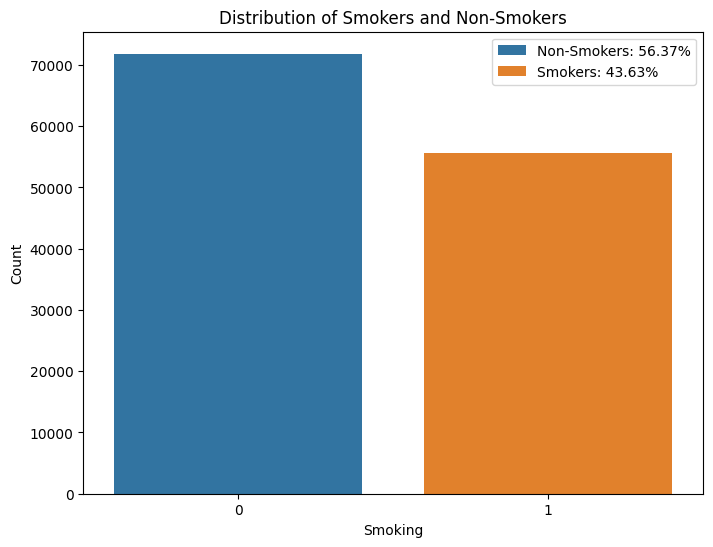

In [8]:
target = train_df[["smoking"]]
num_samples = len(train_df)
smokers_count = len(train_df[train_df["smoking"] == 1])
nonsmokers_count = len(train_df[train_df["smoking"] == 0])
somkers_percentage = 100 * smokers_count/num_samples
nonsmokers_percentage = 100 * nonsmokers_count/num_samples
plt.figure(figsize=(8, 6))
sns.countplot(x="smoking", data=train_df, hue="smoking")
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.title('Distribution of Smokers and Non-Smokers')
plt.legend(labels=[f'Non-Smokers: {round(nonsmokers_percentage,2)}%',  f"Smokers: {round(somkers_percentage,2)}%"])

plt.show()

### **Feature 1: hemoglobin**

Observations: 
* The distribution for hemoglobin is almost gaussian, but is skewed to the left

* Hemoglobin for smokers is on average higher than for non smokers.

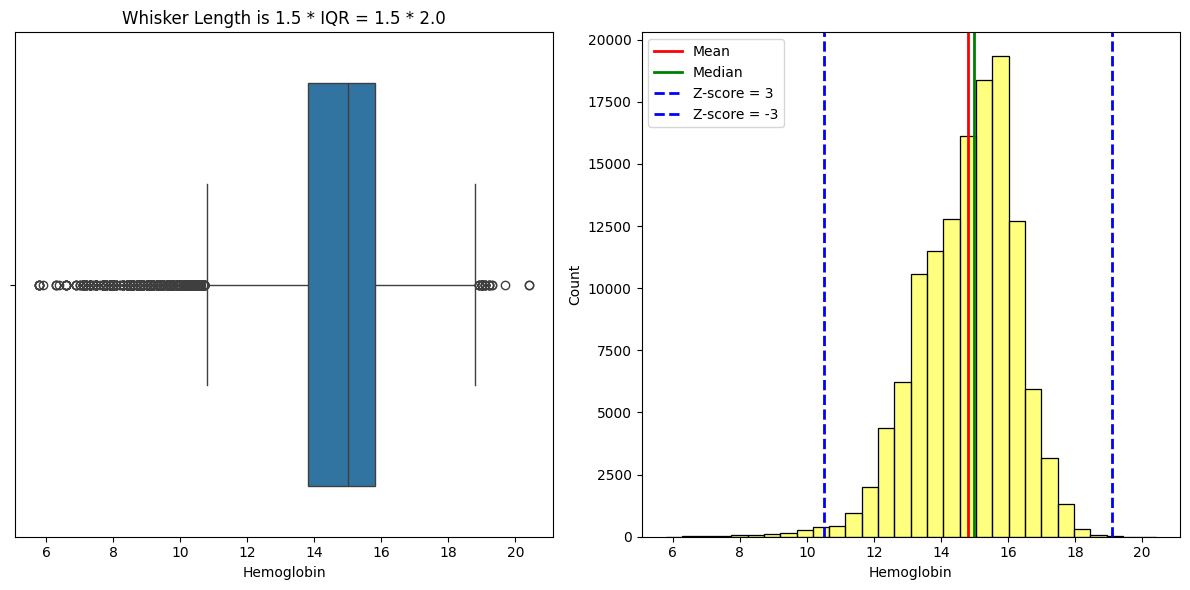

+--------------------+---------+
| Statistic          |   Value |
+====================+=========+
| Mean               |  14.793 |
+--------------------+---------+
| Median             |  15     |
+--------------------+---------+
| Max Value          |  20.4   |
+--------------------+---------+
| Min Value          |   5.8   |
+--------------------+---------+
| Range              |  14.6   |
+--------------------+---------+
| Standard Deviation |   1.432 |
+--------------------+---------+
| Skew               |  -0.637 |
+--------------------+---------+
| IQR                |   2     |
+--------------------+---------+


In [9]:
# Analyzing Hemoglobin Feature without information about the target
hemoglobin_feature = train_df["hemoglobin"]

# Central Tendency Measures
hemoglobin_mean = hemoglobin_feature.mean()
hemoglobin_median = hemoglobin_feature.median()
hemoglobin_max_val = hemoglobin_feature.max()
hemoglobin_min_val = hemoglobin_feature.min()
hemoglobin_range = hemoglobin_max_val - hemoglobin_min_val
hemoglobin_std = hemoglobin_feature.std()
hemoglobin_skew = hemoglobin_feature.skew()
hemoglobin_iqr = hemoglobin_feature.quantile(0.75) - hemoglobin_feature.quantile(0.25)
z_score_positive3 = 3 * hemoglobin_std + hemoglobin_mean
z_score_negative3 = -3 * hemoglobin_std + hemoglobin_mean

# Create subplots with two plots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Box Plot for Hemoglobin Feature
sns.boxplot(x=hemoglobin_feature, ax=ax1)
ax1.set_xlabel('Hemoglobin')
ax1.set_title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(hemoglobin_iqr, 3)}")

# Histogram for Hemoglobin Feature
sns.histplot(hemoglobin_feature, bins=30, alpha=0.5, color="yellow", ax=ax2)
ax2.set_xlabel('Hemoglobin')
ax2.set_ylabel('Count')
ax2.axvline(hemoglobin_mean, c='red', ls='-', lw=2)
ax2.axvline(hemoglobin_median, c='green', ls='-', lw=2)
ax2.axvline(z_score_positive3, c='blue', ls='--', lw=2)
ax2.axvline(z_score_negative3, c='blue', ls='--', lw=2)
ax2.legend(labels=['Mean', 'Median', "Z-score = 3", "Z-score = -3"])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Tabulate the statistics
table = [
    ["Mean", round(hemoglobin_mean, 3)],
    ["Median", round(hemoglobin_median, 3)],
    ["Max Value", round(hemoglobin_max_val, 3)],
    ["Min Value", round(hemoglobin_min_val, 3)],
    ["Range", round(hemoglobin_range, 3)],
    ["Standard Deviation", round(hemoglobin_std, 3)],
    ["Skew", round(hemoglobin_skew, 3)],
    ["IQR", round(hemoglobin_iqr, 3)]
]

print(tabulate(table, headers=["Statistic", "Value"], tablefmt="grid"))



The following cells plots the histogram of hemoglobin levels for smokers, and the second subplot illustrates the hemoglobin distribution for non-smokers.

**Observations :**

* The hemoglobin levels for smokers follows the gaussian distribution but shifted to the right


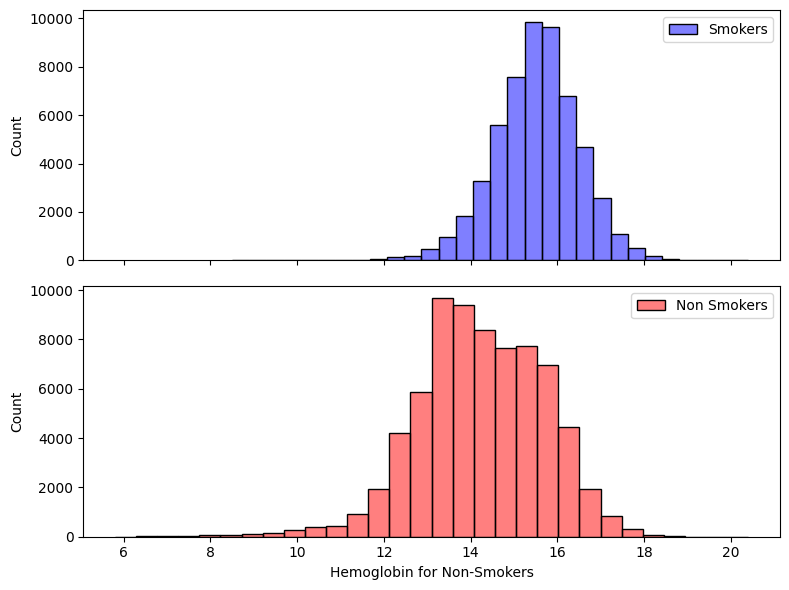

In [10]:
hemoglobin_smokers = train_df[train_df['smoking'] == 1]['hemoglobin']
hemoglobin_nonsmokers = train_df[train_df['smoking'] == 0]['hemoglobin']

# Creating subplots with two histograms stacked vertically for 'Hemoglobin' with shared x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)  # Share x-axis between subplots

sns.histplot(data=hemoglobin_smokers, color='blue', alpha=0.5, bins=30, label='Smokers', ax=ax1)
ax1.set_xlabel('Hemoglobin for Smokers')
ax1.legend()

sns.histplot(data=hemoglobin_nonsmokers, color='red', alpha=0.5, bins=30, label='Non Smokers', ax=ax2)
ax2.set_xlabel('Hemoglobin for Non-Smokers')
ax2.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### **Handling Outliers**

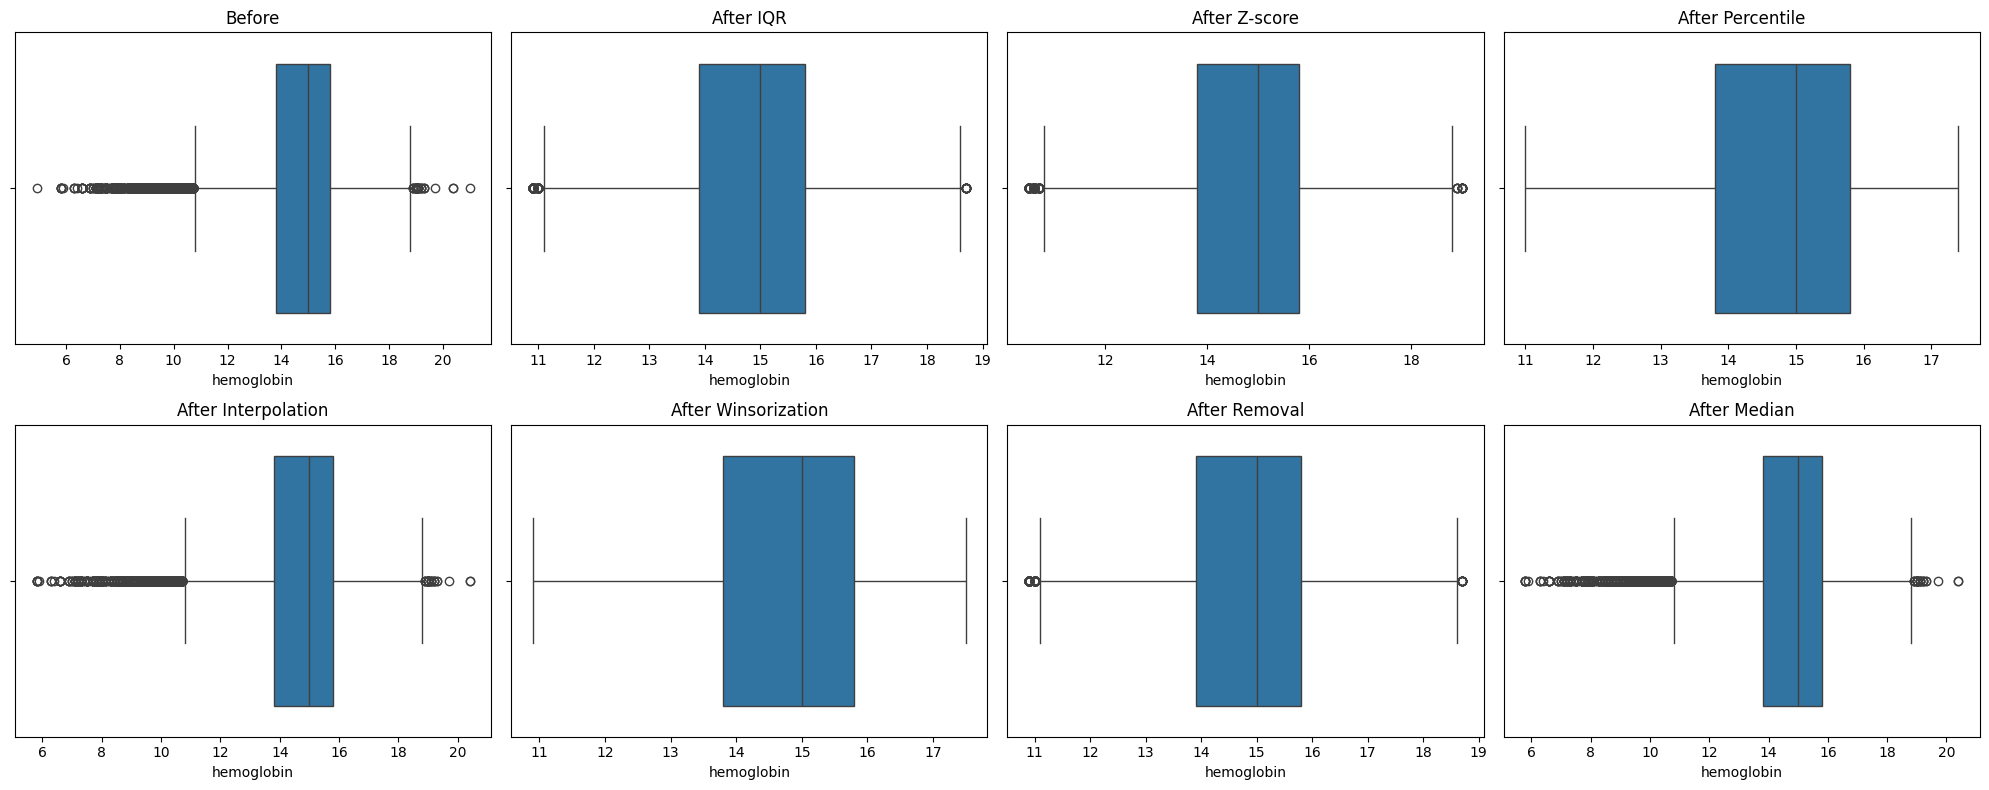

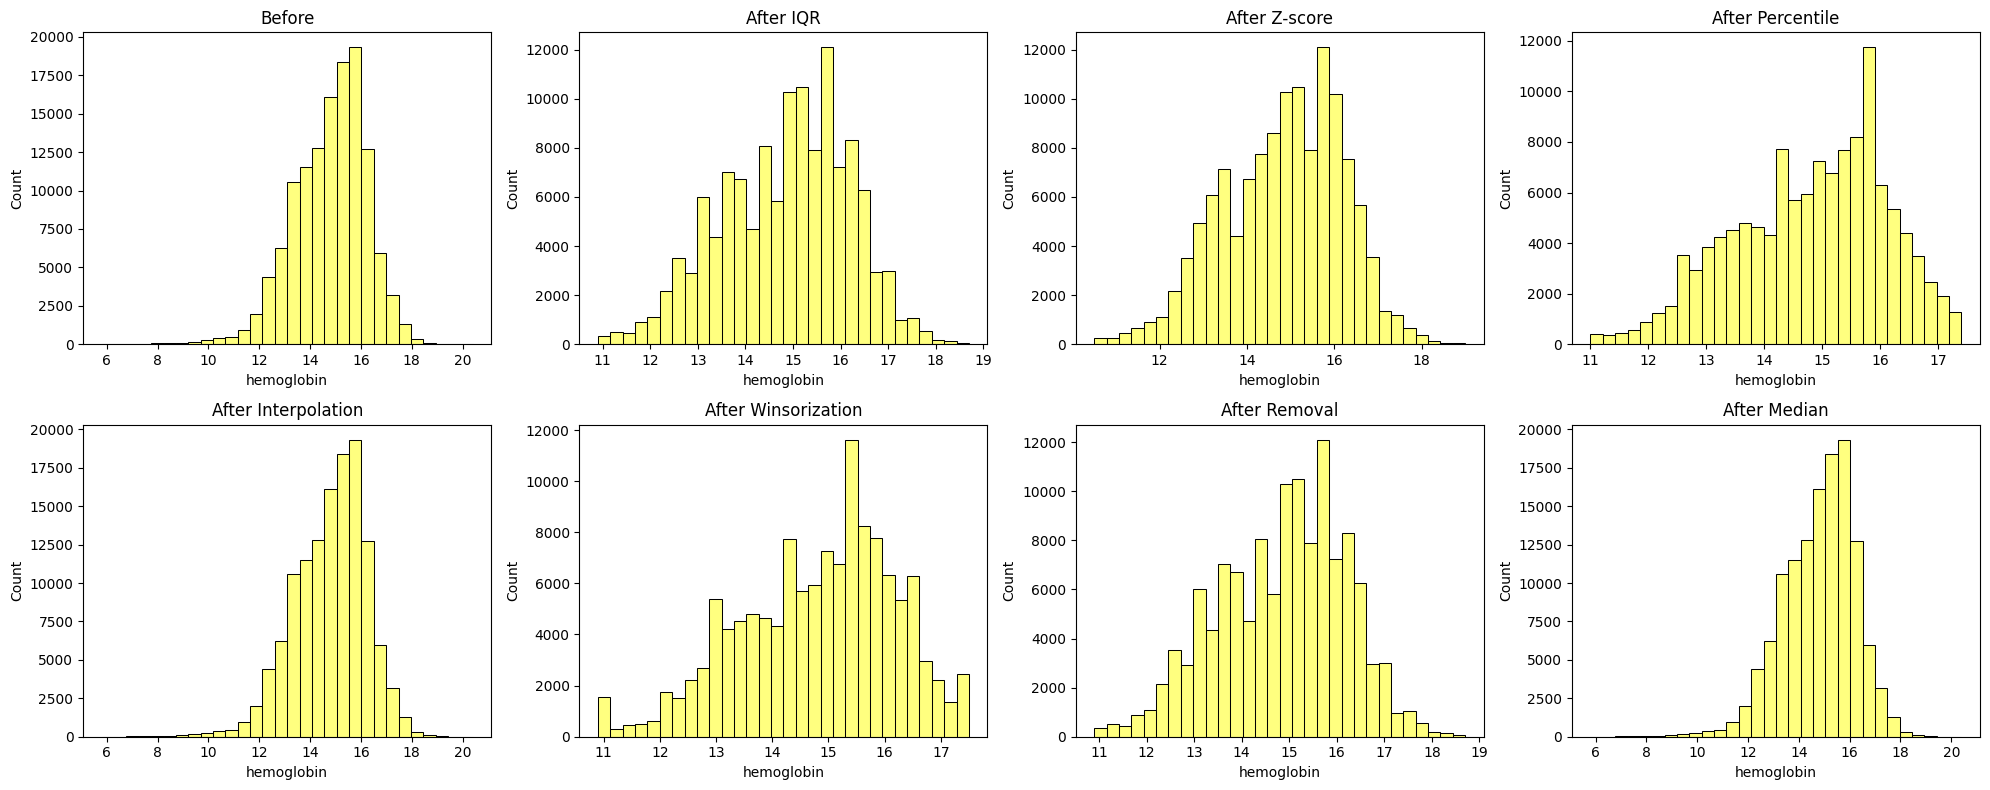

In [11]:
handled_hemoglibin_outliers=handle_outliers("hemoglobin")
plot_handled_outliers(handled_hemoglibin_outliers, "hemoglobin")

#### **Observtions:**
* Removing the outliers has significantly changed the original distribution, therefore it was decided not the remove them.

### **Feature 3: Dental Carries**

**Observations:**
* Most Individuals Don't Have Dental Carries

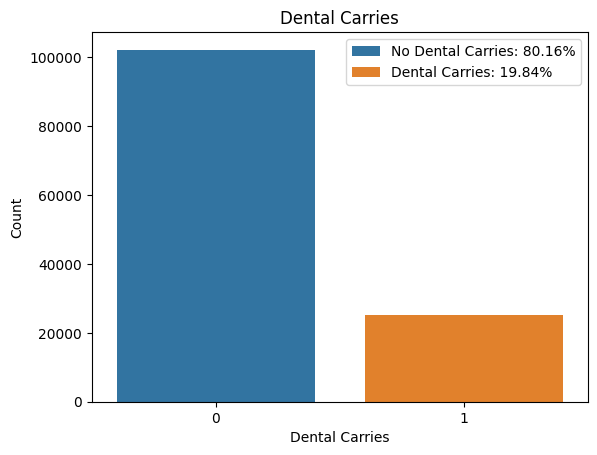

In [12]:
# Analyzing Dental Carries Feature without information about the target
num_samples = len(train_df)
dental_feature = train_df[["dental caries"]]
dental_carries_percentage = 100 * len(train_df[train_df["dental caries"]==1]) / num_samples
no_dental_carries_percentage = 100 * len(train_df[train_df["dental caries"]== 0]) / num_samples



# Histogram for Dental Carries Feature
sns.countplot(x="dental caries", data=train_df, hue="dental caries")
plt.xlabel('Dental Carries')
plt.ylabel('Count')
plt.title('Dental Carries')
plt.legend(labels=[f'No Dental Carries: {round(no_dental_carries_percentage,2)}%',  f"Dental Carries: {round(dental_carries_percentage,2)}%"])
plt.show()





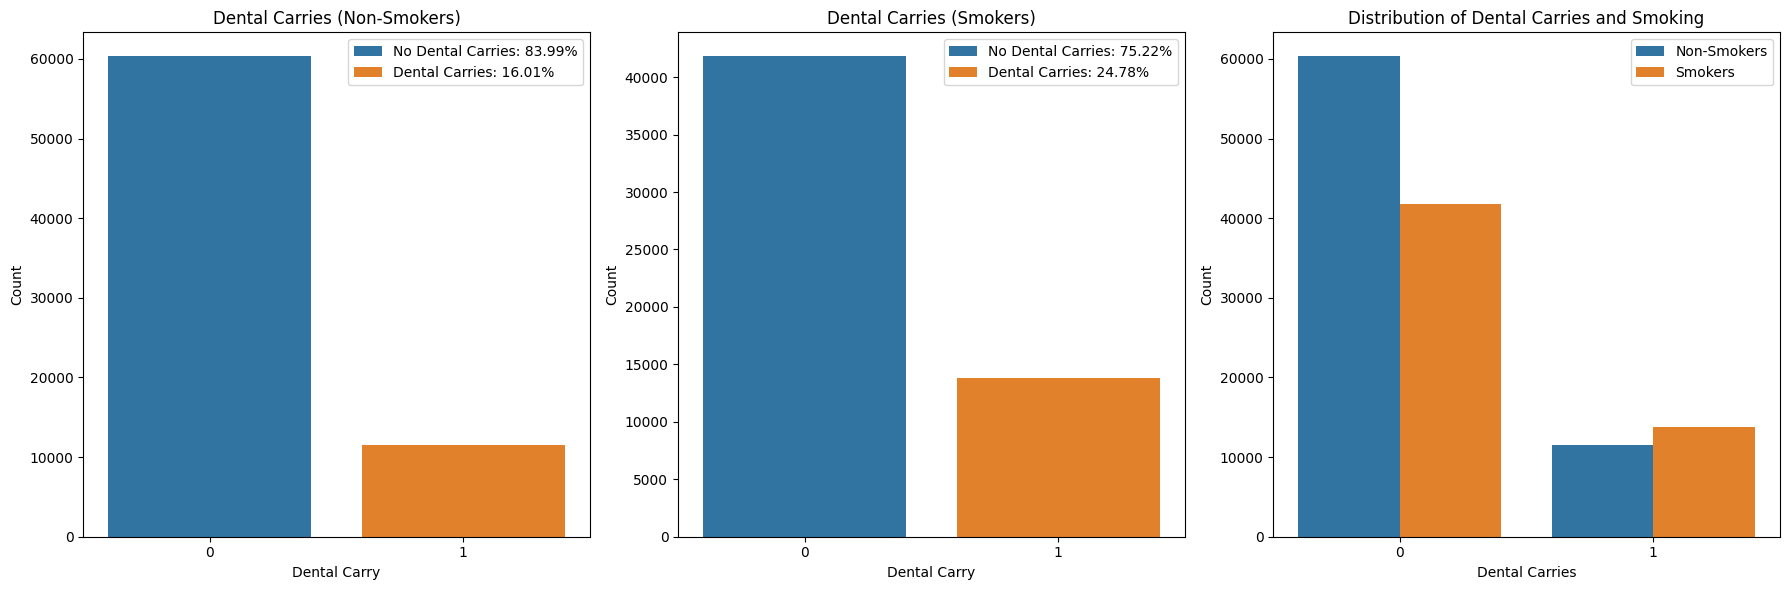

In [13]:
# Analyzing Dental Carries Feature For Non-Smokers
dental_nonsmokers = train_df[train_df["smoking"] == 0][["dental caries"]]
dental_carries_percentage_nonsmokers = 100 * len(dental_nonsmokers[dental_nonsmokers["dental caries"]==1]) / len(dental_nonsmokers)
no_dental_carries_percentage__nonsmokers = 100 * len(dental_nonsmokers[dental_nonsmokers["dental caries"]== 0]) / len(dental_nonsmokers)

# Analyzing Dental Carries Feature For Smokers
dental_smokers = train_df[train_df["smoking"] == 1][["dental caries"]]
dental_carries_percentage_smokers = 100 * len(dental_smokers[dental_smokers["dental caries"]==1]) / len(dental_smokers)
no_dental_carries_percentage__smokers = 100 * len(dental_smokers[dental_smokers["dental caries"]== 0]) / len(dental_smokers)

# Create subplots for Dental Carries histograms
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Histogram for Dental Carries For Non Smokers
sns.countplot(x="dental caries", data=dental_nonsmokers, hue="dental caries", ax=axes[0])
axes[0].set_xlabel('Dental Carry')
axes[0].set_ylabel('Count')
axes[0].set_title('Dental Carries (Non-Smokers)')
axes[0].legend(labels=[f'No Dental Carries: {round(no_dental_carries_percentage__nonsmokers,2)}%',  f"Dental Carries: {round(dental_carries_percentage_nonsmokers,2)}%"])

# Histogram for Dental Carries For Smokers
sns.countplot(x="dental caries", data=dental_smokers, hue="dental caries", ax=axes[1])
axes[1].set_xlabel('Dental Carry')
axes[1].set_ylabel('Count')
axes[1].set_title('Dental Carries (Smokers)')
axes[1].legend(labels=[f'No Dental Carries: {round(no_dental_carries_percentage__smokers,2)}%',  f"Dental Carries: {round(dental_carries_percentage_smokers,2)}%"])

# Histogram for Dental Carries with respect to Smoking
sns.countplot(x="dental caries", data=train_df, hue="smoking", ax=axes[2])
axes[2].set_xlabel('Dental Carries')
axes[2].set_ylabel('Count')
axes[2].set_title('Distribution of Dental Carries and Smoking')
axes[2].legend(labels=["Non-Smokers", "Smokers"])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

#### **Observations:**
1. Non Smokers :
    * Most of non-smokers don't have dental carries
2. Smokers :
    * Most of the smokers don't have dentail carries
3. Combined :
    * Smokers having dental carries are slightly higher than non smokers

## **Feature 5: LDL**

#### **Observation**:
* Data Resembles a Gausian Distribution after removing outliers with LDL > 500.
* LDL is slightly lower for smokers on average.

+--------------------+----------+
| Statistic          |    Value |
+====================+==========+
| Mean               |  114.625 |
+--------------------+----------+
| Median             |  114     |
+--------------------+----------+
| Max Value          | 1860     |
+--------------------+----------+
| Min Value          |    1     |
+--------------------+----------+
| Range              | 1859     |
+--------------------+----------+
| Standard Deviation |   28.536 |
+--------------------+----------+
| Skew               |    7.89  |
+--------------------+----------+
| IQR                |   38     |
+--------------------+----------+


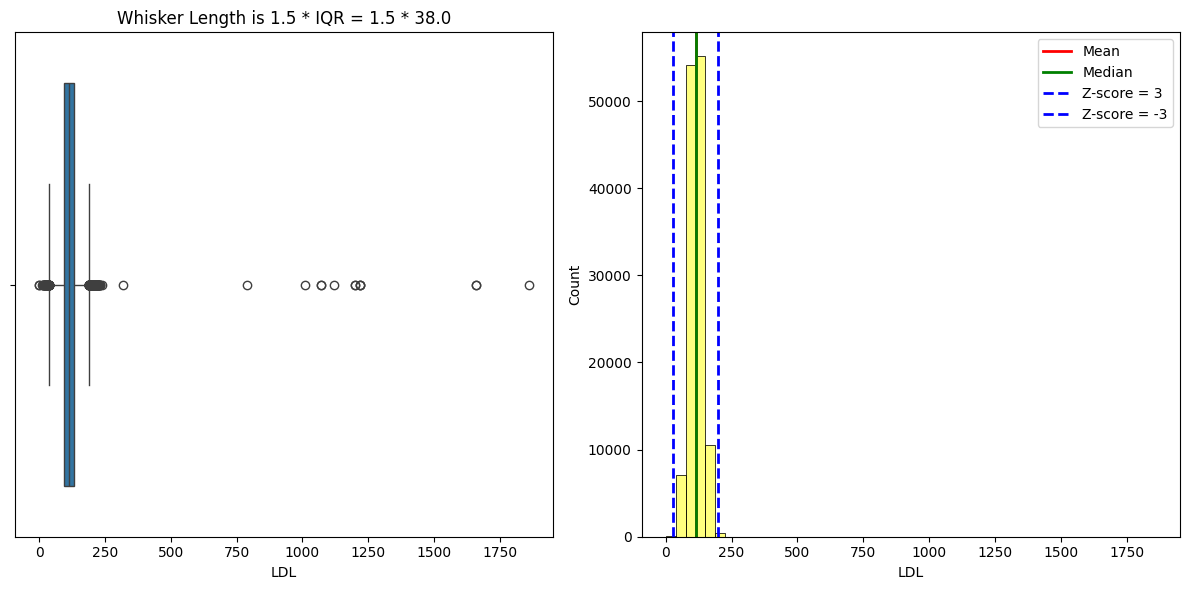

In [14]:
# Analyzing LDL Feature without information about the target
LDL_feature = train_df["LDL"]

# Central Tendency Measures
LDL_mean = LDL_feature.mean()
LDL_median = LDL_feature.median()

# Measures of Dispersion
LDL_max_val = LDL_feature.max()
LDL_min_val = LDL_feature.min()
LDL_range = LDL_max_val - LDL_min_val
LDL_std = LDL_feature.std()
LDL_skew = LDL_feature.skew()
LDL_iqr = LDL_feature.quantile(0.75) - LDL_feature.quantile(0.25)
z_score_positive3 = 3 * LDL_std + LDL_mean
z_score_negative3 = -3 * LDL_std + LDL_mean

# Define the statistics
statistics = [
    ["Mean", round(LDL_mean, 3)],
    ["Median", round(LDL_median, 3)],
    ["Max Value", round(LDL_max_val, 3)],
    ["Min Value", round(LDL_min_val, 3)],
    ["Range", round(LDL_range, 3)],
    ["Standard Deviation", round(LDL_std, 3)],
    ["Skew", round(LDL_skew, 3)],
    ["IQR", round(LDL_iqr, 3)]
]

# Tabulate the statistics
table = tabulate(statistics, headers=["Statistic", "Value"], tablefmt="grid")

# Print the table
print(table)

# Create subplots for Box Plot and Histogram
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Box Plot for LDL Feature
sns.boxplot(x=LDL_feature, ax=axes[0])
axes[0].set_xlabel('LDL')
axes[0].set_title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(LDL_iqr, 3)}")

# Histogram for LDL Feature
sns.histplot(LDL_feature, bins=50, alpha=0.5, color="yellow", ax=axes[1])
axes[1].set_xlabel('LDL')
axes[1].set_ylabel('Count')
axes[1].axvline(LDL_mean, c='red', ls='-', lw=2)
axes[1].axvline(LDL_median, c='green', ls='-', lw=2)
axes[1].axvline(z_score_positive3, c='blue', ls='--', lw=2)
axes[1].axvline(z_score_negative3, c='blue', ls='--', lw=2)
axes[1].legend(labels=['Mean', 'Median', "Z-score = 3", "Z-score = -3"])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


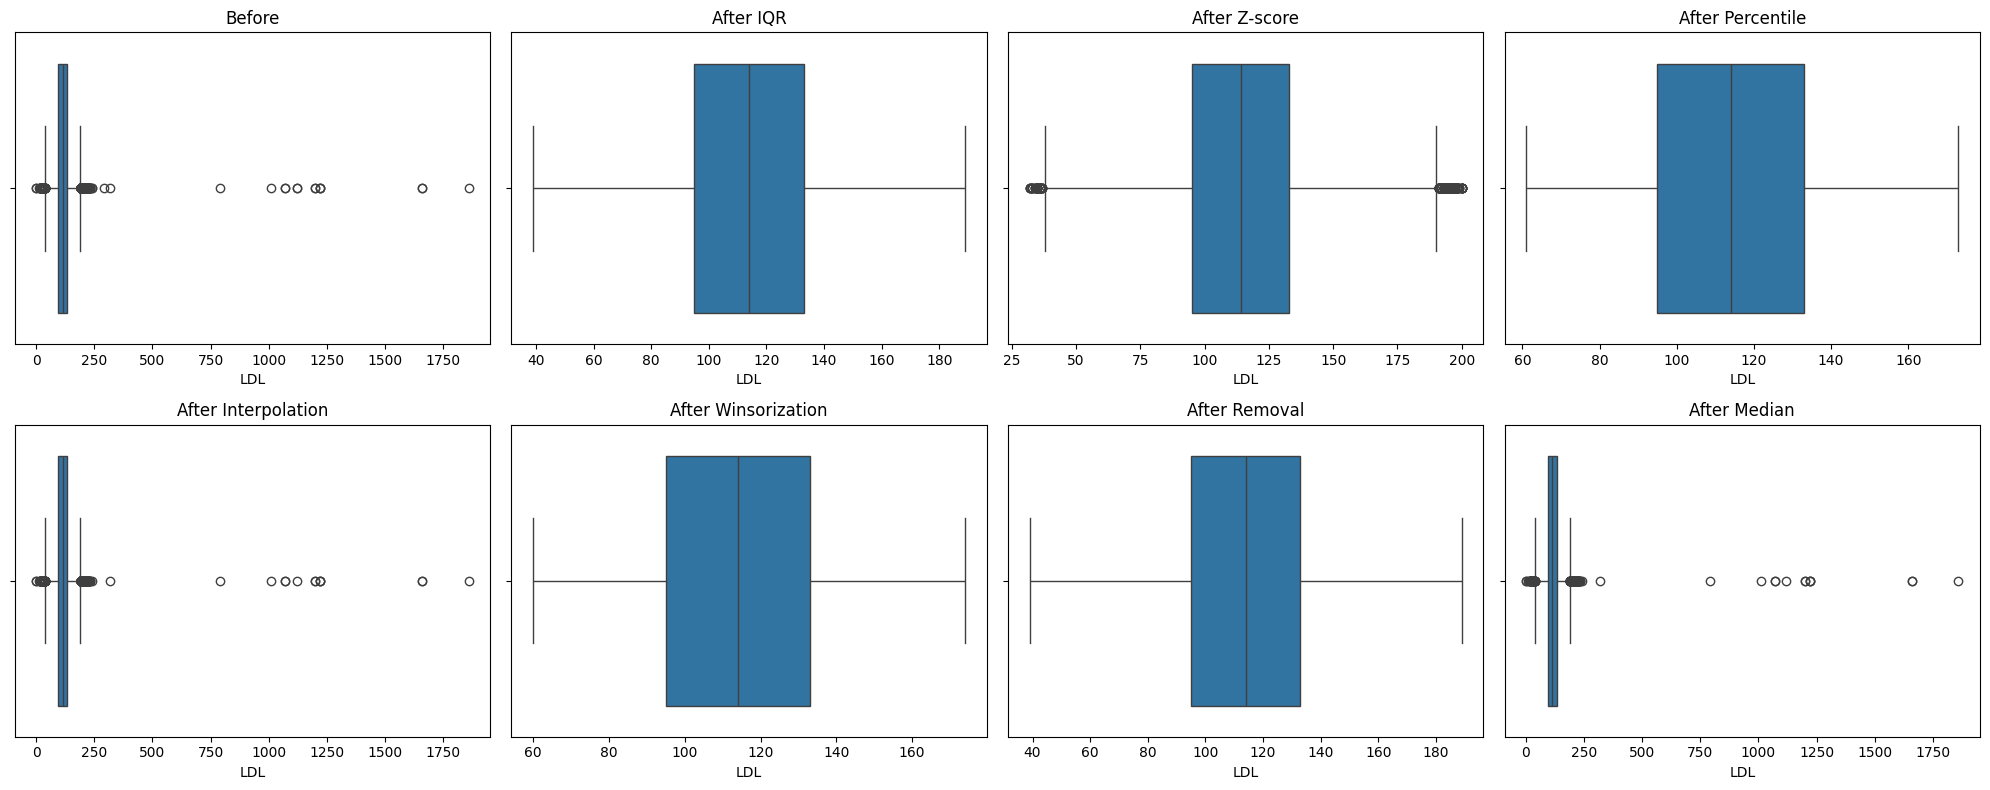

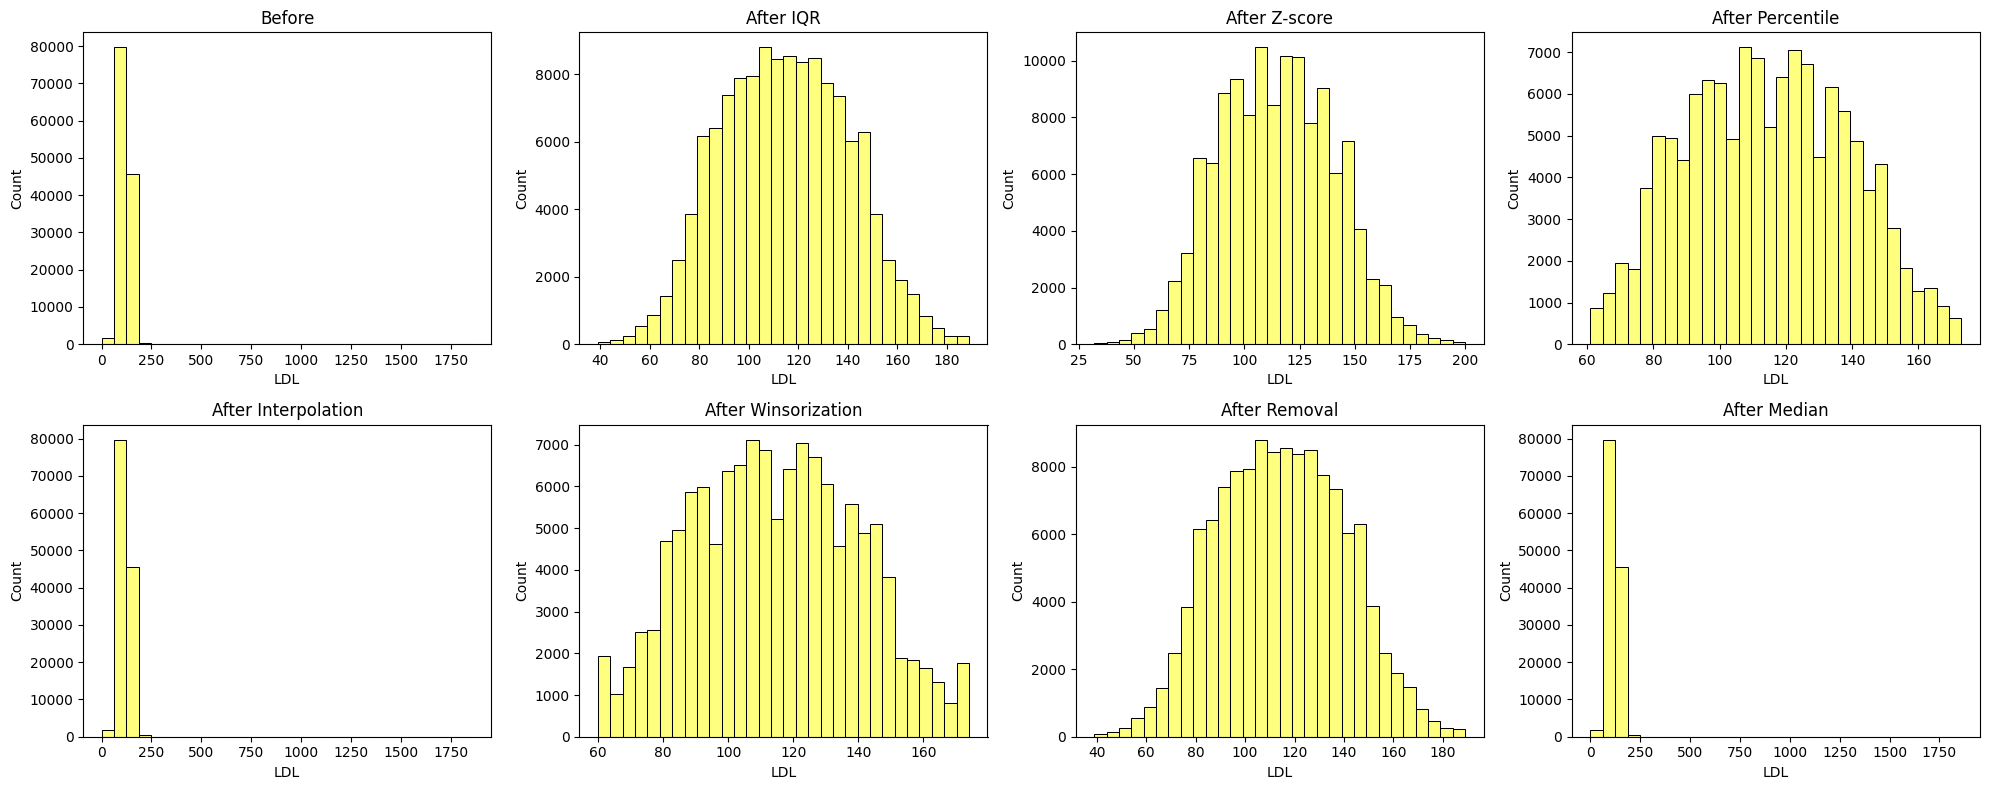

In [9]:
LDL_hanlded_outliers=handle_outliers("LDL")
plot_handled_outliers(LDL_hanlded_outliers, "LDL")

In [11]:
# Handling Outliers by removing them
LDL_feature = train_df["LDL"]
LDL_q1 = LDL_feature.quantile(0.25)
LDL_q3 = LDL_feature.quantile(0.75)
LDL_iqr = LDL_q3 - LDL_q1
LDL_lower_limit = LDL_q1 - 1.5 * LDL_iqr
LDL_upper_limit = LDL_q3 + 1.5 * LDL_iqr
LDL_feature_removed = LDL_feature[(LDL_feature > LDL_lower_limit) & (LDL_feature < LDL_upper_limit)]






Analysis after removing outliers ( LDL > 500)

LDL:
Mean 114.509
Median 114.0
Max Value 318
Min Value 1
Range 317
Standard Deviation 25.953
Skew 0.132
IQR 38.0
Z-score = 3 192.3692862391166, Z-score = -3 36.64844656775358


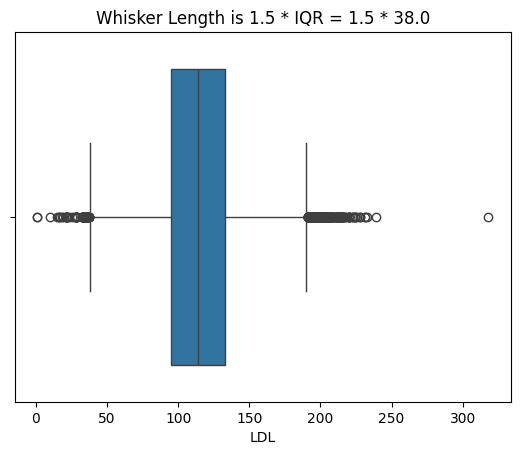

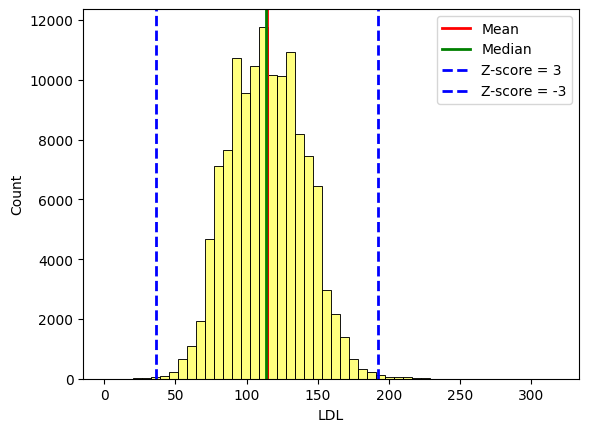

In [16]:
#Analysis After Removing Outliers

# Analyzing LDL Feature without information about the target
LDL_feature = train_df[train_df["LDL"] < 500]["LDL"]

# Central Tendency Measures
LDL_mean = LDL_feature.mean()
LDL_median = LDL_feature.median()

# Measures of Dispersion
LDL_max_val = LDL_feature.max()
LDL_min_val = LDL_feature.min()
LDL_range = LDL_max_val - LDL_min_val
LDL_std = LDL_feature.std()
LDL_skew = LDL_feature.skew()
LDL_iqr = LDL_feature.quantile(0.75) - LDL_feature.quantile(0.25)
z_score_positive3 = 3 * LDL_std + LDL_mean
z_score_negative3 = -3 * LDL_std + LDL_mean

print("LDL:")
print(f"Mean {round(LDL_mean, 3)}")
print(f"Median {round(LDL_median, 3)}")
print(f"Max Value {round(LDL_max_val, 3)}")
print(f"Min Value {round(LDL_min_val, 3)}")
print(f"Range {round(LDL_range, 3)}")
print(f"Standard Deviation {round(LDL_std, 3)}")
print(f"Skew {round(LDL_skew, 3)}")
print(f"IQR {round(LDL_iqr, 3)}")
print(f"Z-score = 3 {z_score_positive3}, Z-score = -3 {z_score_negative3}")


# Box Plot for LDL Feature
sns.boxplot(x=LDL_feature)
plt.xlabel('LDL')
plt.title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(LDL_iqr, 3)}")
plt.show()

# Histogram for LDL Feature
sns.histplot(LDL_feature, bins=50, alpha=0.5, color="yellow")
plt.xlabel('LDL')
plt.ylabel('Count')
plt.axvline(LDL_mean, c='red', ls='-', lw=2)
plt.axvline(LDL_median, c='green', ls='-', lw=2)
plt.axvline(z_score_positive3, c='blue', ls='--', lw=2)
plt.axvline(z_score_negative3, c='blue', ls='--', lw=2)

plt.legend(labels=['Mean', 'Median', "Z-score = 3", "Z-score = -3"])
plt.show()

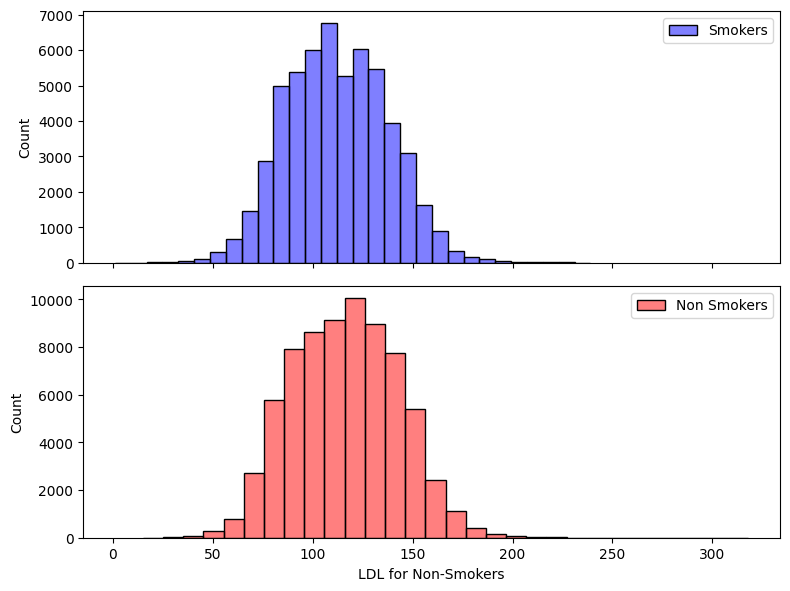

+------------------------------------+---------+
| Statistic                          |   Value |
+====================================+=========+
| Mean for Non Smokers               |  116.26 |
+------------------------------------+---------+
| Standard Deviation for Non Smokers |   26.47 |
+------------------------------------+---------+
| Mean for Smokers                   |  112.25 |
+------------------------------------+---------+
| Standard Deviation for Smokers     |   25.09 |
+------------------------------------+---------+


In [17]:

# Separate data for smokers and non-smokers based on 'LDL' levels
df_LDL_outliers_removed = train_df[train_df["LDL"] < 500]

LDL_smokers = df_LDL_outliers_removed[df_LDL_outliers_removed['smoking'] == 1]['LDL']
LDL_nonsmokers = df_LDL_outliers_removed[df_LDL_outliers_removed['smoking'] == 0]['LDL']

# Creating subplots with two histograms stacked vertically for 'LDL' with shared x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)  # Share x-axis between subplots

sns.histplot(data=LDL_smokers, color='blue', alpha=0.5, bins=30, label='Smokers', ax=ax1)
ax1.set_xlabel('LDL for Smokers')
ax1.legend()

sns.histplot(data=LDL_nonsmokers, color='red', alpha=0.5, bins=30, label='Non Smokers', ax=ax2)
ax2.set_xlabel('LDL for Non-Smokers')
ax2.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Print the statistics
statistics = [
    ["Mean for Non Smokers", round(LDL_nonsmokers.mean(), 2)],
    ["Standard Deviation for Non Smokers", round(LDL_nonsmokers.std(), 2)],
    ["Mean for Smokers", round(LDL_smokers.mean(), 2)],
    ["Standard Deviation for Smokers", round(LDL_smokers.std(), 2)]
]

# Tabulate the statistics
table = tabulate(statistics, headers=["Statistic", "Value"], tablefmt="grid")

# Print the table
print(table)



### **Removing Outliers**

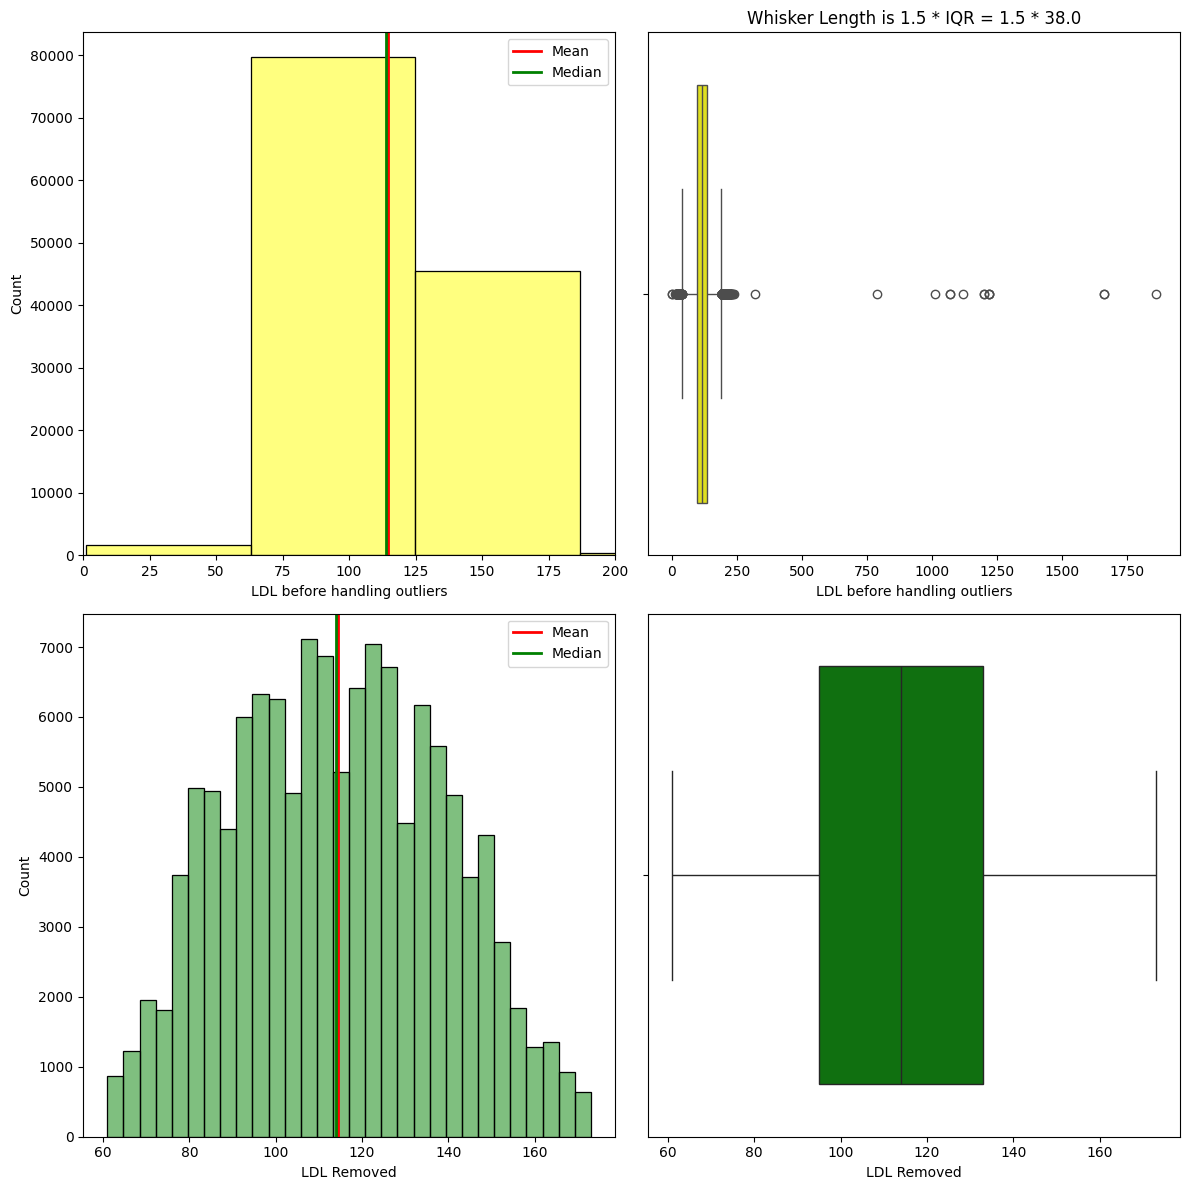

In [18]:
LDL_feature = train_df["LDL"]

# Create subplots with four plots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Histogram for LDL Feature before handling outliers
sns.histplot(LDL_feature, bins=30, alpha=0.5, color="yellow", ax=axes[0, 0])
axes[0, 0].set_xlabel('LDL before handling outliers')
axes[0, 0].set_xlim([0, 200])
axes[0, 0].set_ylabel('Count')
axes[0, 0].axvline(LDL_mean, c='red', ls='-', lw=2)
axes[0, 0].axvline(LDL_median, c='green', ls='-', lw=2)
axes[0, 0].legend(labels=['Mean', 'Median'])

# Box Plot for LDL Feature before handling outliers
sns.boxplot(x=LDL_feature, color="yellow", ax=axes[0, 1])
axes[0, 1].set_xlabel('LDL before handling outliers')
axes[0, 1].set_title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(LDL_iqr, 3)}")

# Remove outliers using z-score from the training data
# Calculate z-score
LDL_mean = LDL_feature.mean()
LDL_std = LDL_feature.std()
z_score_positive3 = 3 * LDL_std + LDL_mean
z_score_negative3 = -3 * LDL_std + LDL_mean
train_df = train_df[(train_df['LDL'] > z_score_negative3) & (train_df['LDL'] < z_score_positive3)]

# Histogram for LDL Feature after handling outliers using Z-Score
sns.histplot(LDL_feature_removed, bins=30, alpha=0.5, color="green", ax=axes[1, 0])
axes[1, 0].set_xlabel('LDL Removed')
axes[1, 0].set_ylabel('Count')
axes[1, 0].axvline(LDL_feature_removed.mean(), c='red', ls='-', lw=2)
axes[1, 0].axvline(LDL_feature_removed.median(), c='green', ls='-', lw=2)
axes[1, 0].legend(labels=['Mean', 'Median'])

# Box Plot for LDL Feature after handling outliers using Z-Score
sns.boxplot(x=LDL_feature_removed, color="green", ax=axes[1, 1])
axes[1, 1].set_xlabel('LDL Removed')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


## **Feature 2 : Hearing**

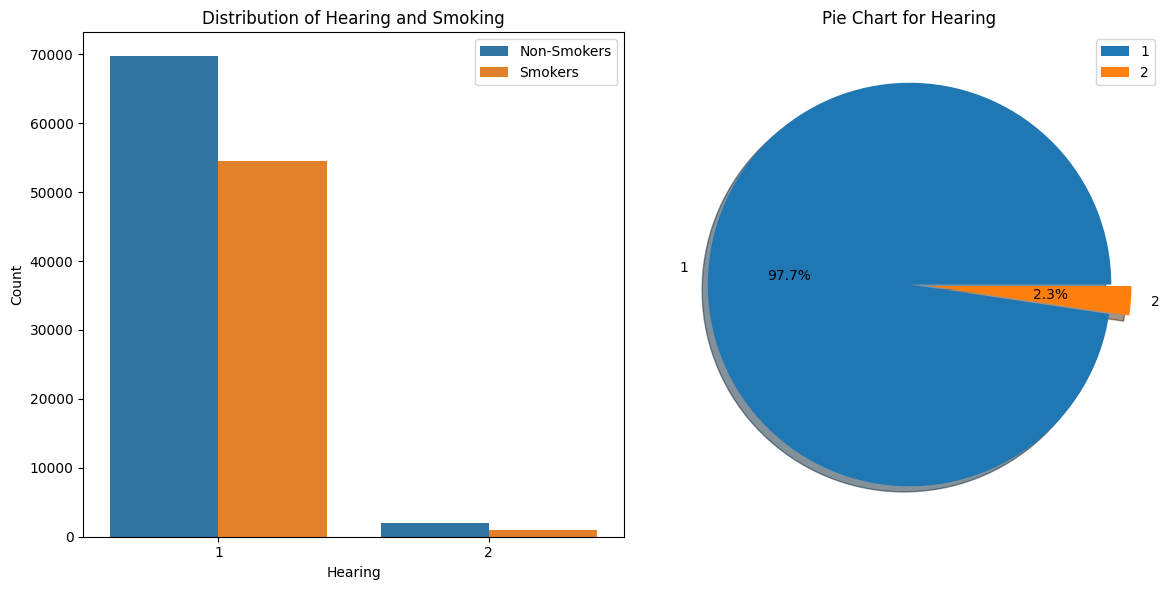

In [19]:

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the countplot for Hearing Feature with respect to the target
sns.countplot(x="hearing(right)", data=train_df, hue="smoking", ax=ax1)
ax1.set_xlabel('Hearing')
ax1.set_ylabel('Count')
ax1.set_title('Distribution of Hearing and Smoking')
ax1.legend(labels=["Non-Smokers", "Smokers"])

# Plot the pie chart for Hearing Feature
labels = '1', '2'
sizes = [len(train_df[train_df["hearing(right)"]==1]), len(train_df[train_df["hearing(right)"]==2])]
explode = (0, 0.1)
ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True)
ax2.set_title('Pie Chart for Hearing')
ax2.legend(labels=["1", "2"])

# Adjust layout
plt.tight_layout()

# Show the figure
plt.show()

#### **Observations:**
* The distributions of both smokers and non-smokers are nearly equal either in hearing = 1 or hearing = 2


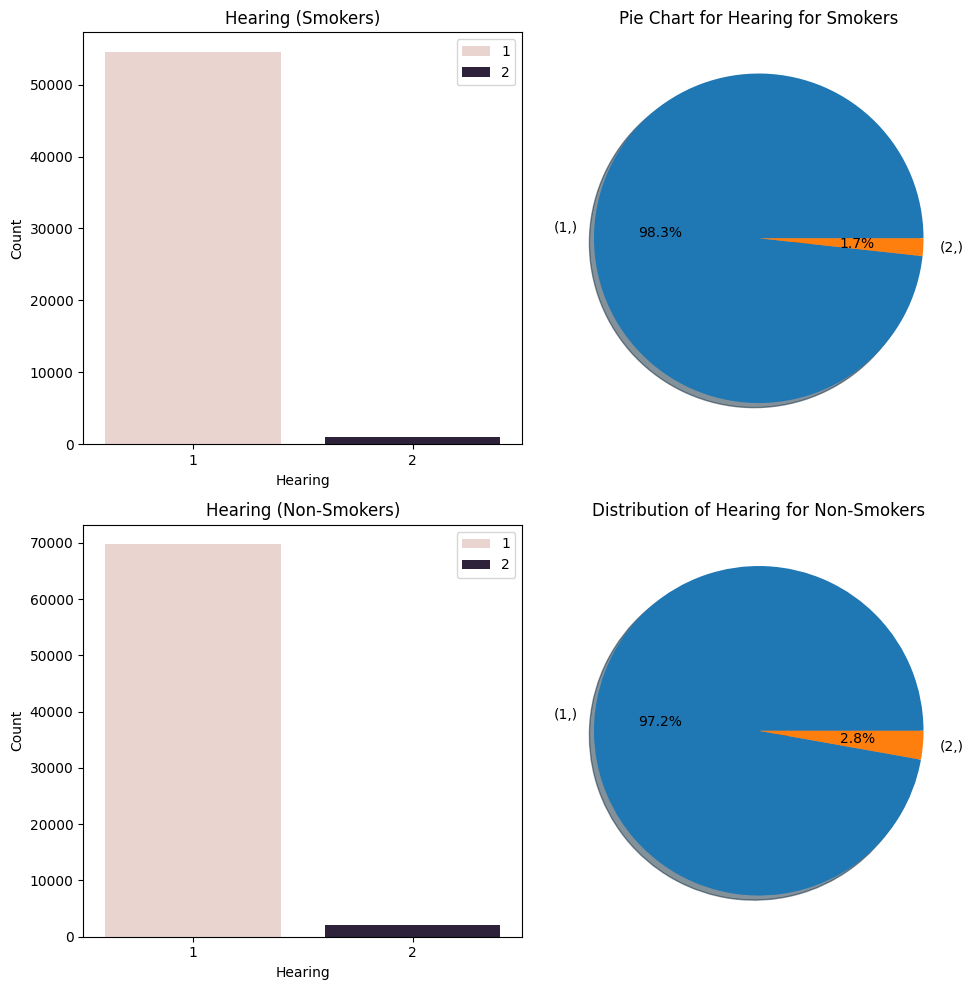

In [20]:

# Analyzing Hearing Feature for Smokers
hearing_smokers = train_df[train_df["smoking"] == 1][["hearing(right)"]]

# Analyzing Hearing Feature for Non-Smokers
hearing_nonsmokers = train_df[train_df["smoking"] == 0][["hearing(right)"]]

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Histogram for Hearing For Smokers
sns.countplot(x="hearing(right)", data=hearing_smokers, hue="hearing(right)", ax=axes[0, 0])
axes[0, 0].set_xlabel('Hearing')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Hearing (Smokers)')
axes[0, 0].legend(labels=["1", "2"])

# Pie Chart for Hearing For Smokers
axes[0, 1].pie(x=hearing_smokers.value_counts(), labels=hearing_smokers.value_counts().index, autopct="%.1f%%", shadow=True)
axes[0, 1].set_title('Pie Chart for Hearing for Smokers')

# Histogram for Hearing For Non-Smokers
sns.countplot(x="hearing(right)", data=hearing_nonsmokers, hue="hearing(right)", ax=axes[1, 0])
axes[1, 0].set_xlabel('Hearing')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Hearing (Non-Smokers)')
axes[1, 0].legend(labels=["1", "2"])

# Pie Chart for Hearing For Non-Smokers
axes[1, 1].pie(x=hearing_nonsmokers.value_counts(), labels=hearing_nonsmokers.value_counts().index, autopct="%.1f%%", shadow=True)
axes[1, 1].set_title('Distribution of Hearing for Non-Smokers')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### **Feature 4 : Fasting Blood Sugar**

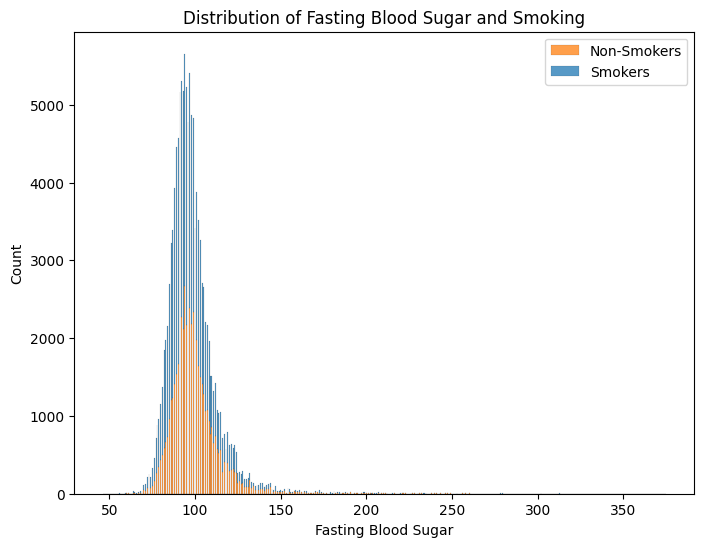

In [21]:
plt.figure(figsize=(8, 6))
sns.histplot(data=train_df, x="fasting blood sugar", hue="smoking", multiple="stack")
plt.xlabel('Fasting Blood Sugar')
plt.ylabel('Count')
plt.title('Distribution of Fasting Blood Sugar and Smoking')
plt.legend(labels=["Non-Smokers", "Smokers"])
plt.show()


/tmp/ipykernel_22025/2957572399.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  table.add_row(["Mean", round(fbs_smokers_mean[0], 3), round(fbs_nonsmokers_mean[0], 3)])
/tmp/ipykernel_22025/2957572399.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  table.add_row(["Median", round(fbs_smokers_median[0], 3), round(fbs_nonsmokers_median[0], 3)])
/tmp/ipykernel_22025/2957572399.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

+--------------------+---------+-------------+
|                    | Smokers | Non-Smokers |
+--------------------+---------+-------------+
|        Mean        | 100.027 |    97.001   |
|       Median       |   97.0  |     95.0    |
|     Max Value      |   375   |     313     |
|     Min Value      |    56   |      46     |
|       Range        |   319   |     267     |
| Standard Deviation |  16.57  |    14.037   |
|        Skew        |  3.685  |    2.926    |
|        IQR         |   14.0  |     13.0    |
+--------------------+---------+-------------+


/tmp/ipykernel_22025/2957572399.py:57: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax1.set_xticks(range(0, int(fbs_smokers_max_val[0])+1, 100))  # Set the desired number of ticks
/tmp/ipykernel_22025/2957572399.py:66: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2.set_xticks(range(0, int(fbs_nonsmokers_max_val[0])+1, 100))  # Set the desired number of ticks


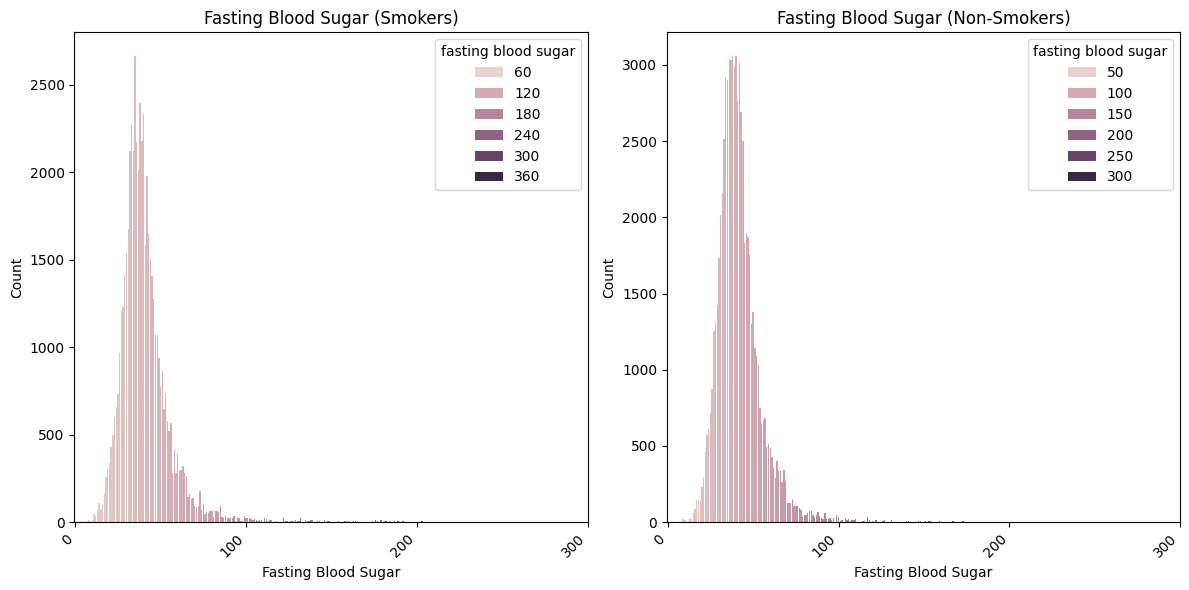

In [22]:

# Analyzing Fasting Blood Sugar Feature for Smokers
fbs_smokers = train_df[train_df["smoking"] == 1][["fasting blood sugar"]]
fbs_smokers_percentage = 100 * len(fbs_smokers[fbs_smokers["fasting blood sugar"]==1]) / len(fbs_smokers)
fbs_nonsmokers = train_df[train_df["smoking"] == 0][["fasting blood sugar"]]
fbs_nonsmokers_percentage = 100 * len(fbs_nonsmokers[fbs_nonsmokers["fasting blood sugar"]==1]) / len(fbs_nonsmokers)

# Central Tendency Measures
fbs_smokers_mean = fbs_smokers.mean()
fbs_smokers_median = fbs_smokers.median()
fbs_nonsmokers_mean = fbs_nonsmokers.mean()
fbs_nonsmokers_median = fbs_nonsmokers.median()

# Measures of Dispersion
fbs_smokers_max_val = fbs_smokers.max()
fbs_smokers_min_val = fbs_smokers.min()
fbs_smokers_range = fbs_smokers_max_val - fbs_smokers_min_val
fbs_smokers_std = fbs_smokers.std()
fbs_smokers_skew = fbs_smokers.skew()
fbs_smokers_iqr = fbs_smokers.quantile(0.75) - fbs_smokers.quantile(0.25)
fbs_nonsmokers_max_val = fbs_nonsmokers.max()
fbs_nonsmokers_min_val = fbs_nonsmokers.min()
fbs_nonsmokers_range = fbs_nonsmokers_max_val - fbs_nonsmokers_min_val
fbs_nonsmokers_std = fbs_nonsmokers.std()
fbs_nonsmokers_skew = fbs_nonsmokers.skew()
fbs_nonsmokers_iqr = fbs_nonsmokers.quantile(0.75) - fbs_nonsmokers.quantile(0.25)

# Create a table object
table = PrettyTable()

# Define table headers
table.field_names = ["", "Smokers", "Non-Smokers"]

# Add rows to the table
table.add_row(["Mean", round(fbs_smokers_mean[0], 3), round(fbs_nonsmokers_mean[0], 3)])
table.add_row(["Median", round(fbs_smokers_median[0], 3), round(fbs_nonsmokers_median[0], 3)])
table.add_row(["Max Value", round(fbs_smokers_max_val[0], 3), round(fbs_nonsmokers_max_val[0], 3)])
table.add_row(["Min Value", round(fbs_smokers_min_val[0], 3), round(fbs_nonsmokers_min_val[0], 3)])
table.add_row(["Range", round(fbs_smokers_range[0], 3), round(fbs_nonsmokers_range[0], 3)])
table.add_row(["Standard Deviation", round(fbs_smokers_std[0], 3), round(fbs_nonsmokers_std[0], 3)])
table.add_row(["Skew", round(fbs_smokers_skew[0], 3), round(fbs_nonsmokers_skew[0], 3)])
table.add_row(["IQR", round(fbs_smokers_iqr[0], 3), round(fbs_nonsmokers_iqr[0], 3)])

# Set table alignment
table.align = "c"

# Print the table
print(table)

# Histogram for Fasting Blood Sugar For Smokers and Non-Smokers
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Histogram for Fasting Blood Sugar For Smokers
sns.countplot(x="fasting blood sugar", data=fbs_smokers, hue="fasting blood sugar", ax=ax1)
ax1.set_xlabel('Fasting Blood Sugar')
ax1.set_ylabel('Count')
ax1.set_title('Fasting Blood Sugar (Smokers)')
ax1.set_xticks(range(0, int(fbs_smokers_max_val[0])+1, 100))  # Set the desired number of ticks
ax1.set_xticklabels(ax1.get_xticks(), rotation=45, ha='right')  # Set the tick labels


# Histogram for Fasting Blood Sugar For Non-Smokers
sns.countplot(x="fasting blood sugar", data=fbs_nonsmokers, hue="fasting blood sugar", ax=ax2)
ax2.set_xlabel('Fasting Blood Sugar')
ax2.set_ylabel('Count')
ax2.set_title('Fasting Blood Sugar (Non-Smokers)')
ax2.set_xticks(range(0, int(fbs_nonsmokers_max_val[0])+1, 100))  # Set the desired number of ticks
ax2.set_xticklabels(ax2.get_xticks(), rotation=45, ha='right')  # Set the tick labels

# Adjust layout
plt.tight_layout()

# Show the figure
plt.show()



#### **Observations**
* The fasting blood sugar levels either in smokers or non-smokers follow the Gamma distribution

### **Handling Outliers**

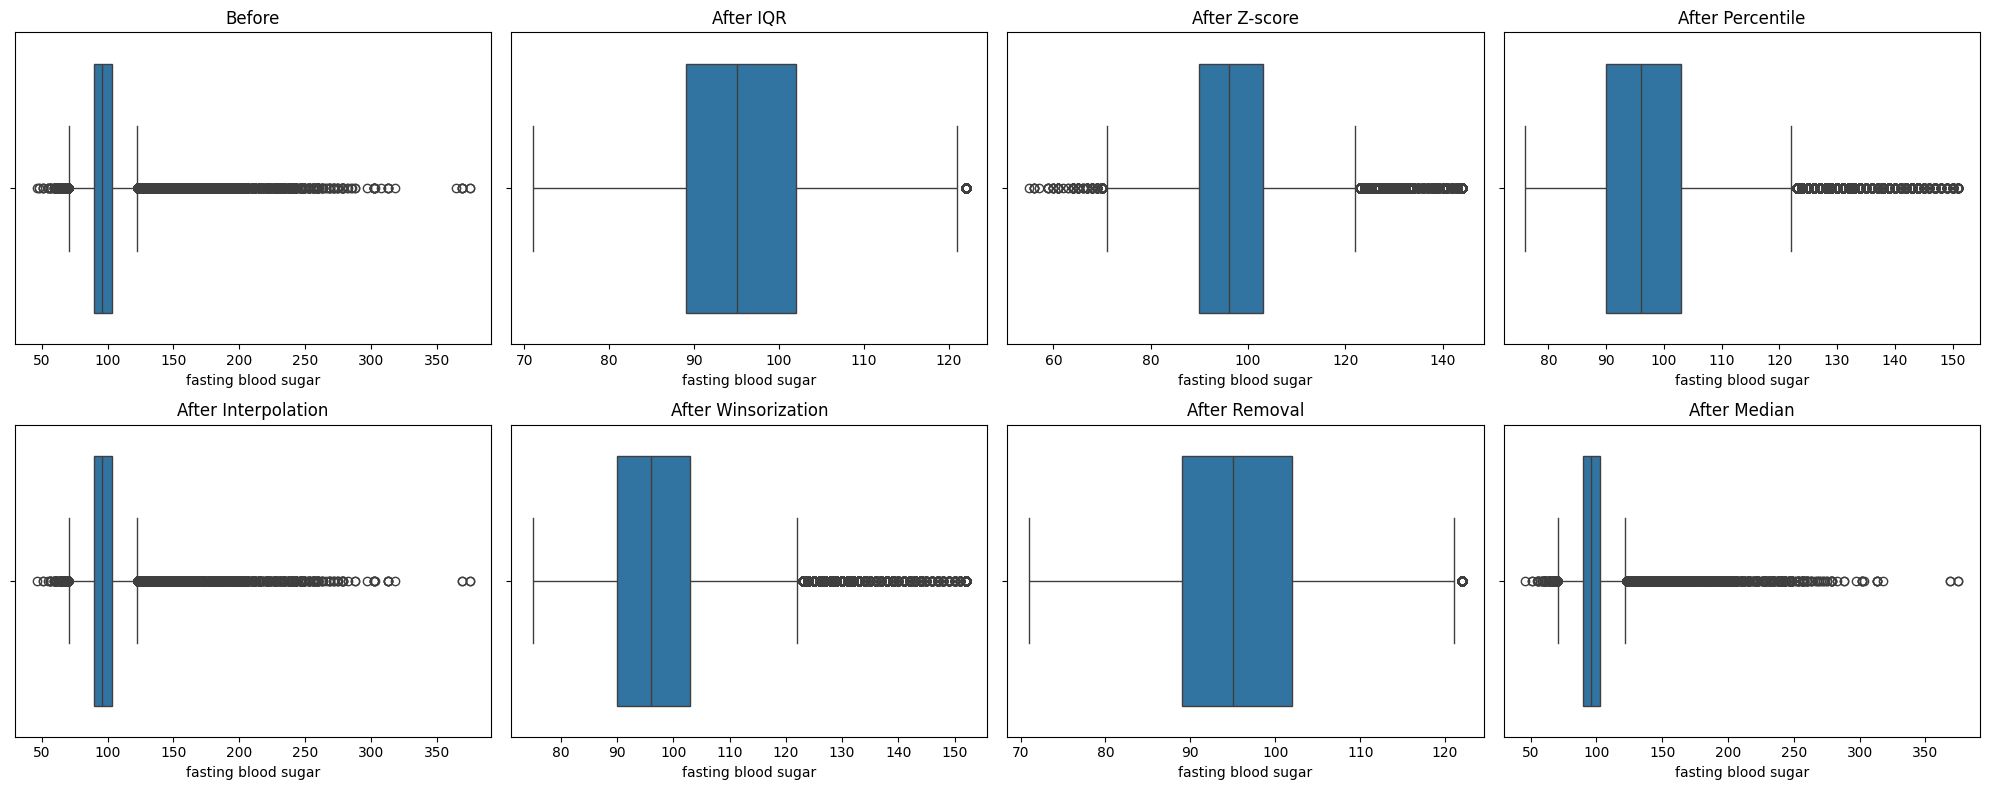

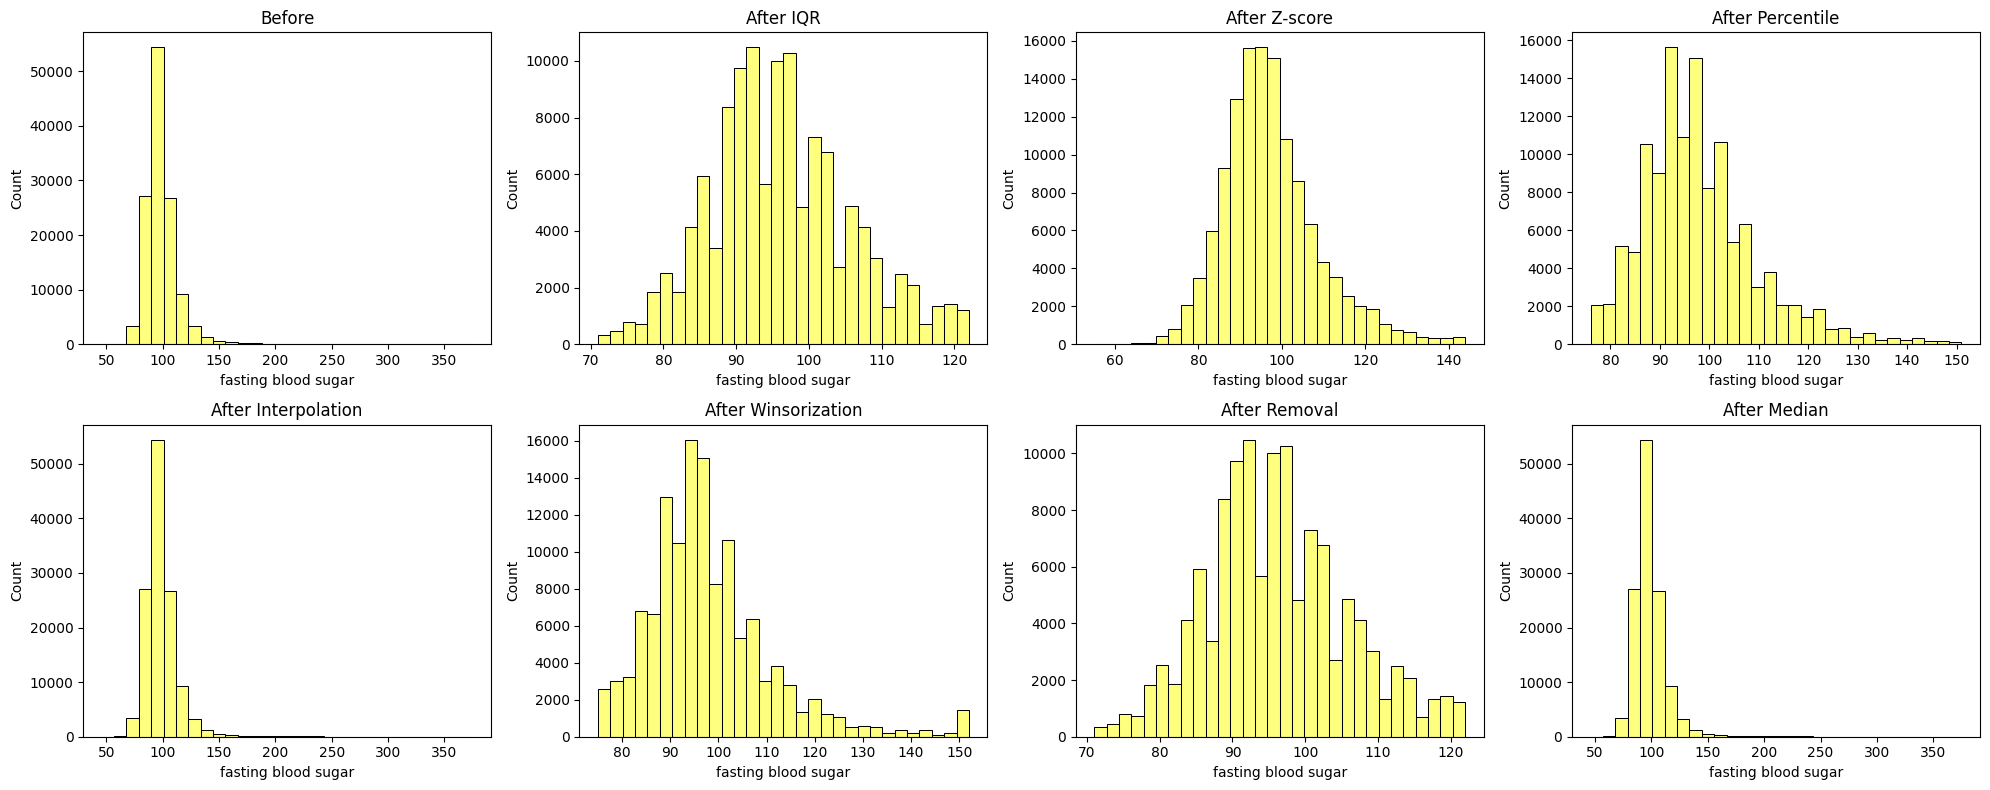

In [23]:
handled_fbs_outliers=handle_outliers("fasting blood sugar")
plot_handled_outliers(handled_fbs_outliers, "fasting blood sugar")

#### **Observations:**

It was noticed that handling the outliers in any of the previous methods will remove significant data and therefore it was decided not to remove them.

### **Feature 6 : Height**

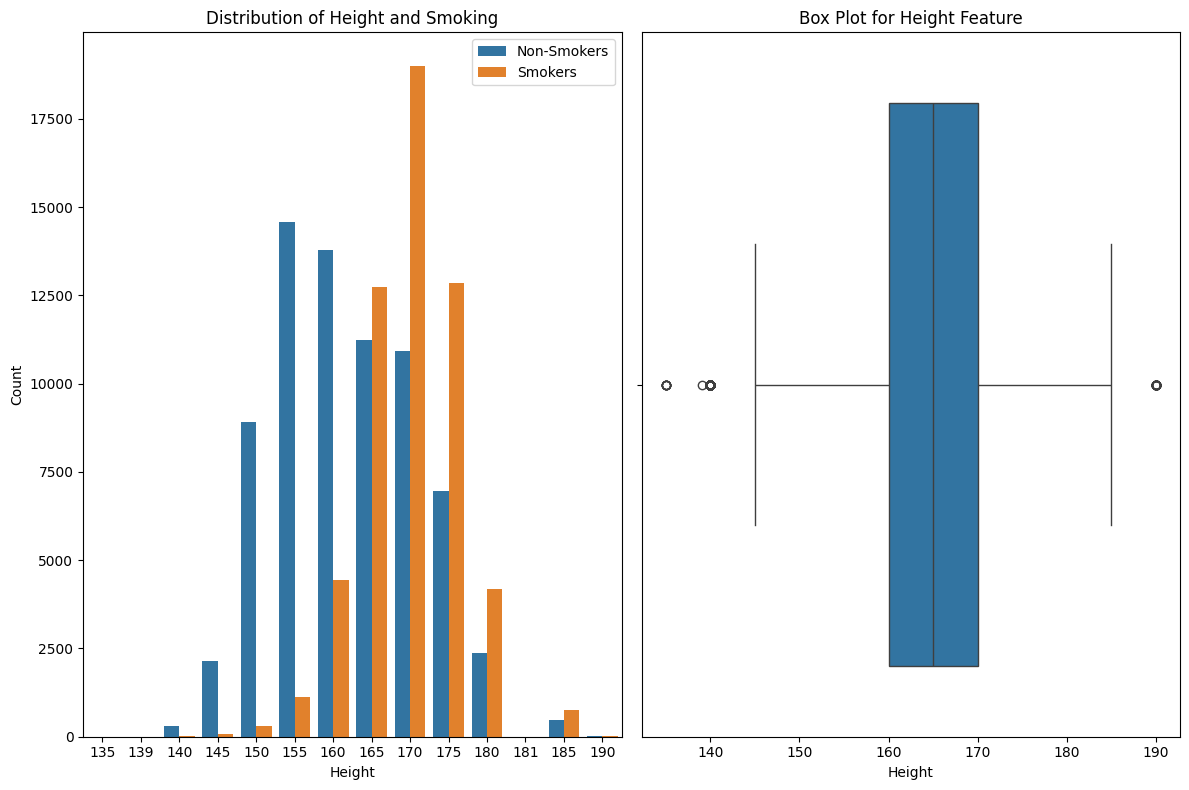

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

# Distribution of Height Feature with respect to the target
sns.countplot(x="height(cm)", data=train_df, hue="smoking", ax=ax1)
ax1.set_xlabel('Height')
ax1.set_ylabel('Count')
ax1.set_title('Distribution of Height and Smoking')
ax1.legend(labels=["Non-Smokers", "Smokers"])

# box plot for height feature
sns.boxplot(x="height(cm)", data=train_df, ax=ax2)
ax2.set_xlabel('Height')
ax2.set_title('Box Plot for Height Feature')

plt.tight_layout()
plt.show()


/tmp/ipykernel_22025/911518981.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ["Mean", round(height_smokers_mean[0], 3), round(height_nonsmokers_mean[0], 3)],
/tmp/ipykernel_22025/911518981.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ["Median", round(height_smokers_median[0], 3), round(height_nonsmokers_median[0], 3)],
/tmp/ipykernel_22025/911518981.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ["Max Value", ro

╒════════════════════╤═══════════╤═══════════════╕
│                    │   Smokers │   Non-Smokers │
╞════════════════════╪═══════════╪═══════════════╡
│ Mean               │   169.742 │       161.799 │
├────────────────────┼───────────┼───────────────┤
│ Median             │   170     │       160     │
├────────────────────┼───────────┼───────────────┤
│ Max Value          │   190     │       190     │
├────────────────────┼───────────┼───────────────┤
│ Min Value          │   135     │       135     │
├────────────────────┼───────────┼───────────────┤
│ Range              │    55     │        55     │
├────────────────────┼───────────┼───────────────┤
│ Standard Deviation │     6.149 │         9.013 │
├────────────────────┼───────────┼───────────────┤
│ Skew               │    -0.251 │         0.192 │
├────────────────────┼───────────┼───────────────┤
│ IQR                │    10     │        15     │
╘════════════════════╧═══════════╧═══════════════╛


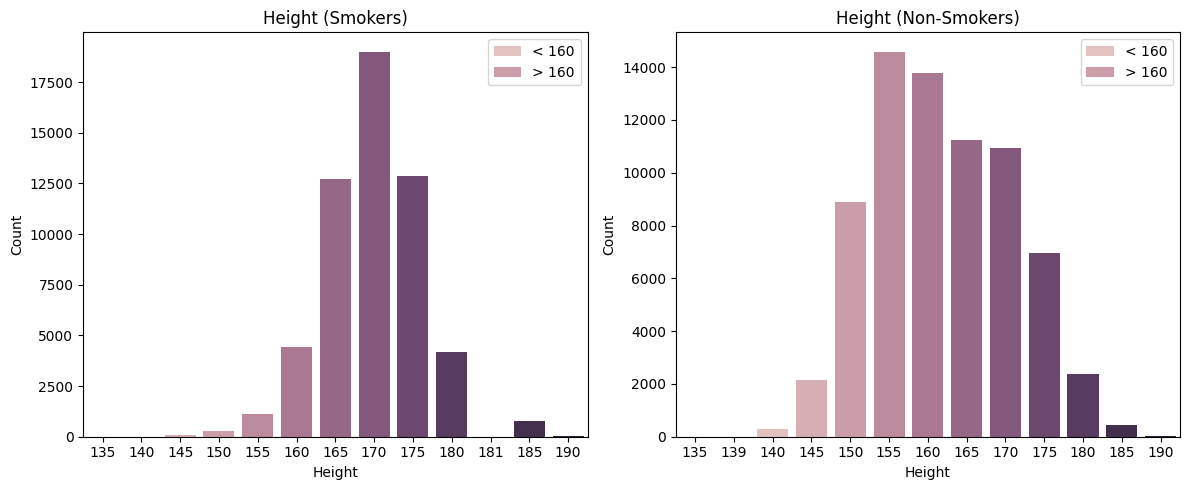

In [25]:


# Analyzing Height Feature for Smokers
height_smokers = train_df[train_df["smoking"] == 1][["height(cm)"]]
height_smokers_percentage = 100 * len(height_smokers[height_smokers["height(cm)"] > 160]) / len(height_smokers)
height_nonsmokers = train_df[train_df["smoking"] == 0][["height(cm)"]]
height_nonsmokers_percentage = 100 * len(height_nonsmokers[height_nonsmokers["height(cm)"] > 160]) / len(height_nonsmokers)

# Central Tendency Measures
height_smokers_mean = height_smokers.mean()
height_smokers_median = height_smokers.median()
height_nonsmokers_mean = height_nonsmokers.mean()
height_nonsmokers_median = height_nonsmokers.median()

# Measures of Dispersion
height_smokers_max_val = height_smokers.max()
height_smokers_min_val = height_smokers.min()
height_smokers_range = height_smokers_max_val - height_smokers_min_val
height_smokers_std = height_smokers.std()
height_smokers_skew = height_smokers.skew()
height_smokers_iqr = height_smokers.quantile(0.75) - height_smokers.quantile(0.25)
height_nonsmokers_max_val = height_nonsmokers.max()
height_nonsmokers_min_val = height_nonsmokers.min()
height_nonsmokers_range = height_nonsmokers_max_val - height_nonsmokers_min_val
height_nonsmokers_std = height_nonsmokers.std()
height_nonsmokers_skew = height_nonsmokers.skew()
height_nonsmokers_iqr = height_nonsmokers.quantile(0.75) - height_nonsmokers.quantile(0.25)

# Create table data
table_data = [
    ["", "Smokers", "Non-Smokers"],
    ["Mean", round(height_smokers_mean[0], 3), round(height_nonsmokers_mean[0], 3)],
    ["Median", round(height_smokers_median[0], 3), round(height_nonsmokers_median[0], 3)],
    ["Max Value", round(height_smokers_max_val[0], 3), round(height_nonsmokers_max_val[0], 3)],
    ["Min Value", round(height_smokers_min_val[0], 3), round(height_nonsmokers_min_val[0], 3)],
    ["Range", round(height_smokers_range[0], 3), round(height_nonsmokers_range[0], 3)],
    ["Standard Deviation", round(height_smokers_std[0], 3), round(height_nonsmokers_std[0], 3)],
    ["Skew", round(height_smokers_skew[0], 3), round(height_nonsmokers_skew[0], 3)],
    ["IQR", round(height_smokers_iqr[0], 3), round(height_nonsmokers_iqr[0], 3)]
]

# Print the table
print(tabulate(table_data, headers="firstrow", tablefmt="fancy_grid"))

# Set table alignment
table.align = "c"

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Histogram for Height For Smokers
sns.countplot(x="height(cm)", data=height_smokers, hue="height(cm)", ax=ax1)
ax1.set_xlabel('Height')
ax1.set_ylabel('Count')
ax1.set_title('Height (Smokers)')
ax1.legend(labels=["< 160", "> 160"])

# Histogram for Height For Non-Smokers
sns.countplot(x="height(cm)", data=height_nonsmokers, hue="height(cm)", ax=ax2)
ax2.set_xlabel('Height')
ax2.set_ylabel('Count')
ax2.set_title('Height (Non-Smokers)')
ax2.legend(labels=["< 160", "> 160"])


plt.tight_layout()
plt.show()


### **Handling Outliers**

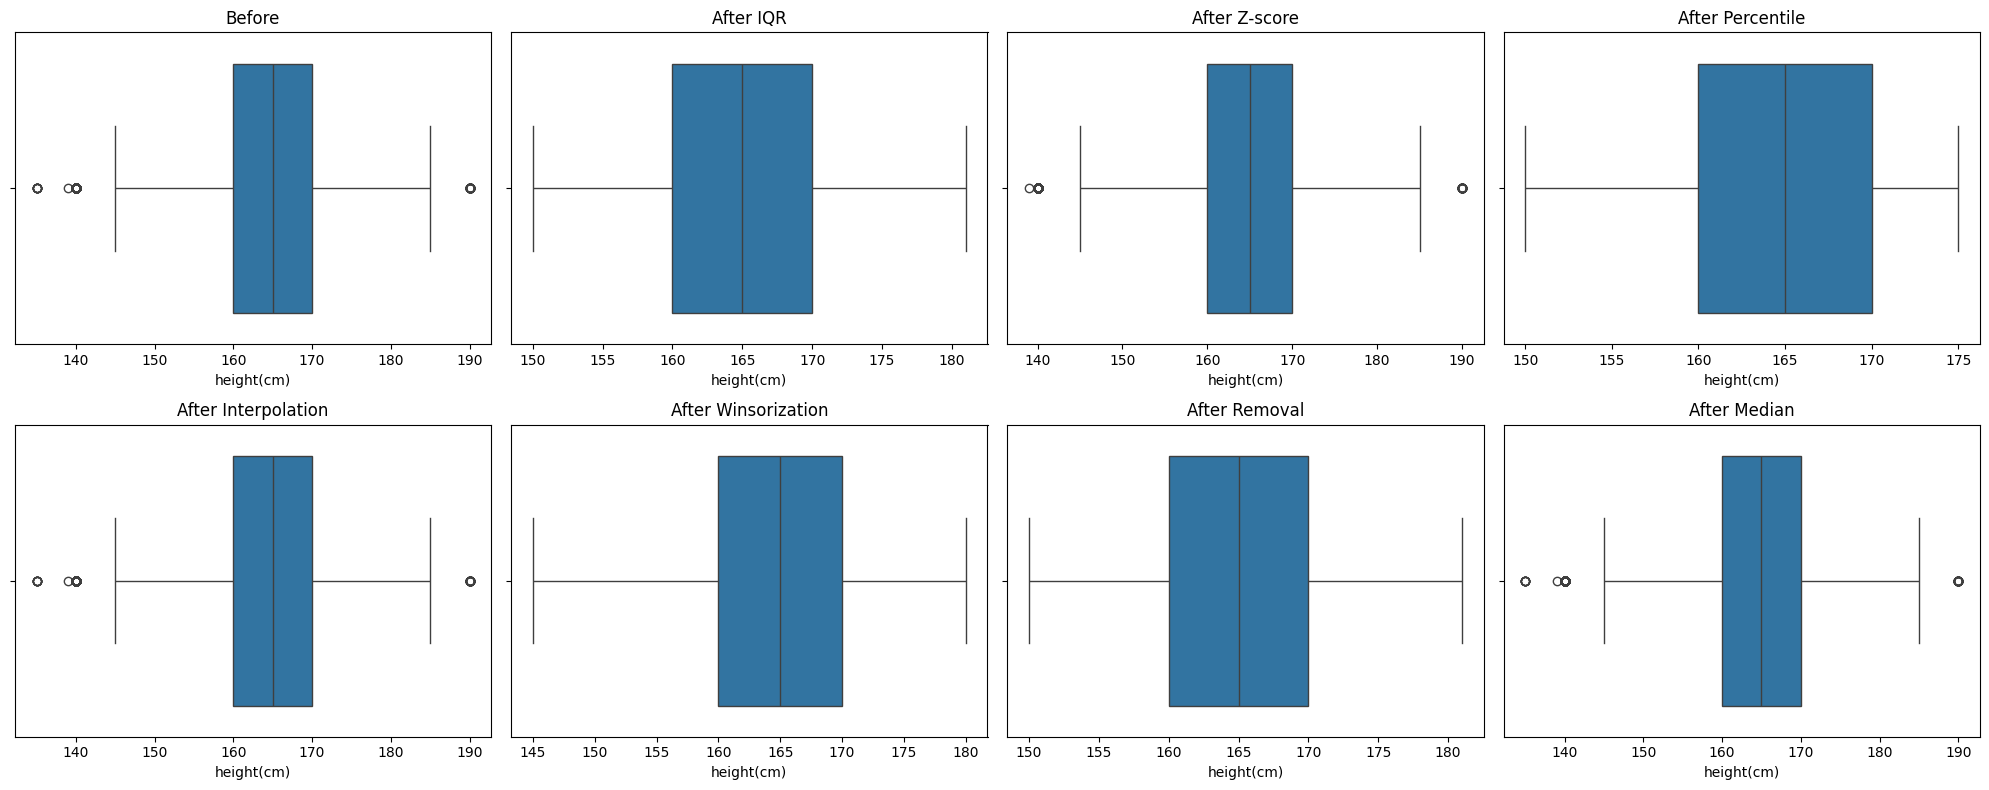

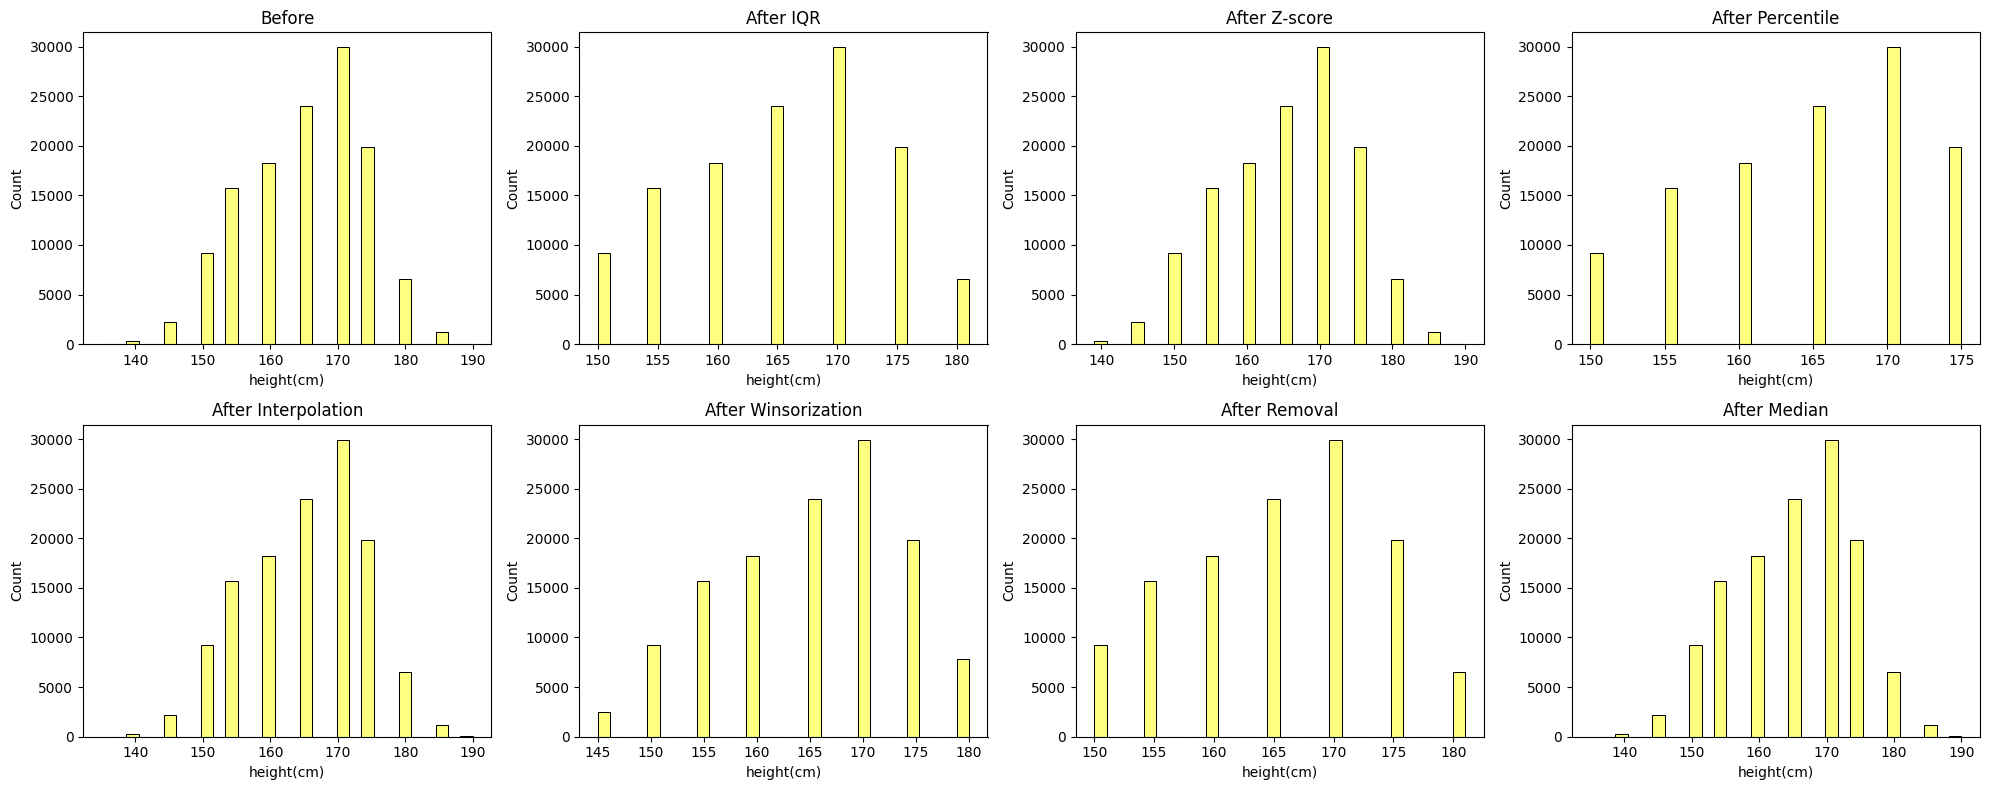

In [26]:
handled_height_outliers=handle_outliers("height(cm)")
plot_handled_outliers(handled_height_outliers, "height(cm)")

#### **Observations:**
* It was noticed that handling outliers using IQR method preserved that data's distribution and removed all the outlier as shown in the whiskers plot
* The Z-score method preserved the data's distribution but didn't remove all the outliers


In [27]:
height_feature = train_df["height(cm)"]

# Handling Outliers using IQR
height_q1 = height_feature.quantile(0.25)
height_q3 = height_feature.quantile(0.75)
height_iqr = height_q3 - height_q1
height_lower_limit = height_q1 - 1.5 * height_iqr
height_upper_limit = height_q3 + 1.5 * height_iqr
height_feature_IQR = height_feature[(height_feature > height_lower_limit) & (height_feature < height_upper_limit)]


### **Removing Outlier**


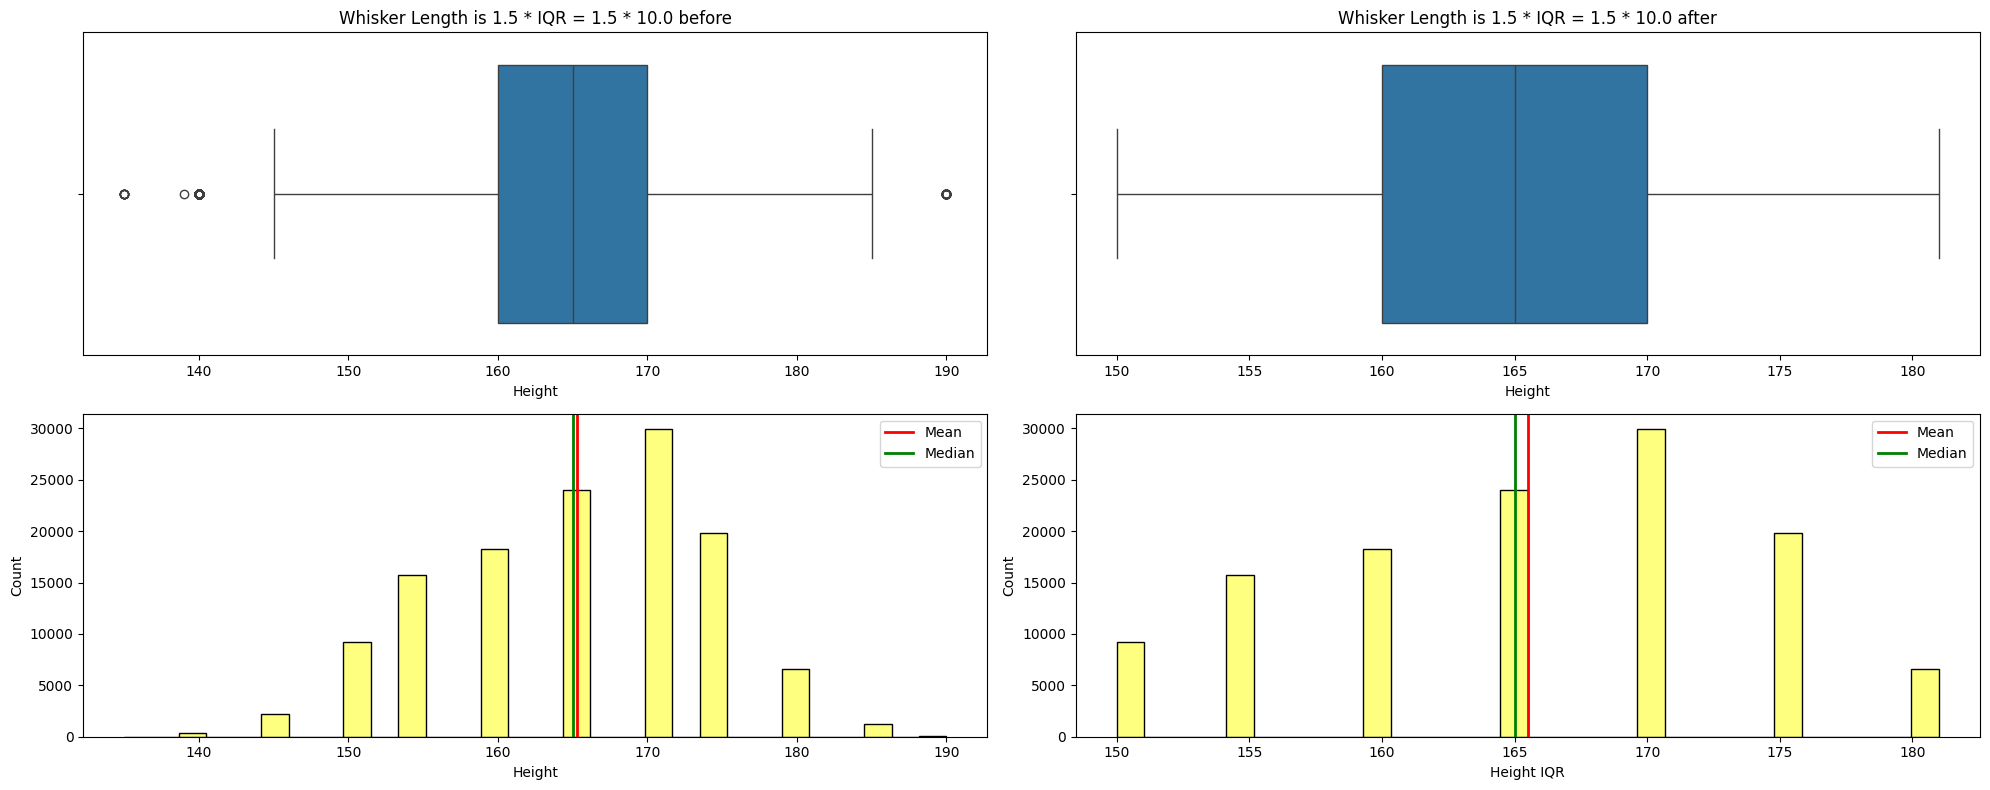

In [28]:
# Create subplots of Outliers before and after handling box plots
fig, axes = plt.subplots(2, 2, figsize=(20, 8))

# Box Plot for Height Feature before handling outliers
sns.boxplot(x=height_feature, ax=axes[0, 0])
axes[0, 0].set_xlabel('Height')
axes[0, 0].set_title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(height_iqr, 3)} before")

# Histogram for Height Feature before handling outliers
sns.histplot(height_feature, bins=30, alpha=0.5, color="yellow", ax=axes[1, 0])
axes[1, 0].set_xlabel('Height')
axes[1, 0].set_ylabel('Count')
axes[1, 0].axvline(height_feature.mean(), c='red', ls='-', lw=2)
axes[1, 0].axvline(height_feature.median(), c='green', ls='-', lw=2)

axes[1, 0].legend(labels=['Mean', 'Median'])

# Remove outliers using IQR from train_df
train_df = train_df[(train_df["height(cm)"] > height_lower_limit) & (train_df["height(cm)"] < height_upper_limit)]

# Box Plot for Height Feature after handling outliers using IQR
sns.boxplot(x=height_feature_IQR, ax=axes[0, 1])
axes[0, 1].set_xlabel('Height')
axes[0, 1].set_title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(height_iqr, 3)} after")

# Histogram for Height Feature after handling outliers using IQR
sns.histplot(height_feature_IQR, bins=30, alpha=0.5, color="yellow", ax=axes[1, 1])
axes[1, 1].set_xlabel('Height IQR')
axes[1, 1].set_ylabel('Count')
axes[1, 1].axvline(height_feature_IQR.mean(), c='red', ls='-', lw=2)
axes[1, 1].axvline(height_feature_IQR.median(), c='green', ls='-', lw=2)
axes[1, 1].legend(labels=['Mean', 'Median'])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()



## **Feature 7: Weight**

Observations: Weights are approximately Gaussian, but they are skewed to the right
Weights are on average higher for smokers, and their distribution is less skewed

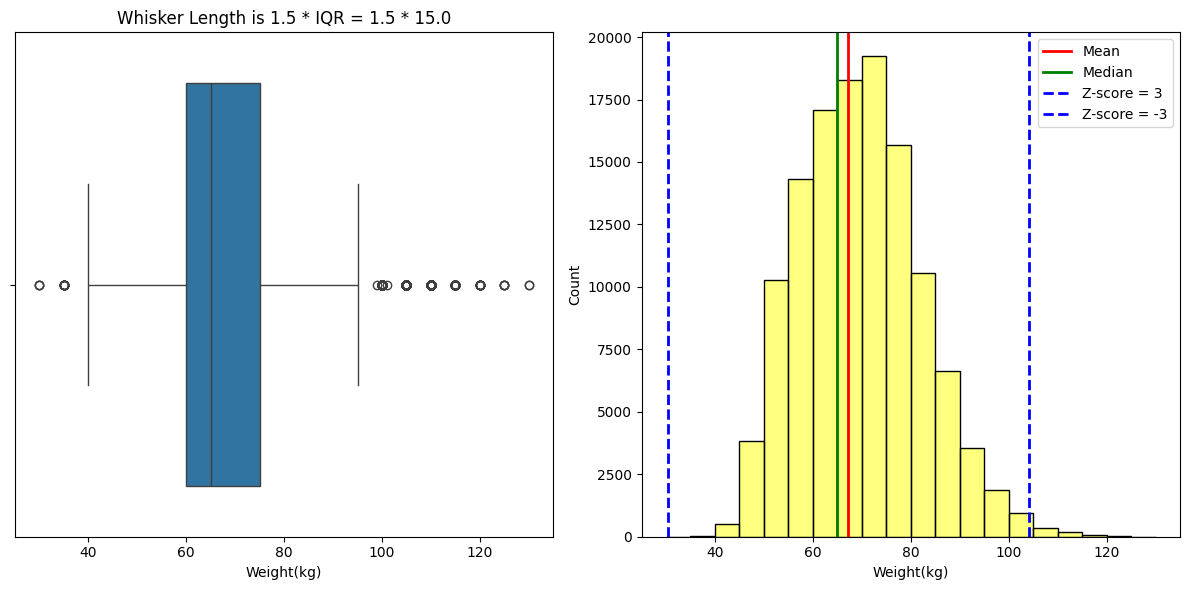

+------------+--------------------+---------+
| Feature    | Measure            |   Value |
+============+====================+=========+
| Weight(kg) | Mean               |  67.226 |
+------------+--------------------+---------+
|            | Median             |  65     |
+------------+--------------------+---------+
|            | Max Value          | 130     |
+------------+--------------------+---------+
|            | Min Value          |  30     |
+------------+--------------------+---------+
|            | Range              | 100     |
+------------+--------------------+---------+
|            | Standard Deviation |  12.303 |
+------------+--------------------+---------+
|            | Skew               |   0.373 |
+------------+--------------------+---------+
|            | IQR                |  15     |
+------------+--------------------+---------+


In [29]:

weight_feature = train_df["weight(kg)"]

# Central Tendency Measures
weight_mean = weight_feature.mean()
weight_median = weight_feature.median()

# Measures of Dispersion
weight_max_val = weight_feature.max()
weight_min_val = weight_feature.min()
weight_range = weight_max_val - weight_min_val
weight_std = weight_feature.std()
weight_skew = weight_feature.skew()
weight_iqr = weight_feature.quantile(0.75) - weight_feature.quantile(0.25)
z_score_positive3 = 3 * weight_std + weight_mean
z_score_negative3 = -3 * weight_std + weight_mean

# Create subplots for box plot and histogram
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Box Plot for Weight(kg) Feature
sns.boxplot(x=weight_feature, ax=axes[0])
axes[0].set_xlabel('Weight(kg)')
axes[0].set_title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(weight_iqr, 3)}")

# Histogram for Weight(kg) Feature
sns.histplot(weight_feature, bins=20, alpha=0.5, color="yellow", ax=axes[1])
axes[1].set_xlabel('Weight(kg)')
axes[1].set_ylabel('Count')
axes[1].axvline(weight_mean, c='red', ls='-', lw=2)
axes[1].axvline(weight_median, c='green', ls='-', lw=2)
axes[1].axvline(z_score_positive3, c='blue', ls='--', lw=2)
axes[1].axvline(z_score_negative3, c='blue', ls='--', lw=2)
axes[1].legend(labels=['Mean', 'Median', "Z-score = 3", "Z-score = -3"])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Create table data
table_data = [
    ["Weight(kg)", "Mean", round(weight_mean, 3)],
    ["", "Median", round(weight_median, 3)],
    ["", "Max Value", round(weight_max_val, 3)],
    ["", "Min Value", round(weight_min_val, 3)],
    ["", "Range", round(weight_range, 3)],
    ["", "Standard Deviation", round(weight_std, 3)],
    ["", "Skew", round(weight_skew, 3)],
    ["", "IQR", round(weight_iqr, 3)],
]

# Print the table
print(tabulate(table_data, headers=["Feature", "Measure", "Value"], tablefmt="grid"))


Average Weight for Smokers: 71.93 kg
Median Weight for Smokers: 70.00 kg
Average Weight for Non-Smokers: 63.49 kg
Median Weight for Non-Smokers: 60.00 kg


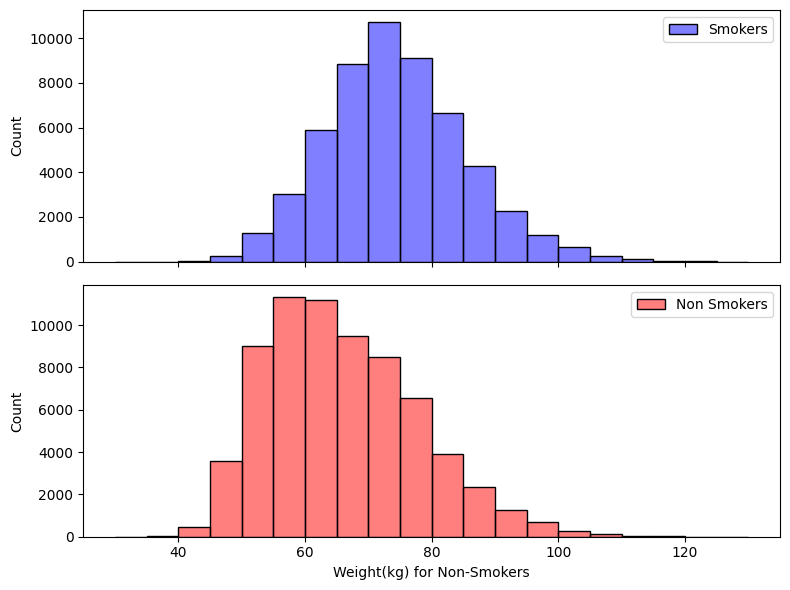

In [30]:
# Separate data for smokers and non-smokers based on 'weight(kg)' levels
weight_smokers = train_df[train_df['smoking'] == 1]['weight(kg)']
weight_nonsmokers = train_df[train_df['smoking'] == 0]['weight(kg)']

# Creating subplots with two histograms stacked vertically for 'Weight(kg)' with shared x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)  # Share x-axis between subplots

avg_weight_smokers = weight_smokers.mean()
median_smokers = weight_smokers.median()
avg_weight_nonsmokers = weight_nonsmokers.mean()
median_nonsmokers = weight_nonsmokers.median()

# Print average weights
print(f"Average Weight for Smokers: {avg_weight_smokers:.2f} kg")
print(f"Median Weight for Smokers: {median_smokers:.2f} kg")
print(f"Average Weight for Non-Smokers: {avg_weight_nonsmokers:.2f} kg")
print(f"Median Weight for Non-Smokers: {median_nonsmokers:.2f} kg")

sns.histplot(data=weight_smokers, color='blue', alpha=0.5, bins=20, label='Smokers', ax=ax1)
ax1.set_xlabel('Weight(kg) for Smokers')
ax1.legend()

sns.histplot(data=weight_nonsmokers, color='red', alpha=0.5, bins=20, label='Non Smokers', ax=ax2)
ax2.set_xlabel('Weight(kg) for Non-Smokers')
ax2.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### **Handling Outliers**

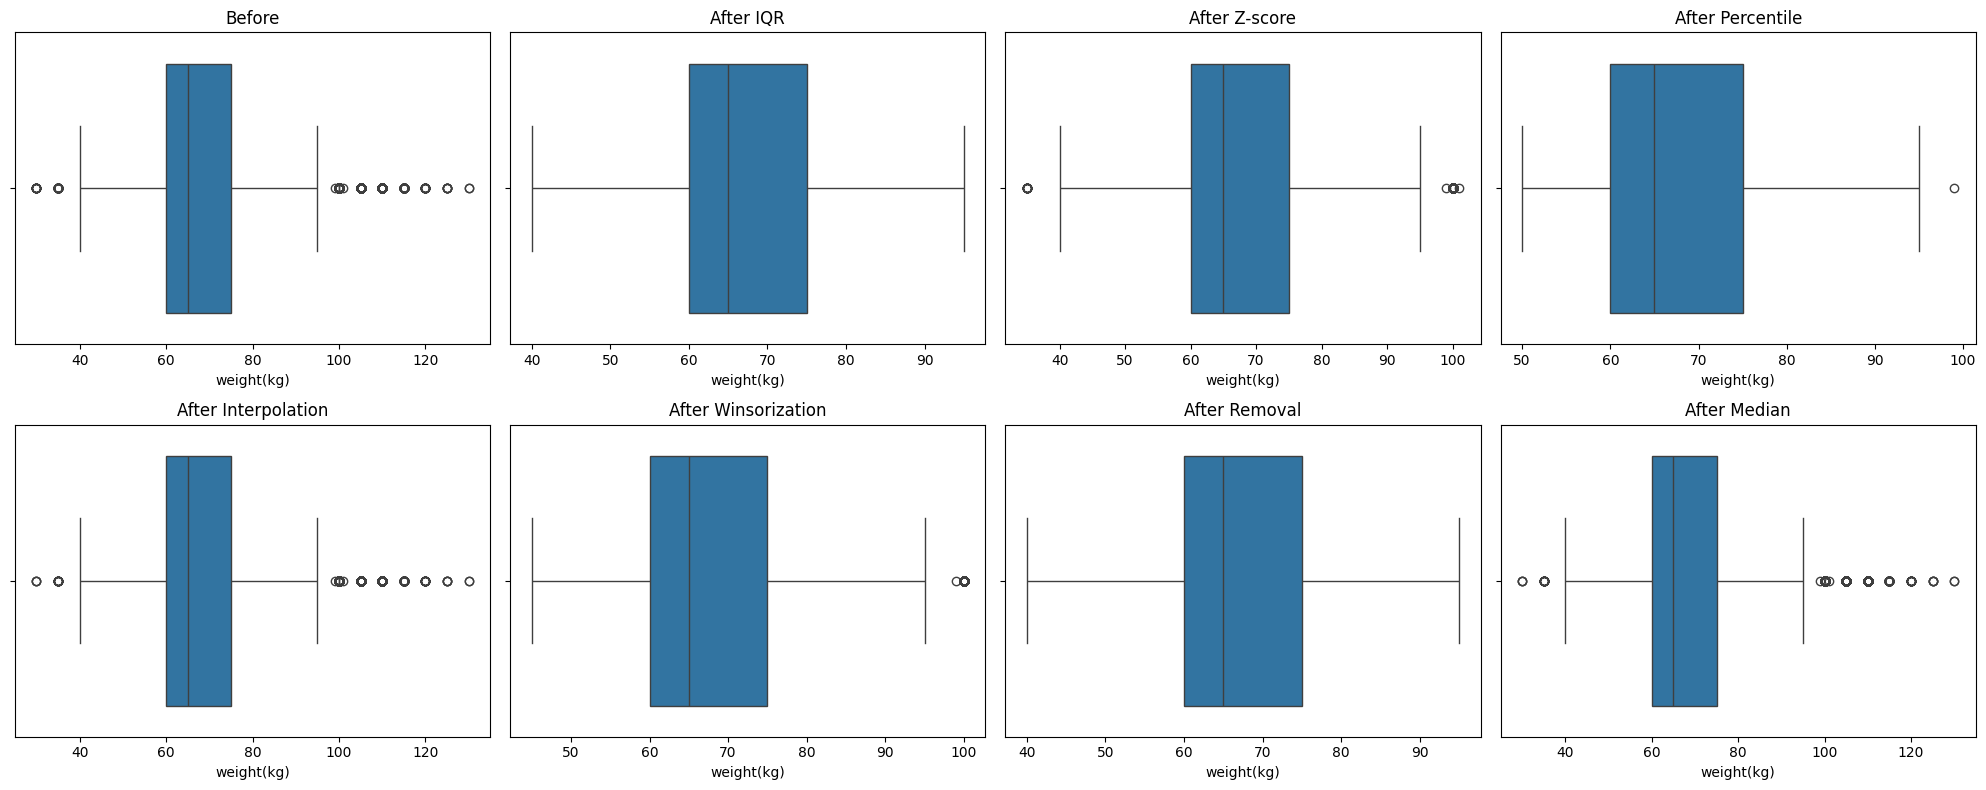

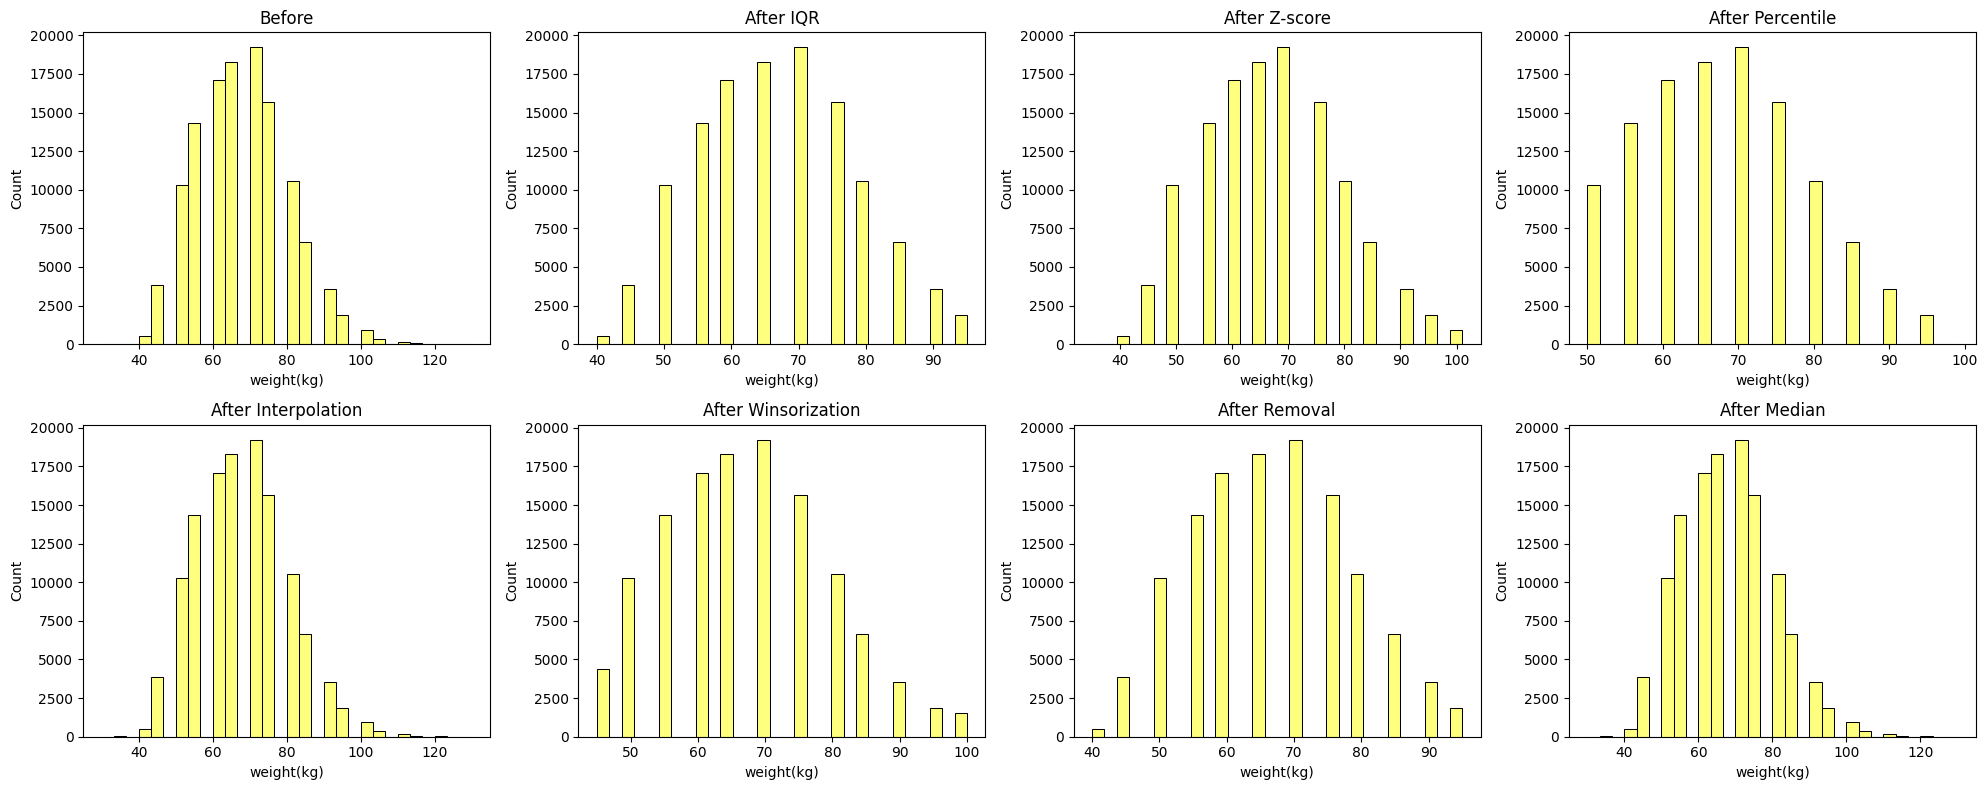

In [31]:
handled_weight_outliers=handle_outliers("weight(kg)")
plot_handled_outliers(handled_weight_outliers, "weight(kg)")

#### **Observations**
* Handling Outliers using IQR removed all of them but the distribution has slightly changed
* The distribution is closer to the original distribution in case of the Z-score handling method but it didn't remove all the outliers
* Interpolation didn't remove any of the outliers and didn't change the original distribution which shows that the data doesn't have null values


In [32]:

# Handling Outliers using Z-Score
weight_mean = weight_feature.mean()
weight_std = weight_feature.std()
z_score_positive3 = 3 * weight_std + weight_mean
z_score_negative3 = -3 * weight_std + weight_mean
weight_feature_Z = weight_feature[(weight_feature > z_score_negative3) & (weight_feature < z_score_positive3)]


### **Removing Outliers**

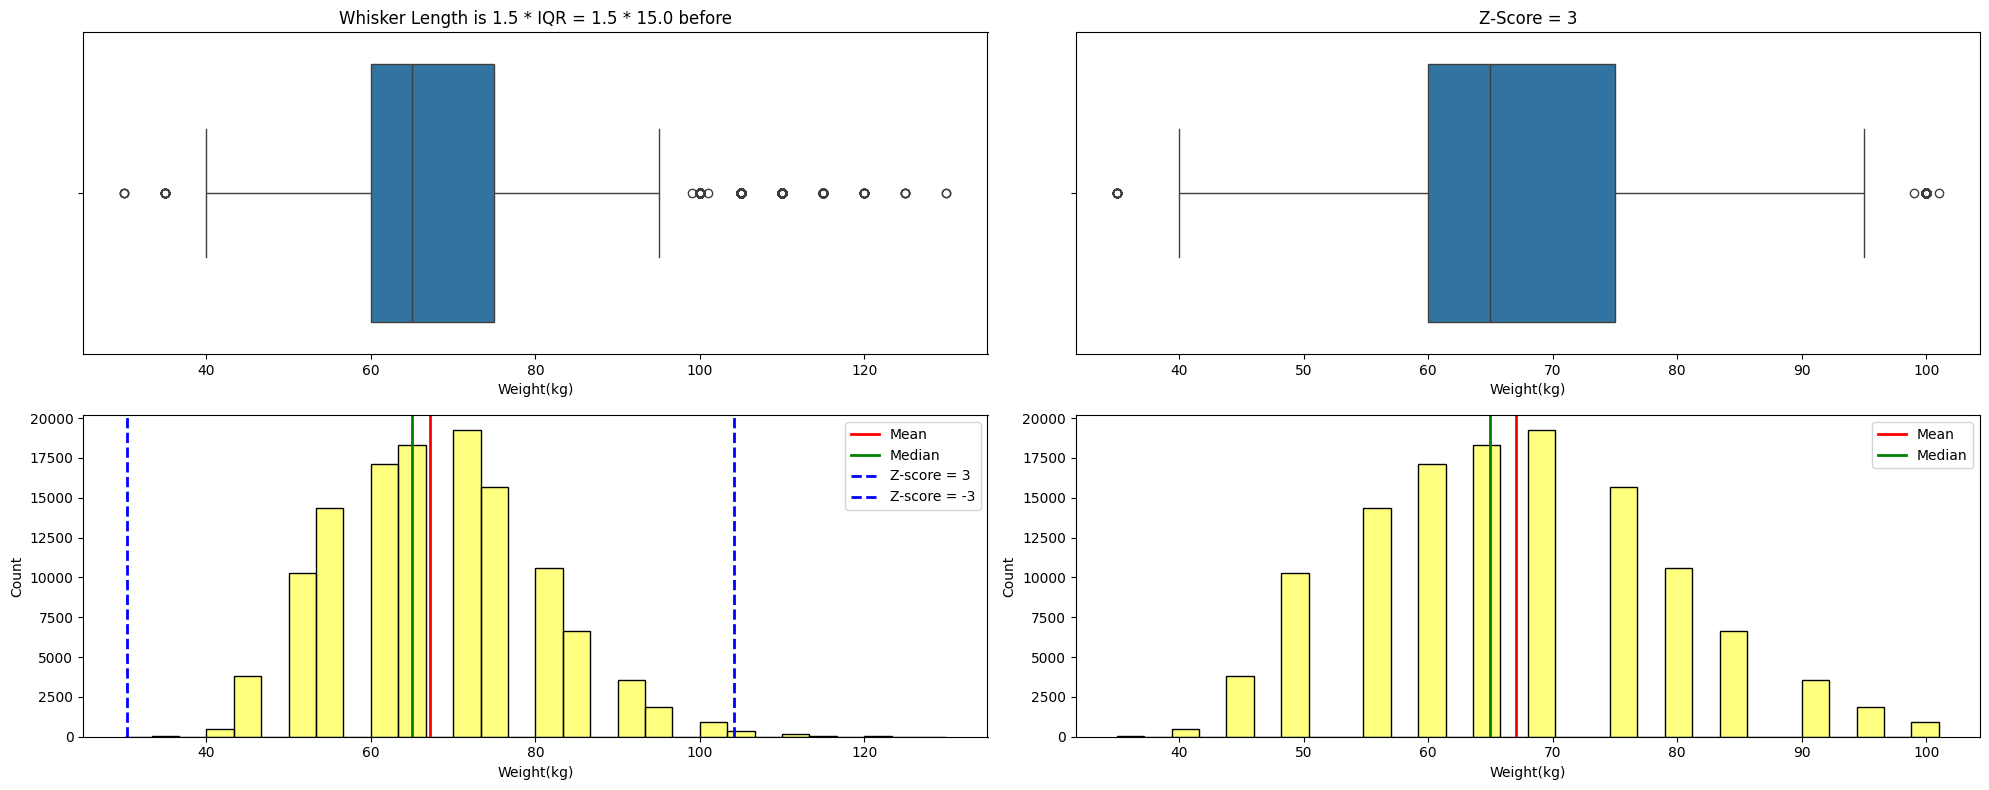

In [33]:
# Create subplots of Outliers before and after handling box plots
fig, axes = plt.subplots(2, 2, figsize=(20, 8))

# Box Plot for Weight(kg) Feature before handling outliers
sns.boxplot(x=weight_feature, ax=axes[0, 0])
axes[0, 0].set_xlabel('Weight(kg)')
axes[0, 0].set_title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(weight_iqr, 3)} before")

# Histogram for Weight(kg) Feature before handling outliers
sns.histplot(weight_feature, bins=30, alpha=0.5, color="yellow", ax=axes[1, 0])
axes[1, 0].set_xlabel('Weight(kg)')
axes[1, 0].set_ylabel('Count')
axes[1, 0].axvline(weight_mean, c='red', ls='-', lw=2)
axes[1, 0].axvline(weight_median, c='green', ls='-', lw=2)
axes[1, 0].axvline(z_score_positive3, c='blue', ls='--', lw=2)
axes[1, 0].axvline(z_score_negative3, c='blue', ls='--', lw=2)
axes[1, 0].legend(labels=['Mean', 'Median', "Z-score = 3", "Z-score = -3"])

# Remove outliers using Z-Score from train_df
train_df = train_df[(train_df["weight(kg)"] > z_score_negative3) & (train_df["weight(kg)"] < z_score_positive3)]

# Box Plot for Weight(kg) Feature after handling outliers using Z-Score
sns.boxplot(x=weight_feature_Z, ax=axes[0, 1])
axes[0, 1].set_xlabel('Weight(kg)')
axes[0, 1].set_title(f"Z-Score = 3")

# Histogram for Weight(kg) Feature after handling outliers using Z-Score
sns.histplot(weight_feature_Z, bins=30, alpha=0.5, color="yellow", ax=axes[1, 1])
axes[1, 1].set_xlabel('Weight(kg)')
axes[1, 1].set_ylabel('Count')
axes[1, 1].axvline(weight_feature_Z.mean(), c='red', ls='-', lw=2)
axes[1, 1].axvline(weight_feature_Z.median(), c='green', ls='-', lw=2)
axes[1, 1].legend(labels=['Mean', 'Median'])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### **Feature 8: Cholesterol**

Descriptive Statistics for Cholesterol:
Mean: 195.65397923875432
Median: 196.0
Standard Deviation: 28.1560923315202
Minimum Value: 91
Maximum Value: 351
Skewness: 0.0020052399595928694
IQR 42.0


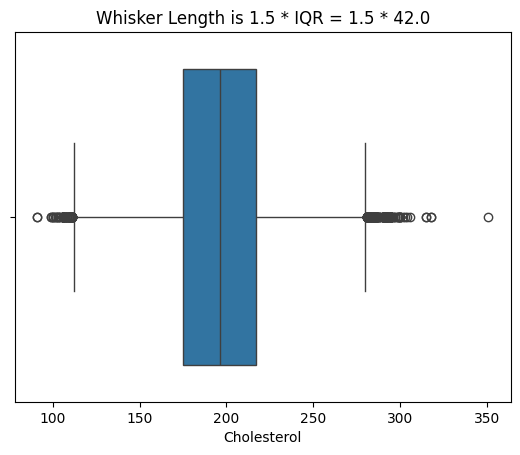

In [34]:
# Descriptive Statistics of the Choleterol feature
cholesterol_mean = train_df['Cholesterol'].mean()
cholesterol_median = train_df['Cholesterol'].median()
cholesterol_std = train_df['Cholesterol'].std()
cholesterol_min = train_df['Cholesterol'].min()
cholesterol_max = train_df['Cholesterol'].max()
cholesterol_iqr = train_df['Cholesterol'].quantile(0.75) - train_df['Cholesterol'].quantile(0.25)
z_score_pos3 = 3 * cholesterol_std + cholesterol_mean
z_score_neg3 = -3 * cholesterol_std + cholesterol_mean

# Print the descriptive statistics
print("Descriptive Statistics for Cholesterol:")
print(f"Mean: {cholesterol_mean}")
print(f"Median: {cholesterol_median}")
print(f"Standard Deviation: {cholesterol_std}")
print(f"Minimum Value: {cholesterol_min}")
print(f"Maximum Value: {cholesterol_max}")
#skewness
print("Skewness:", train_df['Cholesterol'].skew())
#iqr
print(f"IQR {round(cholesterol_iqr, 3)}")


# Box Plot for Hemoglobin Feature
sns.boxplot(x=train_df['Cholesterol'])
plt.xlabel('Cholesterol')
plt.title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(cholesterol_iqr, 3)}")
plt.show()

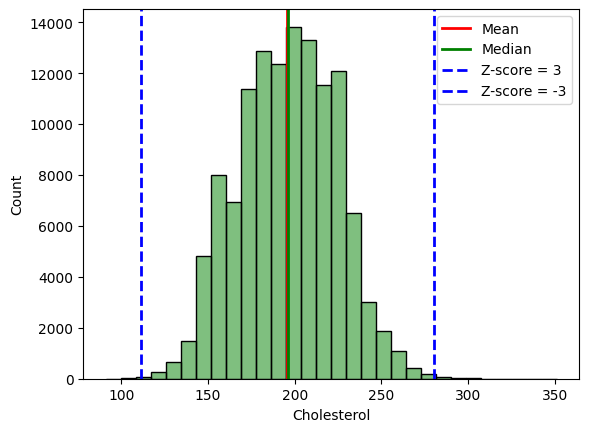

In [35]:
#Histogram for Cholesterol feature
sns.histplot(train_df['Cholesterol'], bins=30, alpha=0.5, color="green")
plt.xlabel('Cholesterol')
plt.ylabel('Count')
plt.axvline(cholesterol_mean, c='red', ls='-', lw=2)
plt.axvline(cholesterol_median, c='green', ls='-', lw=2)
plt.axvline(z_score_pos3, c='blue', ls='--', lw=2)
plt.axvline(z_score_neg3, c='blue', ls='--', lw=2)

plt.legend(labels=['Mean', 'Median', "Z-score = 3", "Z-score = -3"])
plt.show()

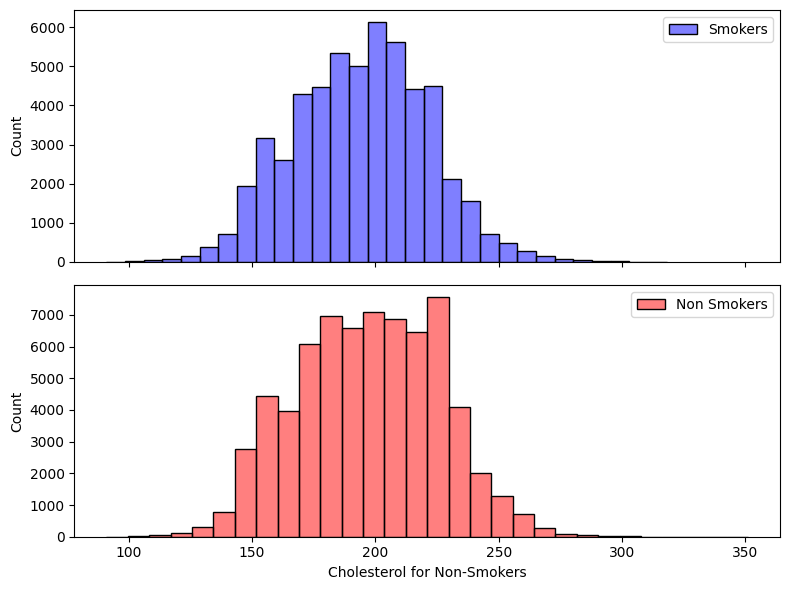

In [36]:
# Analyzing Cholesterol Feature with respect to the target
Cholesterol_smokers = train_df[train_df['smoking'] == 1]['Cholesterol']
Cholesterol_nonsmokers = train_df[train_df['smoking'] == 0]['Cholesterol']

# Creating subplots for Choleterol feature
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)  # Share x-axis between subplots

sns.histplot(data=Cholesterol_smokers, color='blue', alpha=0.5, bins=30, label='Smokers', ax=ax1)
ax1.set_xlabel('Cholesterol for Smokers')
ax1.legend()

sns.histplot(data=Cholesterol_nonsmokers, color='red', alpha=0.5, bins=30, label='Non Smokers', ax=ax2)
ax2.set_xlabel('Cholesterol for Non-Smokers')
ax2.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
plt.show()

#### **Observations:**
* Both Distributions follow Gaussian Distribution

### **Handling Outliers**

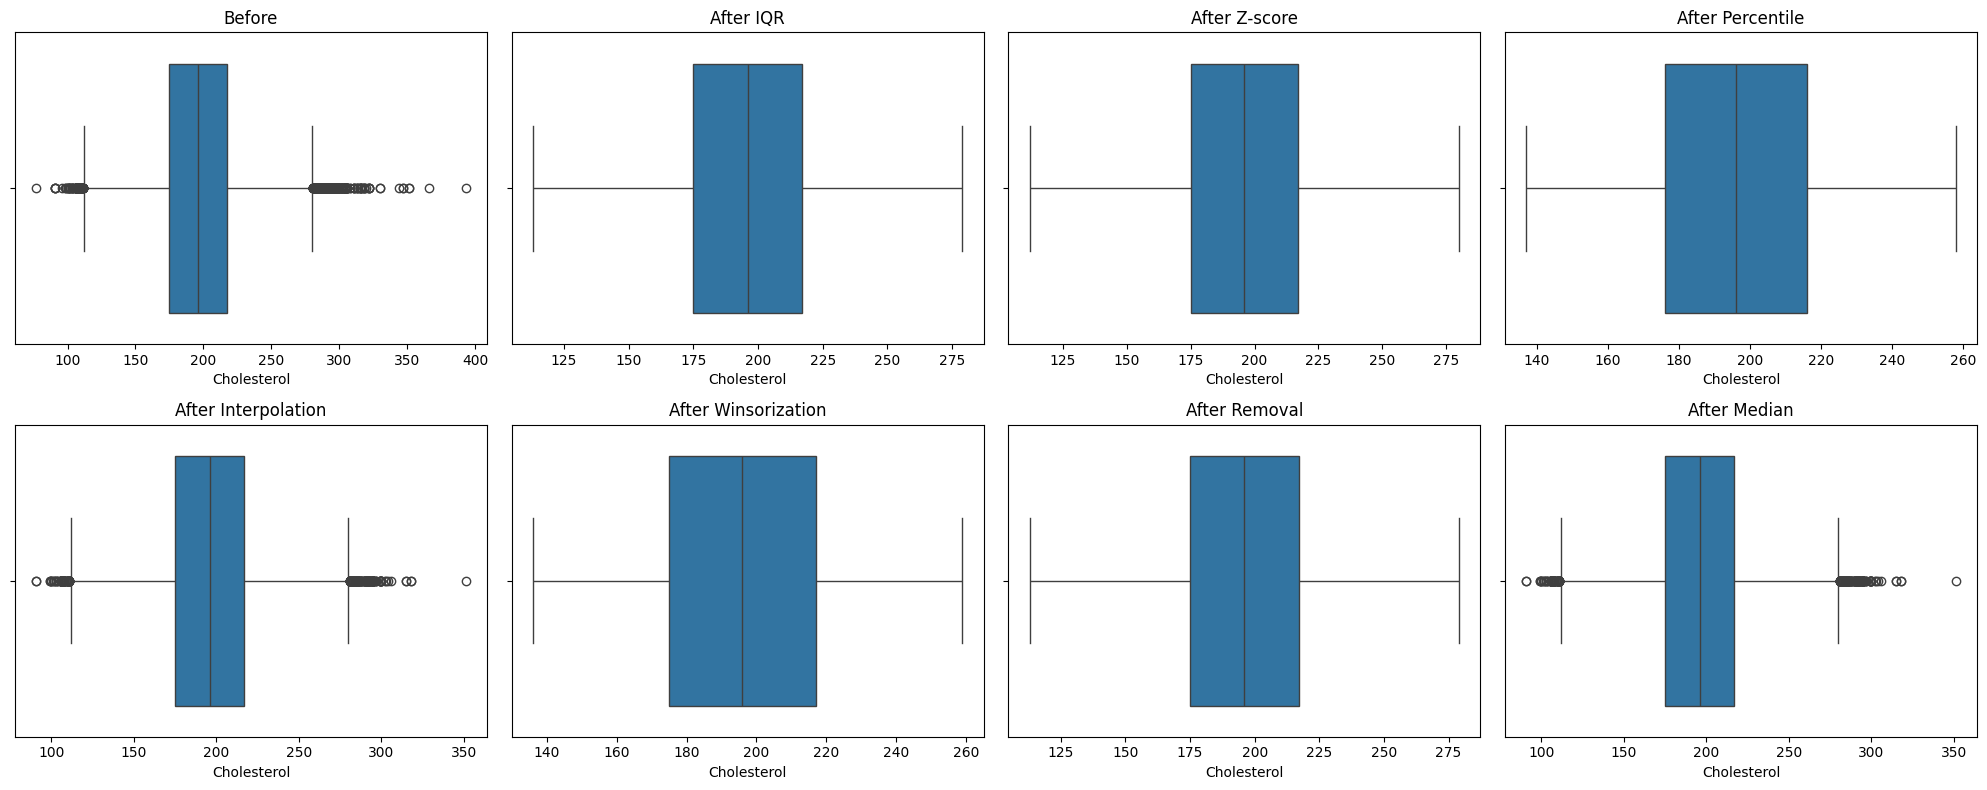

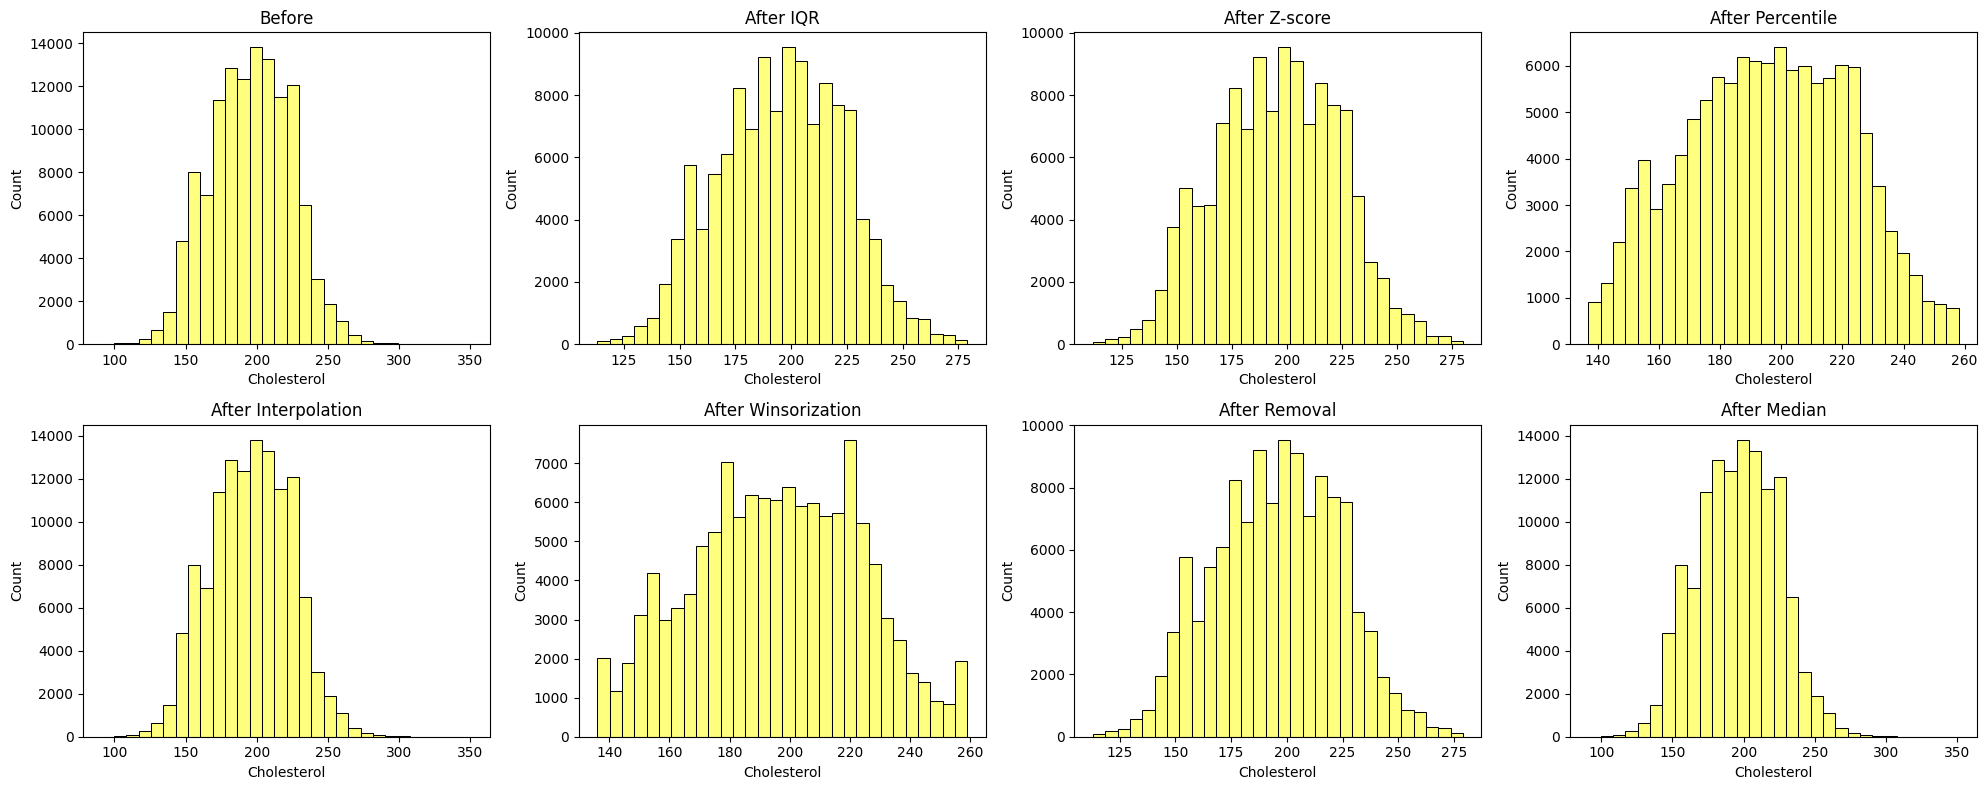

In [37]:
handled_cholesterol_outliers=handle_outliers("Cholesterol")
plot_handled_outliers(handled_cholesterol_outliers, "Cholesterol")

#### **Observations:**
* Nearly all methods have significantly changed the original data distribution and therefore it was decided not to remove the outliers

### **Feature 9: serum creatinine**

In [38]:

# Descriptive statistics of the serum creatinine feature
serum_creatinine_mean = train_df['serum creatinine'].mean()
serum_creatinine_median = train_df['serum creatinine'].median()
serum_creatinine_std = train_df['serum creatinine'].std()
serum_creatinine_min = train_df['serum creatinine'].min()
serum_creatinine_max = train_df['serum creatinine'].max()
serum_creatinine_iqr = train_df['serum creatinine'].quantile(0.75) - train_df['serum creatinine'].quantile(0.25)
serum_creatinine_skew = train_df['serum creatinine'].skew()
serum_creatinine_kurtosis = train_df['serum creatinine'].kurtosis()
serum_creatinine_z_score_pos3 = 3 * serum_creatinine_std + serum_creatinine_mean
serum_creatinine_z_score_neg3 = -3 * serum_creatinine_std + serum_creatinine_mean

# Create a list of lists for the tabular data
table_data = [
    ["Mean", serum_creatinine_mean],
    ["Median", serum_creatinine_median],
    ["Standard Deviation", serum_creatinine_std],
    ["Minimum Value", serum_creatinine_min],
    ["Maximum Value", serum_creatinine_max],
    ["IQR", serum_creatinine_iqr],
    ["Skewness", serum_creatinine_skew],
    ["Kurtosis", serum_creatinine_kurtosis],
    ["Z-score for 3 std above mean", serum_creatinine_z_score_pos3],
    ["Z-score for 3 std below mean", serum_creatinine_z_score_neg3]
]

# Print the tabulated data
print(tabulate(table_data, headers=["Statistic", "Value"], tablefmt="grid"))


+------------------------------+-----------+
| Statistic                    |     Value |
+==============================+===========+
| Mean                         |  0.89491  |
+------------------------------+-----------+
| Median                       |  0.9      |
+------------------------------+-----------+
| Standard Deviation           |  0.177756 |
+------------------------------+-----------+
| Minimum Value                |  0.1      |
+------------------------------+-----------+
| Maximum Value                |  7.4      |
+------------------------------+-----------+
| IQR                          |  0.2      |
+------------------------------+-----------+
| Skewness                     |  0.908216 |
+------------------------------+-----------+
| Kurtosis                     | 25.4706   |
+------------------------------+-----------+
| Z-score for 3 std above mean |  1.42818  |
+------------------------------+-----------+
| Z-score for 3 std below mean |  0.361642 |
+---------

 High kurtosis suggests the presence of outliers or heavy tails in this feature.

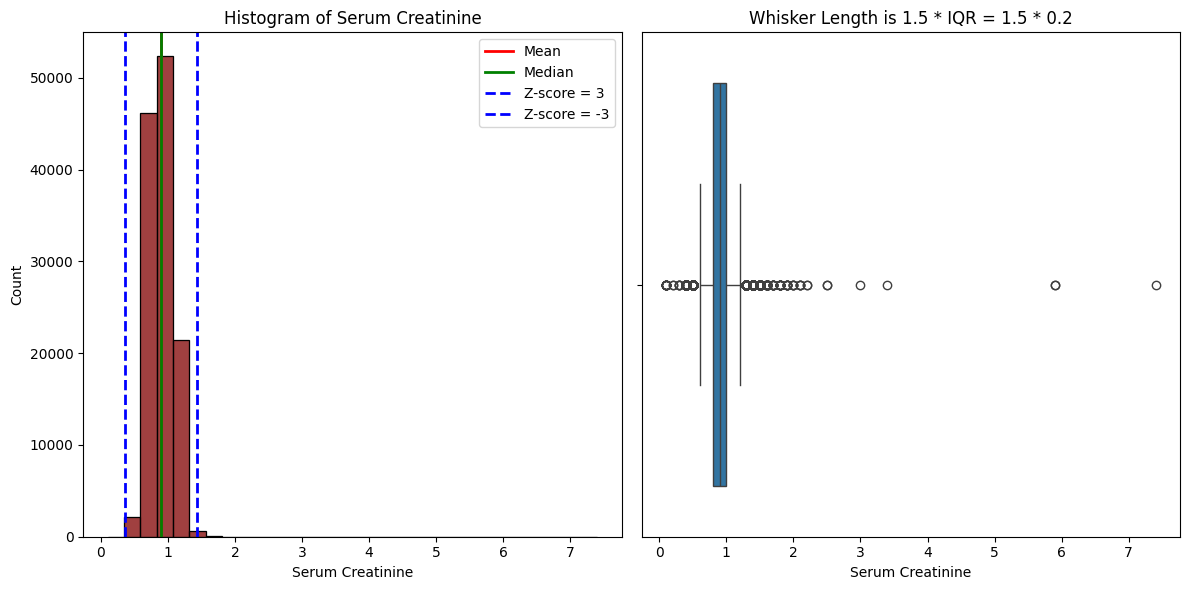

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Histogram of serum creatinine feature
sns.histplot(train_df['serum creatinine'], bins=30, color="maroon", ax=ax1)
ax1.set_xlabel('Serum Creatinine')
ax1.set_ylabel('Count')
ax1.axvline(serum_creatinine_mean, c='red', ls='-', lw=2)
ax1.axvline(serum_creatinine_median, c='green', ls='-', lw=2)
ax1.axvline(serum_creatinine_z_score_pos3, c='blue', ls='--', lw=2)
ax1.axvline(serum_creatinine_z_score_neg3, c='blue', ls='--', lw=2)
ax1.legend(labels=['Mean', 'Median', "Z-score = 3", "Z-score = -3"])
ax1.set_title('Histogram of Serum Creatinine')

# Boxplot of serum creatinine feature
sns.boxplot(x=train_df['serum creatinine'], ax=ax2)
ax2.set_xlabel('Serum Creatinine')
ax2.set_title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(serum_creatinine_iqr, 3)}")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [40]:
#Analysis after removing the skewed data
serum_creatinine_feature = train_df[train_df['serum creatinine'] < 2.5]['serum creatinine']

# Central Tendency Measures
serum_creatinine_mean = serum_creatinine_feature.mean()
serum_creatinine_median = serum_creatinine_feature.median()
serum_creatinine_iqr = serum_creatinine_feature.quantile(0.75) - serum_creatinine_feature.quantile(0.25)
serum_creatinine_std = serum_creatinine_feature.std()
serum_creatinine_skew = serum_creatinine_feature.skew()
serum_creatinine_kurtosis = serum_creatinine_feature.kurtosis()
serum_creatinine_z_score_pos3 = 3 * serum_creatinine_std + serum_creatinine_mean
serum_creatinine_z_score_neg3 = -3 * serum_creatinine_std + serum_creatinine_mean

# Create a list of lists to represent the table
table_data = [
    ["Mean", round(serum_creatinine_mean, 3)],
    ["Median", round(serum_creatinine_median, 3)],
    ["Standard Deviation", round(serum_creatinine_std, 3)],
    ["IQR", round(serum_creatinine_iqr, 3)],
    ["Skew", round(serum_creatinine_skew, 3)],
    ["Kurtosis", round(serum_creatinine_kurtosis, 3)],
    ["Z-score for 3 std above mean", round(serum_creatinine_z_score_pos3, 3)],
    ["Z-score for 3 std below mean", round(serum_creatinine_z_score_neg3, 3)]
]
print(tabulate(table_data, headers=["Statistic", "Value"], tablefmt="grid"))




+------------------------------+---------+
| Statistic                    |   Value |
+==============================+=========+
| Mean                         |   0.895 |
+------------------------------+---------+
| Median                       |   0.9   |
+------------------------------+---------+
| Standard Deviation           |   0.175 |
+------------------------------+---------+
| IQR                          |   0.2   |
+------------------------------+---------+
| Skew                         |   0.105 |
+------------------------------+---------+
| Kurtosis                     |   0.219 |
+------------------------------+---------+
| Z-score for 3 std above mean |   1.421 |
+------------------------------+---------+
| Z-score for 3 std below mean |   0.369 |
+------------------------------+---------+


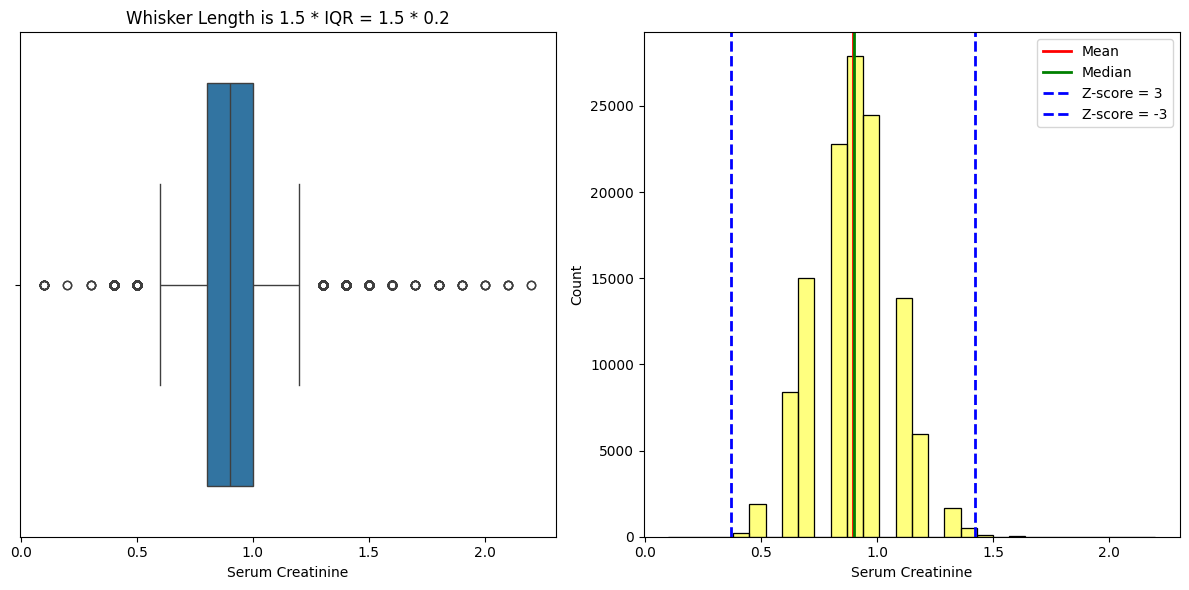

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot after removing skewed data
sns.boxplot(x=serum_creatinine_feature, ax=ax1)
ax1.set_xlabel('Serum Creatinine')
ax1.set_title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(serum_creatinine_iqr, 3)}")

# Barplot after removing skewed data
sns.histplot(serum_creatinine_feature, bins=30, alpha=0.5, color="yellow", ax=ax2)
ax2.set_xlabel('Serum Creatinine')
ax2.set_ylabel('Count')
ax2.axvline(serum_creatinine_mean, c='red', ls='-', lw=2)
ax2.axvline(serum_creatinine_median, c='green', ls='-', lw=2)
ax2.axvline(serum_creatinine_z_score_pos3, c='blue', ls='--', lw=2)
ax2.axvline(serum_creatinine_z_score_neg3, c='blue', ls='--', lw=2)
ax2.legend(labels=['Mean', 'Median', "Z-score = 3", "Z-score = -3"])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

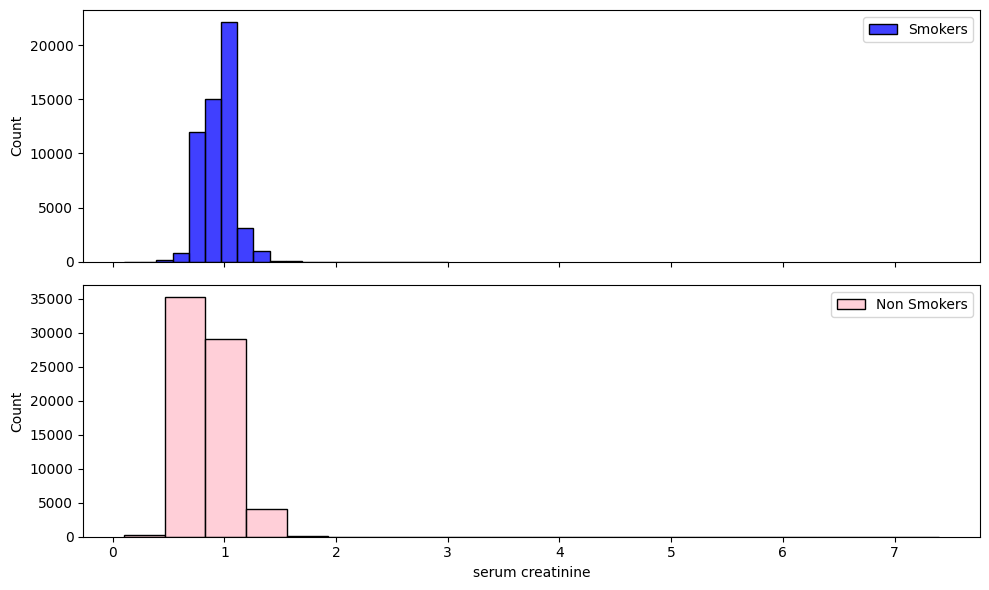

Analysis of Serum Creatinine with repect to Non Smokers:
Mean: 0.85
Standard Deviation: 0.19
Mean: 0.85
Standard Deviation: 0.19
Skewness: 1.55
Kurtosis: 36.4


Analysis of Serum Creatinine with repect to Smokers:
Mean: 0.95
Standard Deviation: 0.15
Mean: 0.95
Standard Deviation: 0.15
Skewness: 0.19
Kurtosis: 1.6


In [42]:
#serum creatinine feature with respect to the target variable
serum_creatinine_smokers = train_df[train_df['smoking'] == 1]['serum creatinine']
serum_creatinine_nonsmokers = train_df[train_df['smoking'] == 0]['serum creatinine']

# Creating subplots for serum creatinine feature
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)  

sns.histplot(data=serum_creatinine_smokers, color='blue', bins=20, label='Smokers', ax=ax1)
ax1.legend()

sns.histplot(data=serum_creatinine_nonsmokers, color='pink', bins=20, label='Non Smokers', ax=ax2)
ax2.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Descriptive statistics of the serum creatinine feature

print("Analysis of Serum Creatinine with repect to Non Smokers:")
print("Mean:", round(serum_creatinine_nonsmokers.mean(), 2))
print("Standard Deviation:", round(serum_creatinine_nonsmokers.std(), 2))
print("Mean:", round(serum_creatinine_nonsmokers.mean(), 2))
print("Standard Deviation:", round(serum_creatinine_nonsmokers.std(), 2))
print("Skewness:", round(serum_creatinine_nonsmokers.skew(), 2))
print("Kurtosis:", round(serum_creatinine_nonsmokers.kurtosis(), 2))

print("\n")

print("Analysis of Serum Creatinine with repect to Smokers:")
print("Mean:", round(serum_creatinine_smokers.mean(), 2))
print("Standard Deviation:", round(serum_creatinine_smokers.std(), 2))
print("Mean:", round(serum_creatinine_smokers.mean(), 2))
print("Standard Deviation:", round(serum_creatinine_smokers.std(), 2))
print("Skewness:", round(serum_creatinine_smokers.skew(), 2))
print("Kurtosis:", round(serum_creatinine_smokers.kurtosis(), 2))

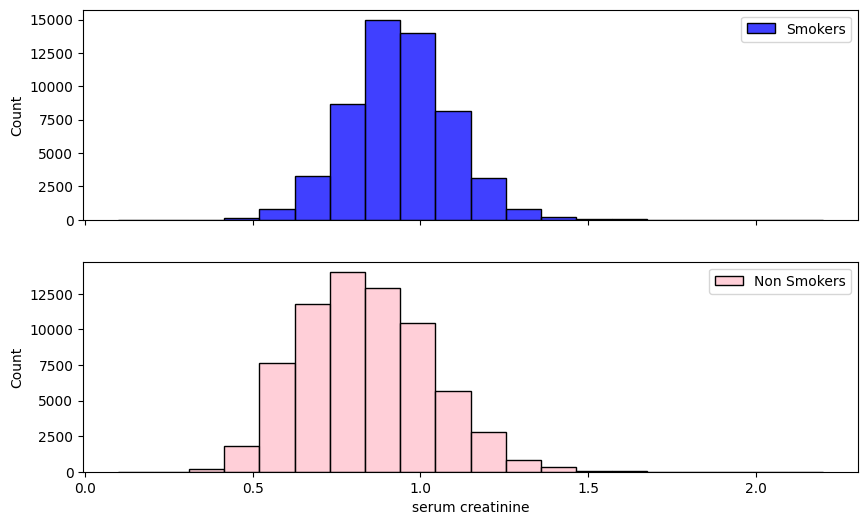

Analysis of Serum Creatinine with repect to Smokers:
+--------------------+---------+
| Statistic          |   Value |
+====================+=========+
| Mean               |    0.95 |
+--------------------+---------+
| Standard Deviation |    0.15 |
+--------------------+---------+
| Median             |    0.9  |
+--------------------+---------+
| Standard Deviation |    0.15 |
+--------------------+---------+
| Skewness           |    0.12 |
+--------------------+---------+
| Kurtosis           |    0.69 |
+--------------------+---------+


Analysis of Serum Creatinine with repect to nonsmokers:
+--------------------+---------+
| Statistic          |   Value |
+====================+=========+
| Mean               |    0.85 |
+--------------------+---------+
| Standard Deviation |    0.18 |
+--------------------+---------+
| Median             |    0.8  |
+--------------------+---------+
| Standard Deviation |    0.18 |
+--------------------+---------+
| Skewness           |    0.37 

In [43]:
#Analyzing with respect to target variable after removing outliers
serum_creatinine_df = train_df[train_df['serum creatinine'] < 2.5]
serum_smokers = serum_creatinine_df[serum_creatinine_df['smoking'] == 1]['serum creatinine']
serum_nonsmokers = serum_creatinine_df[serum_creatinine_df['smoking'] == 0]['serum creatinine']

# Creating subplots for serum creatinine feature
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
sns.histplot(data=serum_smokers, color='blue', bins=20, label='Smokers', ax=ax1)
ax1.legend()

sns.histplot(data=serum_nonsmokers, color='pink', bins=20, label='Non Smokers', ax=ax2)
ax2.legend()

plt.tight_layout
plt.show()

# Descriptive statistics of the serum creatinine feature
print("Analysis of Serum Creatinine with repect to Smokers:")
table_data = [
    ["Mean", round(serum_smokers.mean(), 2)],
    ["Standard Deviation", round(serum_smokers.std(), 2)],
    ["Median", round(serum_smokers.median(), 2)],
    ["Standard Deviation", round(serum_smokers.std(), 2)],
    ["Skewness", round(serum_smokers.skew(), 2)],
    ["Kurtosis", round(serum_smokers.kurtosis(), 2)]

]
print(tabulate(table_data, headers=["Statistic", "Value"], tablefmt="grid"))

print("\n")

print("Analysis of Serum Creatinine with repect to nonsmokers:")
table_data=[
    ["Mean", round(serum_nonsmokers.mean(), 2)],
    ["Standard Deviation", round(serum_nonsmokers.std(), 2)],
    ["Median", round(serum_nonsmokers.median(), 2)],
    ["Standard Deviation", round(serum_nonsmokers.std(), 2)],
    ["Skewness", round(serum_nonsmokers.skew(), 2)],
    ["Kurtosis", round(serum_nonsmokers.kurtosis(), 2)]
]
print(tabulate(table_data, headers=["Statistic", "Value"], tablefmt="grid"))

### **Handling Outliers**

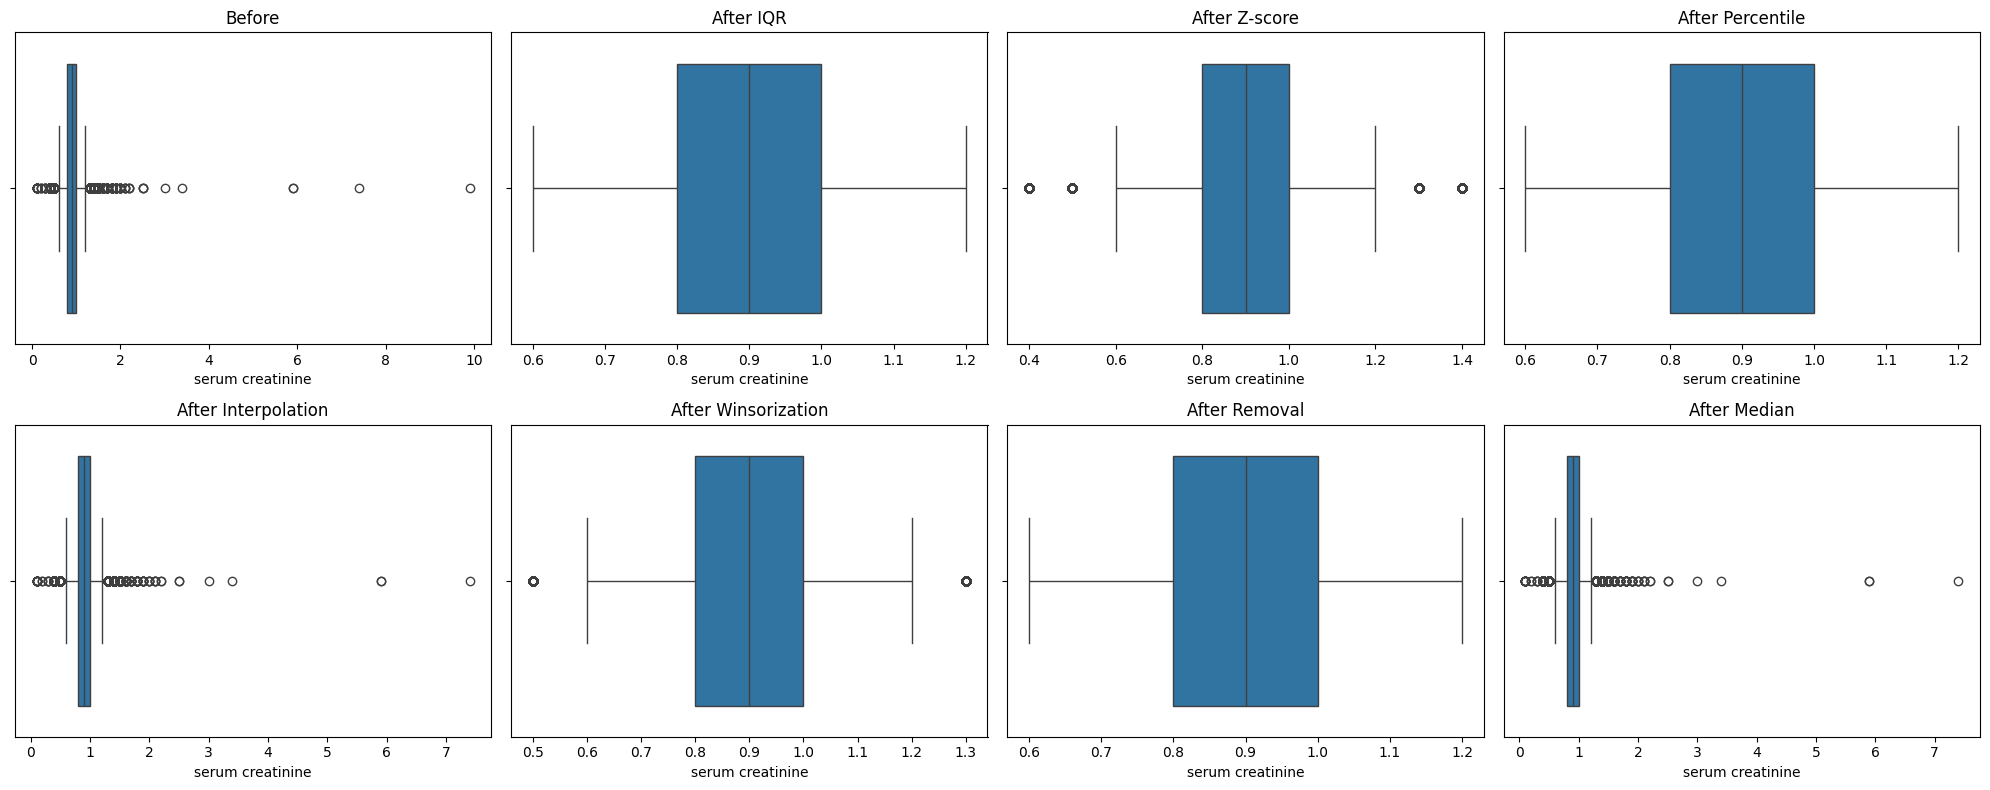

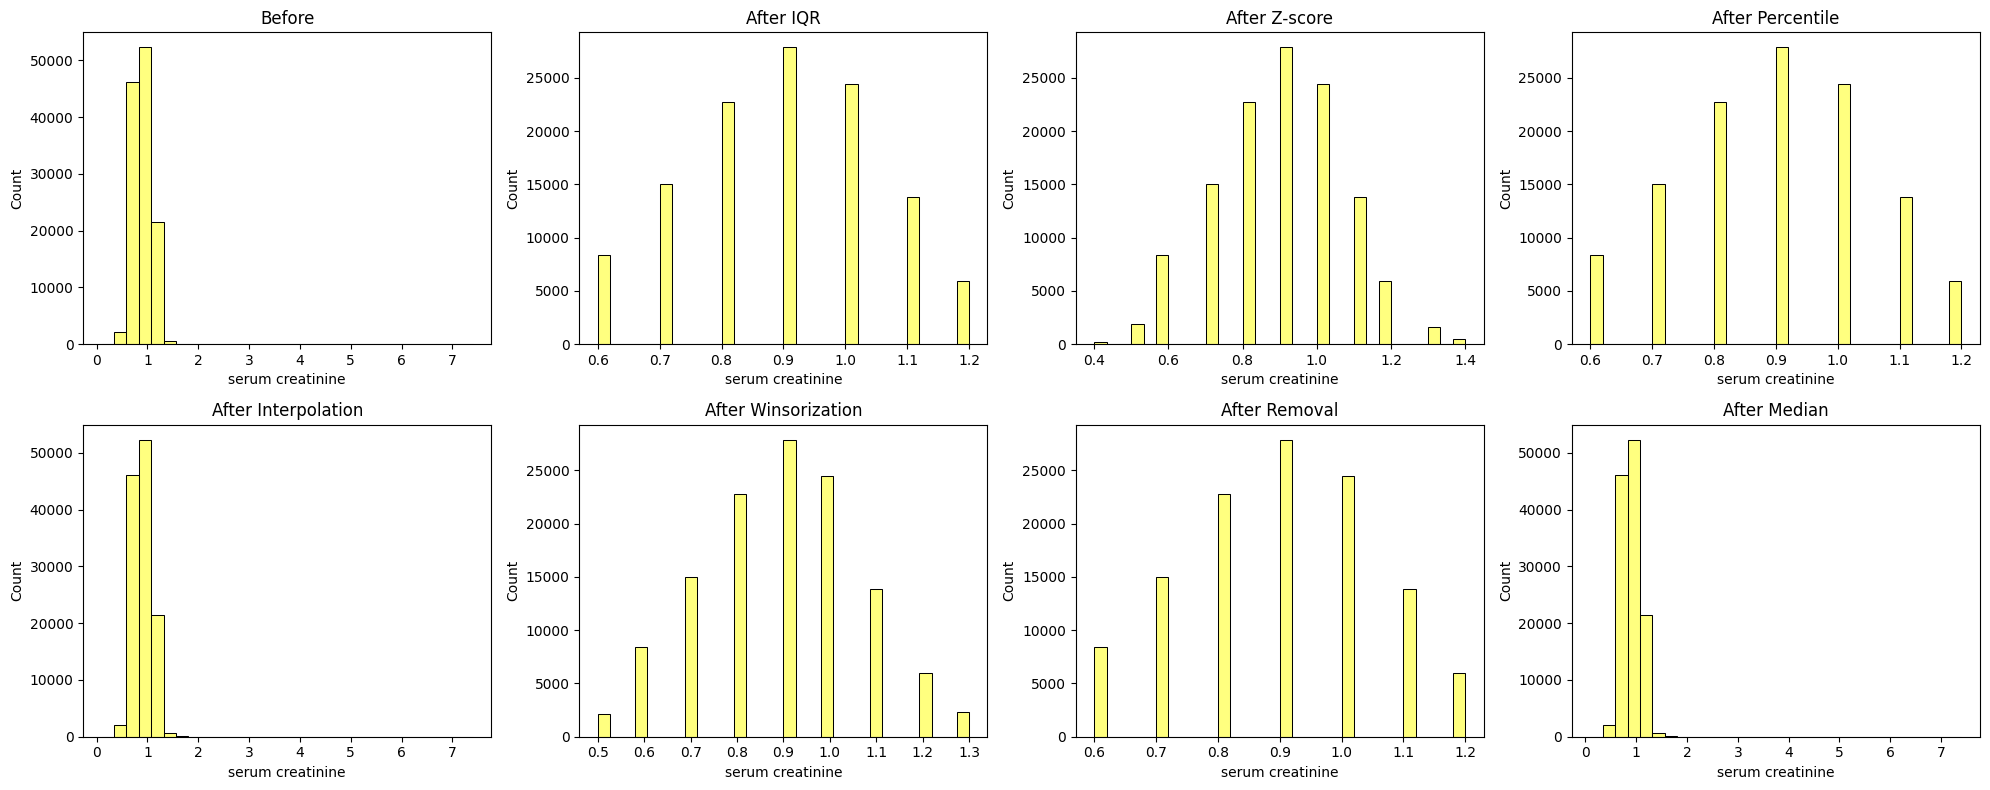

In [44]:
handled_serum_creatinine_outliers=handle_outliers("serum creatinine")
plot_handled_outliers(handled_serum_creatinine_outliers, "serum creatinine")

### **Feature 10: Gtp**

In [45]:
#descriptive statistics of the Gtp feature
gtp_mean = train_df['Gtp'].mean()
gtp_median = train_df['Gtp'].median()
gtp_std = train_df['Gtp'].std()
gtp_min = train_df['Gtp'].min()
gtp_max = train_df['Gtp'].max()
gtp_iqr = train_df['Gtp'].quantile(0.75) - train_df['Gtp'].quantile(0.25)
gtp_skew = train_df['Gtp'].skew()
gtp_kurtosis = train_df['Gtp'].kurtosis() #measure taildness of the distribution
gtp_z_score_pos3 = 3 * gtp_std + gtp_mean
gtp_z_score_neg3 = -3 * gtp_std + gtp_mean

print("Descriptive Statistics for Gtp:  ")
print(f"Mean: {gtp_mean}")
print(f"Median: {gtp_median}")
print(f"Standard Deviation: {gtp_std}")
print(f"Minimum Value: {gtp_min}")
print(f"Maximum Value: {gtp_max}")
print(f"IQR: {gtp_iqr}")
print(f"Skewness: {gtp_skew}")
print(f"Kurtosis: {gtp_kurtosis}")
print(f"Z-score for 3 std above mean: {gtp_z_score_pos3}")
print(f"Z-score for 3 std below mean: {gtp_z_score_neg3}")



Descriptive Statistics for Gtp:  
Mean: 36.25708935477305
Median: 27.0
Standard Deviation: 31.285779476809253
Minimum Value: 2
Maximum Value: 999
IQR: 26.0
Skewness: 5.479439363218867
Kurtosis: 71.93493885562285
Z-score for 3 std above mean: 130.1144277852008
Z-score for 3 std below mean: -57.60024907565471


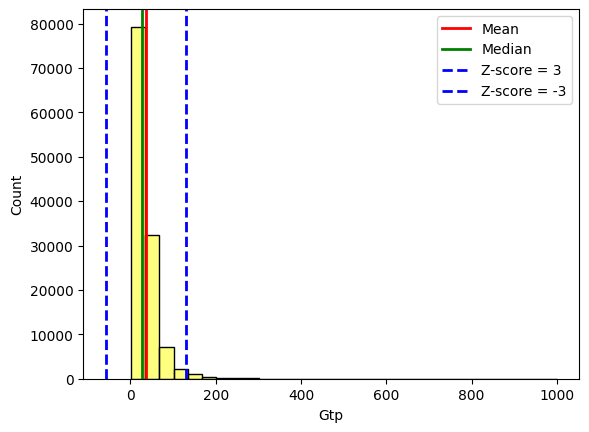

In [46]:
#histogram of Gtp feature without the target
sns.histplot(train_df['Gtp'], bins=30, alpha=0.5, color="yellow")
plt.xlabel('Gtp')
plt.ylabel('Count')
plt.axvline(gtp_mean, c='red', ls='-', lw=2)
plt.axvline(gtp_median, c='green', ls='-', lw=2)
plt.axvline(gtp_z_score_pos3, c='blue', ls='--', lw=2)
plt.axvline(gtp_z_score_neg3, c='blue', ls='--', lw=2)

plt.legend(labels=['Mean', 'Median', "Z-score = 3", "Z-score = -3"])
plt.show()

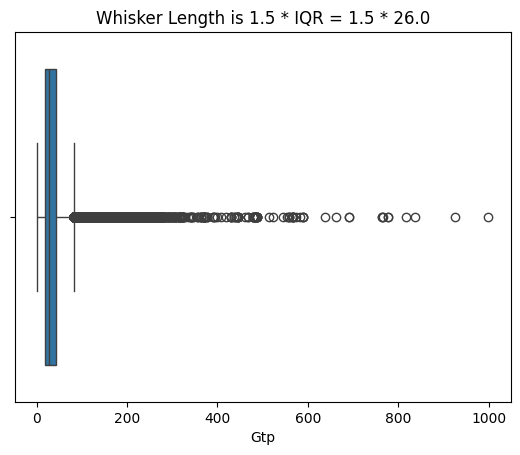

In [47]:
#boxplot of Gtp feature without the target
sns.boxplot(x=train_df['Gtp'])
plt.xlabel('Gtp')
plt.title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(gtp_iqr, 3)}")
plt.show()


Descriptive Statistics for Gtp:  
+--------------------+---------+
| Statistic          |   Value |
+====================+=========+
| Mean               |   34.27 |
+--------------------+---------+
| Standard Deviation |   22.96 |
+--------------------+---------+
| Median             |   27    |
+--------------------+---------+
| Standard Deviation |   22.96 |
+--------------------+---------+
| Skewness           |    1.79 |
+--------------------+---------+
| Kurtosis           |    3.83 |
+--------------------+---------+


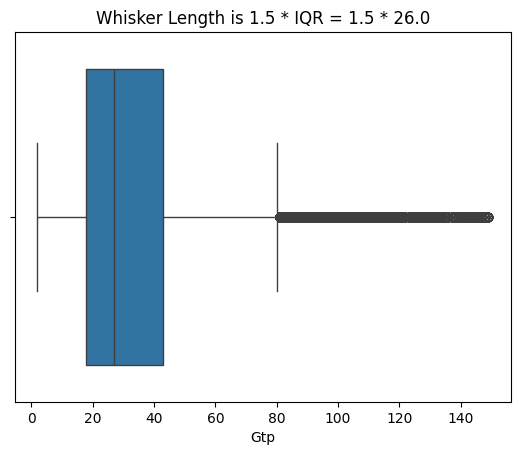

In [48]:
#removing outliers in the Gtp feature
gtp_feature = train_df[train_df['Gtp'] < 150]['Gtp']

# Central Tendency Measures
table_data=[
    ["Mean", round(gtp_feature.mean(), 2)],
    ["Standard Deviation", round(gtp_feature.std(), 2)],
    ["Median", round(gtp_feature.median(), 2)],
    ["Standard Deviation", round(gtp_feature.std(), 2)],
    ["Skewness", round(gtp_feature.skew(), 2)],
    ["Kurtosis", round(gtp_feature.kurtosis(), 2)]
]

print("Descriptive Statistics for Gtp:  ")
print(tabulate(table_data, headers=["Statistic", "Value"], tablefmt="grid"))

#boxplot of Gtp feature without the target
sns.boxplot(x=gtp_feature)
plt.xlabel('Gtp')
plt.title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(gtp_iqr, 3)}")
plt.show()

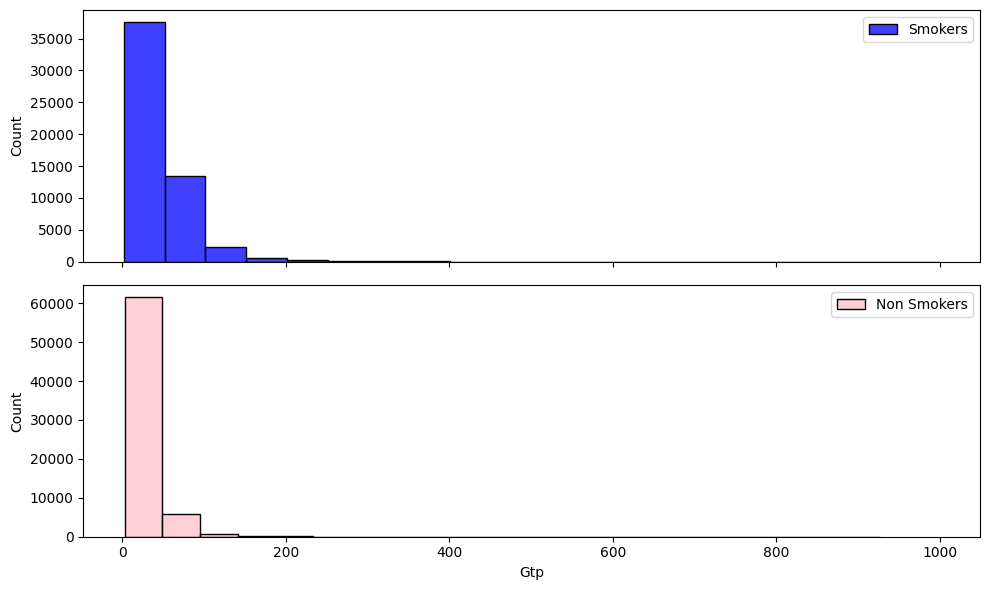

Analysis of Serum Creatinine with repect to Non Smokers:
Mean: 0.85
Standard Deviation: 0.19
Mean: 0.85
Standard Deviation: 0.19
Skewness: 1.55
Kurtosis: 36.4


Analysis of Serum Creatinine with repect to Smokers:
Mean: 0.95
Standard Deviation: 0.15
Mean: 0.95
Standard Deviation: 0.15
Skewness: 0.19
Kurtosis: 1.6


In [49]:
#histogram of Gtp feature with the target
gtp_smokers = train_df[train_df['smoking'] == 1]['Gtp']
gtp_nonsmokers = train_df[train_df['smoking'] == 0]['Gtp']

# Creating subplots for Gtp feature
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
sns.histplot(data=gtp_smokers, color='blue', bins=20, label='Smokers', ax=ax1)
ax1.legend()

sns.histplot(data=gtp_nonsmokers, color='pink', bins=20, label='Non Smokers', ax=ax2)
ax2.legend()

plt.tight_layout()
plt.show()

# Descriptive statistics of the serum creatinine feature

print("Analysis of Serum Creatinine with repect to Non Smokers:")
print("Mean:", round(serum_creatinine_nonsmokers.mean(), 2))
print("Standard Deviation:", round(serum_creatinine_nonsmokers.std(), 2))
print("Mean:", round(serum_creatinine_nonsmokers.mean(), 2))
print("Standard Deviation:", round(serum_creatinine_nonsmokers.std(), 2))
print("Skewness:", round(serum_creatinine_nonsmokers.skew(), 2))
print("Kurtosis:", round(serum_creatinine_nonsmokers.kurtosis(), 2))

print("\n")

print("Analysis of Serum Creatinine with repect to Smokers:")
print("Mean:", round(serum_creatinine_smokers.mean(), 2))
print("Standard Deviation:", round(serum_creatinine_smokers.std(), 2))
print("Mean:", round(serum_creatinine_smokers.mean(), 2))
print("Standard Deviation:", round(serum_creatinine_smokers.std(), 2))
print("Skewness:", round(serum_creatinine_smokers.skew(), 2))
print("Kurtosis:", round(serum_creatinine_smokers.kurtosis(), 2))


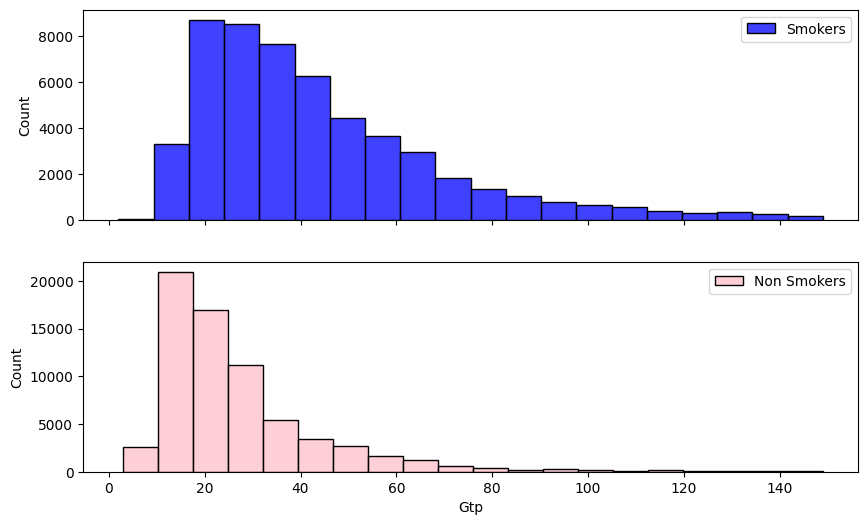

Analysis of Gtp with respect to Smokers:
+--------------------+---------+
| Statistic          |   Value |
+====================+=========+
| Mean               |   43.66 |
+--------------------+---------+
| Standard Deviation |   25.33 |
+--------------------+---------+
| Median             |   37    |
+--------------------+---------+
| Standard Deviation |   25.33 |
+--------------------+---------+
| Skewness           |    1.42 |
+--------------------+---------+
| Kurtosis           |    2.12 |
+--------------------+---------+


Analysis of Gtp with respect to nonsmokers:
+--------------------+---------+
| Statistic          |   Value |
+====================+=========+
| Mean               |   26.96 |
+--------------------+---------+
| Standard Deviation |   17.79 |
+--------------------+---------+
| Median             |   21    |
+--------------------+---------+
| Standard Deviation |   17.79 |
+--------------------+---------+
| Skewness           |    2.36 |
+--------------------+

In [50]:
#Analyzing with respect to target variable after removing outliers
Gtp_df = train_df[train_df['Gtp'] < 150]
Gtp_smokers = Gtp_df[Gtp_df['smoking'] == 1]['Gtp']
Gtp_nonsmokers = Gtp_df[Gtp_df['smoking'] == 0]['Gtp']


# Creating subplots for Gtp feature
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
sns.histplot(data=Gtp_smokers, color='blue', bins=20, label='Smokers', ax=ax1)
ax1.legend()

sns.histplot(data=Gtp_nonsmokers, color='pink', bins=20, label='Non Smokers', ax=ax2)
ax2.legend()

plt.tight_layout
plt.show()

# Descriptive statistics of the Gtp feature
print("Analysis of Gtp with respect to Smokers:")
table_data = [
    ["Mean", round(Gtp_smokers.mean(), 2)],
    ["Standard Deviation", round(Gtp_smokers.std(), 2)],
    ["Median", round(Gtp_smokers.median(), 2)],
    ["Standard Deviation", round(Gtp_smokers.std(), 2)],
    ["Skewness", round(Gtp_smokers.skew(), 2)],
    ["Kurtosis", round(Gtp_smokers.kurtosis(), 2)]

]
print(tabulate(table_data, headers=["Statistic", "Value"], tablefmt="grid"))

print("\n")

print("Analysis of Gtp with respect to nonsmokers:")
table_data=[
    ["Mean", round(Gtp_nonsmokers.mean(), 2)],
    ["Standard Deviation", round(Gtp_nonsmokers.std(), 2)],
    ["Median", round(Gtp_nonsmokers.median(), 2)],
    ["Standard Deviation", round(Gtp_nonsmokers.std(), 2)],
    ["Skewness", round(Gtp_nonsmokers.skew(), 2)],
    ["Kurtosis", round(Gtp_nonsmokers.kurtosis(), 2)]
]
print(tabulate(table_data, headers=["Statistic", "Value"], tablefmt="grid"))

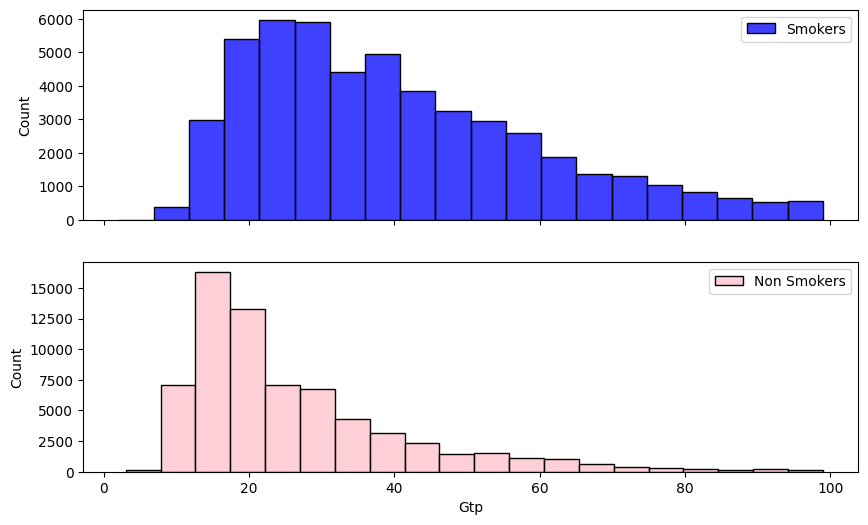

Analysis of Gtp with respect to Smokers:
+--------------------+---------+
| Statistic          |   Value |
+====================+=========+
| Mean               |   40.13 |
+--------------------+---------+
| Standard Deviation |   19.64 |
+--------------------+---------+
| Median             |   36    |
+--------------------+---------+
| Standard Deviation |   19.64 |
+--------------------+---------+
| Skewness           |    0.84 |
+--------------------+---------+
| Kurtosis           |    0.12 |
+--------------------+---------+


Analysis of Gtp with respect to nonsmokers:
+--------------------+---------+
| Statistic          |   Value |
+====================+=========+
| Mean               |   26.06 |
+--------------------+---------+
| Standard Deviation |   15.36 |
+--------------------+---------+
| Median             |   21    |
+--------------------+---------+
| Standard Deviation |   15.36 |
+--------------------+---------+
| Skewness           |    1.71 |
+--------------------+

In [51]:
#Examining another case of dropping outliers
Gtp_df_drop_outlier = train_df[train_df['Gtp'] < 100]
Gtp_smokers = Gtp_df_drop_outlier[Gtp_df_drop_outlier['smoking'] == 1]['Gtp']
Gtp_nonsmokers = Gtp_df_drop_outlier[Gtp_df_drop_outlier['smoking'] == 0]['Gtp']


# Creating subplots for Gtp feature
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
sns.histplot(data=Gtp_smokers, color='blue', bins=20, label='Smokers', ax=ax1)
ax1.legend()

sns.histplot(data=Gtp_nonsmokers, color='pink', bins=20, label='Non Smokers', ax=ax2)
ax2.legend()

plt.tight_layout
plt.show()

# Descriptive statistics of the Gtp feature
print("Analysis of Gtp with respect to Smokers:")
table_data = [
    ["Mean", round(Gtp_smokers.mean(), 2)],
    ["Standard Deviation", round(Gtp_smokers.std(), 2)],
    ["Median", round(Gtp_smokers.median(), 2)],
    ["Standard Deviation", round(Gtp_smokers.std(), 2)],
    ["Skewness", round(Gtp_smokers.skew(), 2)],
    ["Kurtosis", round(Gtp_smokers.kurtosis(), 2)]

]
print(tabulate(table_data, headers=["Statistic", "Value"], tablefmt="grid"))

print("\n")

print("Analysis of Gtp with respect to nonsmokers:")
table_data=[
    ["Mean", round(Gtp_nonsmokers.mean(), 2)],
    ["Standard Deviation", round(Gtp_nonsmokers.std(), 2)],
    ["Median", round(Gtp_nonsmokers.median(), 2)],
    ["Standard Deviation", round(Gtp_nonsmokers.std(), 2)],
    ["Skewness", round(Gtp_nonsmokers.skew(), 2)],
    ["Kurtosis", round(Gtp_nonsmokers.kurtosis(), 2)]
]
print(tabulate(table_data, headers=["Statistic", "Value"], tablefmt="grid"))

### **Handling Outlier**

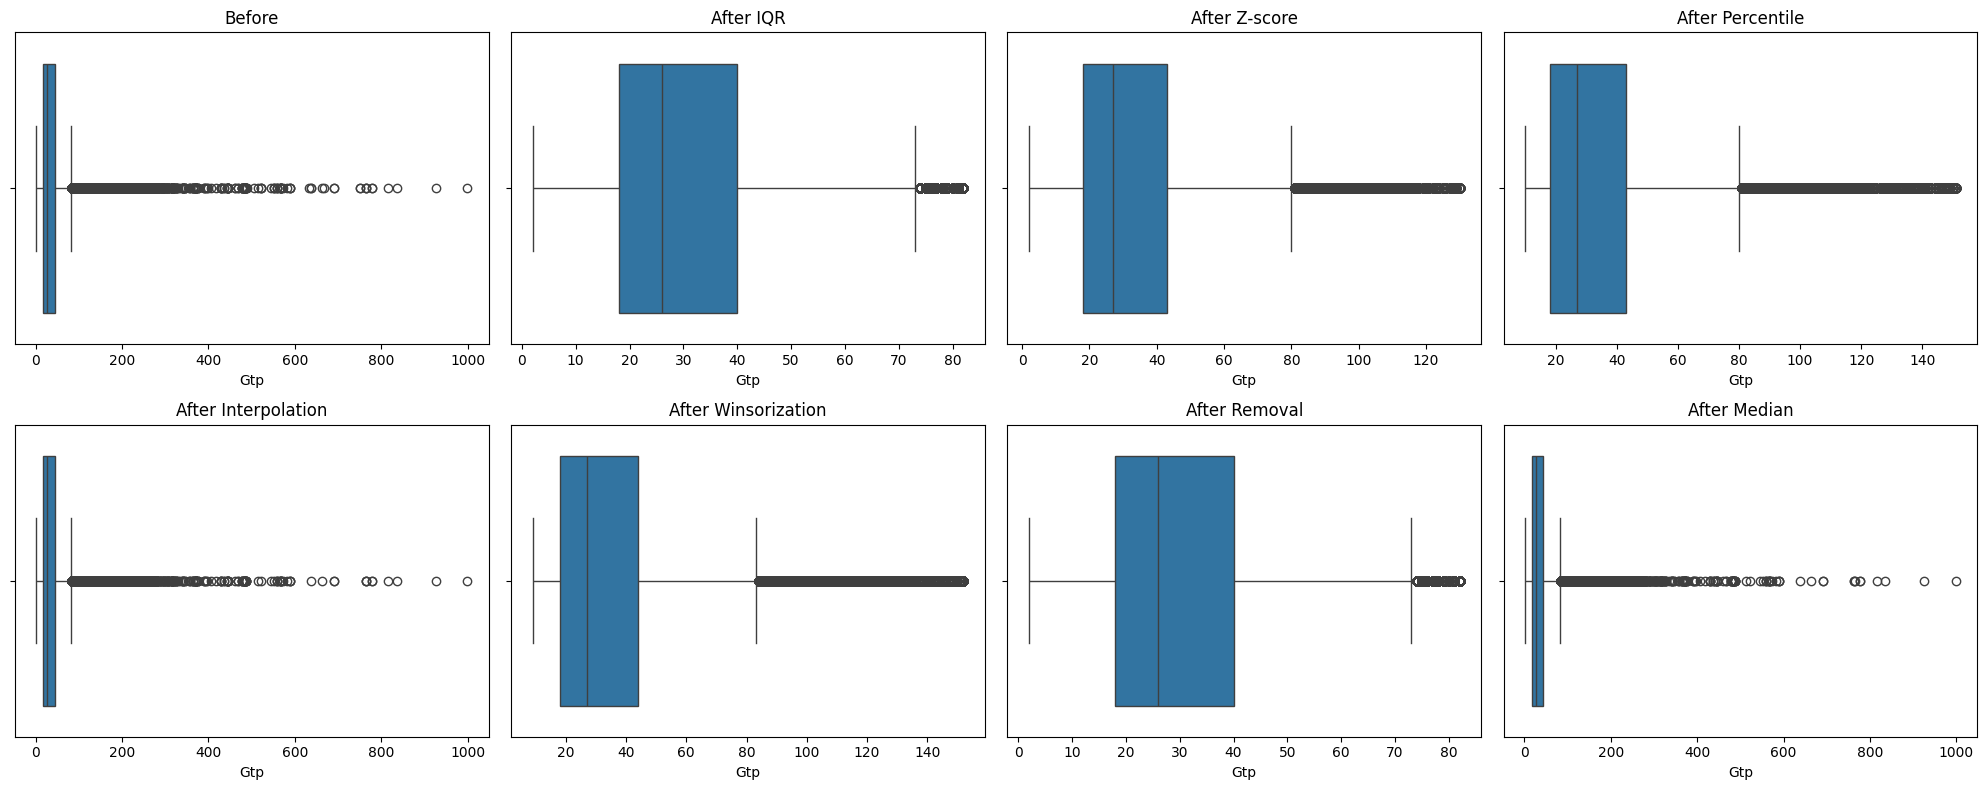

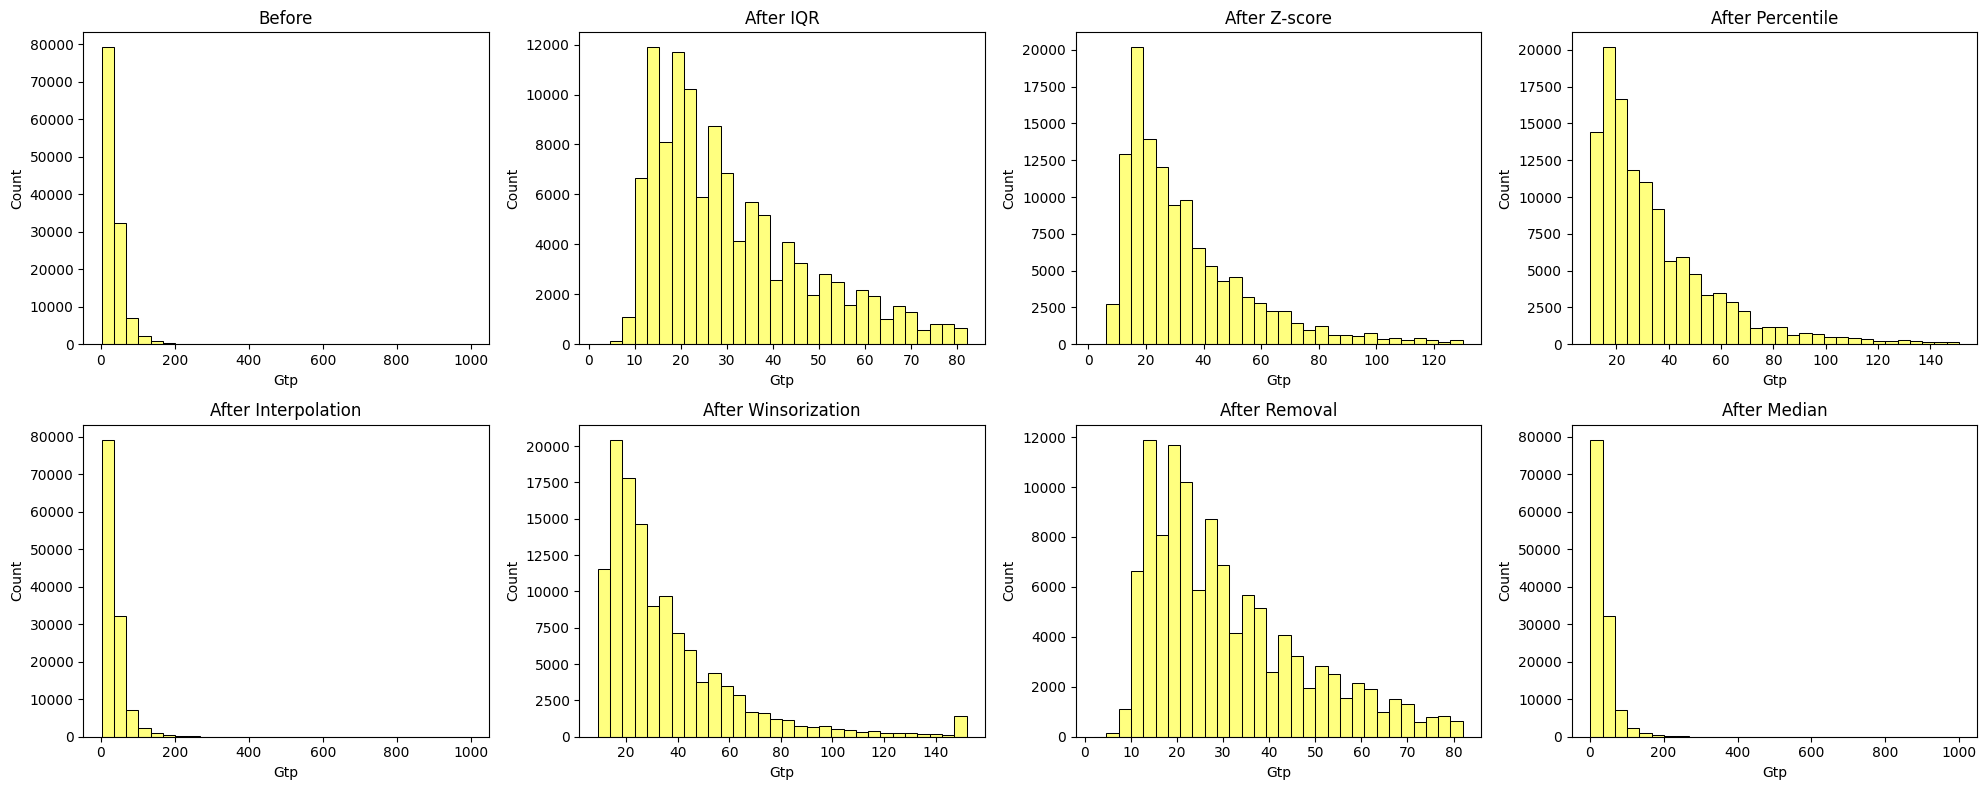

In [52]:
handled_Gtp_outliers=handle_outliers("Gtp")
plot_handled_outliers(handled_Gtp_outliers, "Gtp")

# **Bivariate Data Analysis**

<h3>Correlation Matrix</h3>

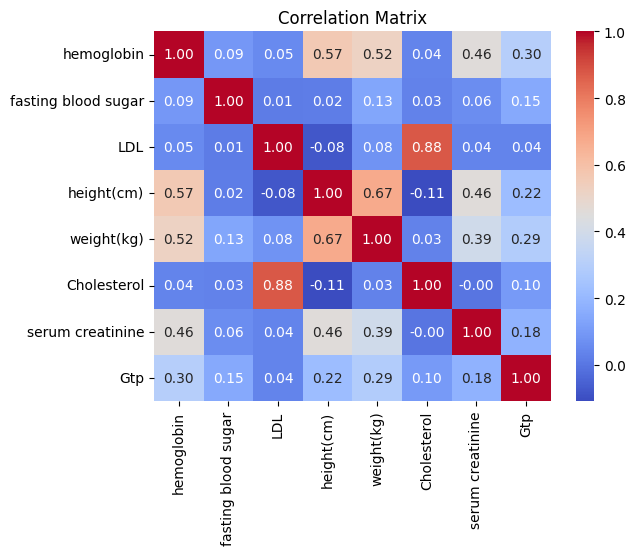

In [53]:
continuous_features = train_df.drop(columns = ['Unnamed: 0', 'hearing(right)', 'dental caries', 'smoking'])

# Visualize the correlation matrix using Seaborn's heatmap
sns.heatmap(continuous_features.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

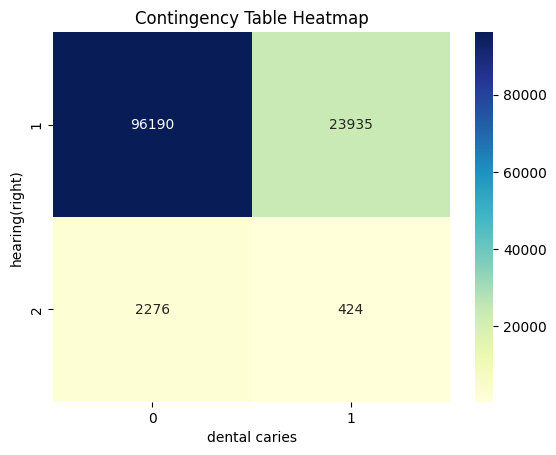

In [54]:
contingency_table = pd.crosstab(train_df['hearing(right)'], train_df['dental caries'])

sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Contingency Table Heatmap')
plt.show()

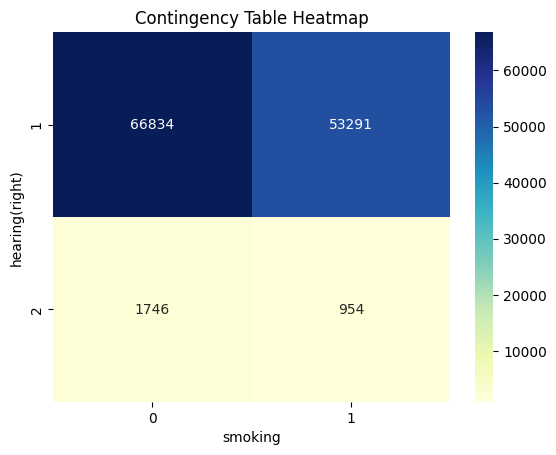

In [55]:
contingency_table = pd.crosstab(train_df['hearing(right)'], train_df['smoking'])

sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Contingency Table Heatmap')
plt.show()

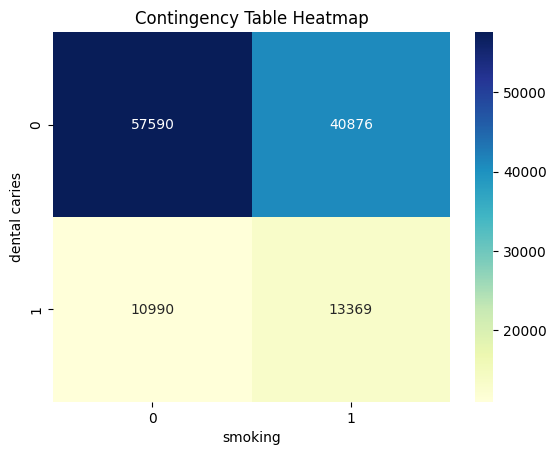

In [56]:
contingency_table = pd.crosstab(train_df['dental caries'], train_df['smoking'])

sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Contingency Table Heatmap')
plt.show()

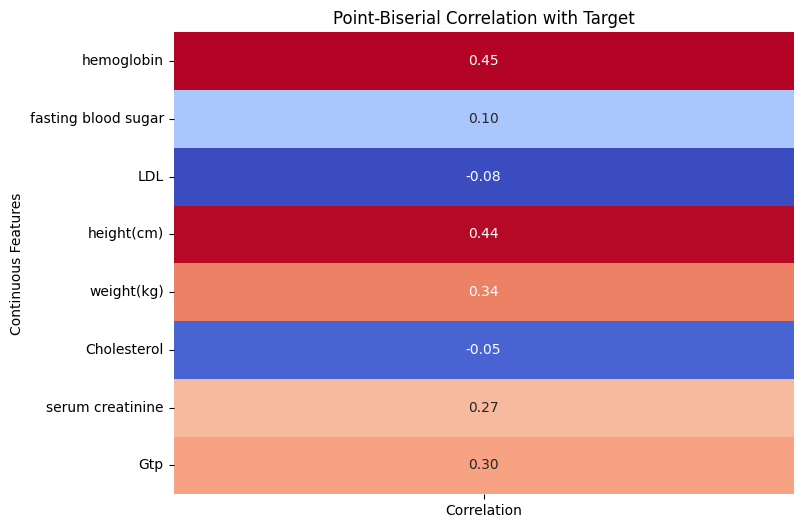

In [57]:
import scipy.stats as stats

continuous_features = ['hemoglobin','fasting blood sugar','LDL','height(cm)','weight(kg)','Cholesterol','serum creatinine','Gtp']  # Add more features as needed
target_variable = 'smoking'  

correlation_values = []

for feature in continuous_features:
    corr, p_value = stats.pointbiserialr(train_df[target_variable], train_df[feature])
    correlation_values.append(corr)

# Create a DataFrame with correlation values
correlation_df = pd.DataFrame(data=correlation_values, index=continuous_features, columns=['Correlation'])

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title('Point-Biserial Correlation with Target')
plt.ylabel('Continuous Features')
plt.show()

<h3>LDL and Cholestrol:</h3>

There is a very high correlation between LDL and Cholestrol.
This makes sense because total cholestrol equals LDL + HDL.
Out of 150,000+ samples, there are 24 with LDL > Cholestrol, which is impossible.
This means that the dataset contains some incorrect readings for LDL and/or Cholestrol levels.

In [58]:
df_chol_LDL = train_df[train_df["LDL"] >= train_df["Cholesterol"]][["Cholesterol", "LDL"]]
print("Lenght Equals: ", len(df_chol_LDL))
print(df_chol_LDL)

Lenght Equals:  6
        Cholesterol  LDL
60339           121  121
141717          140  165
138443          154  168
3004             91  156
52900           130  149
92036           119  119


<h3>Categorical Plots:</h3>

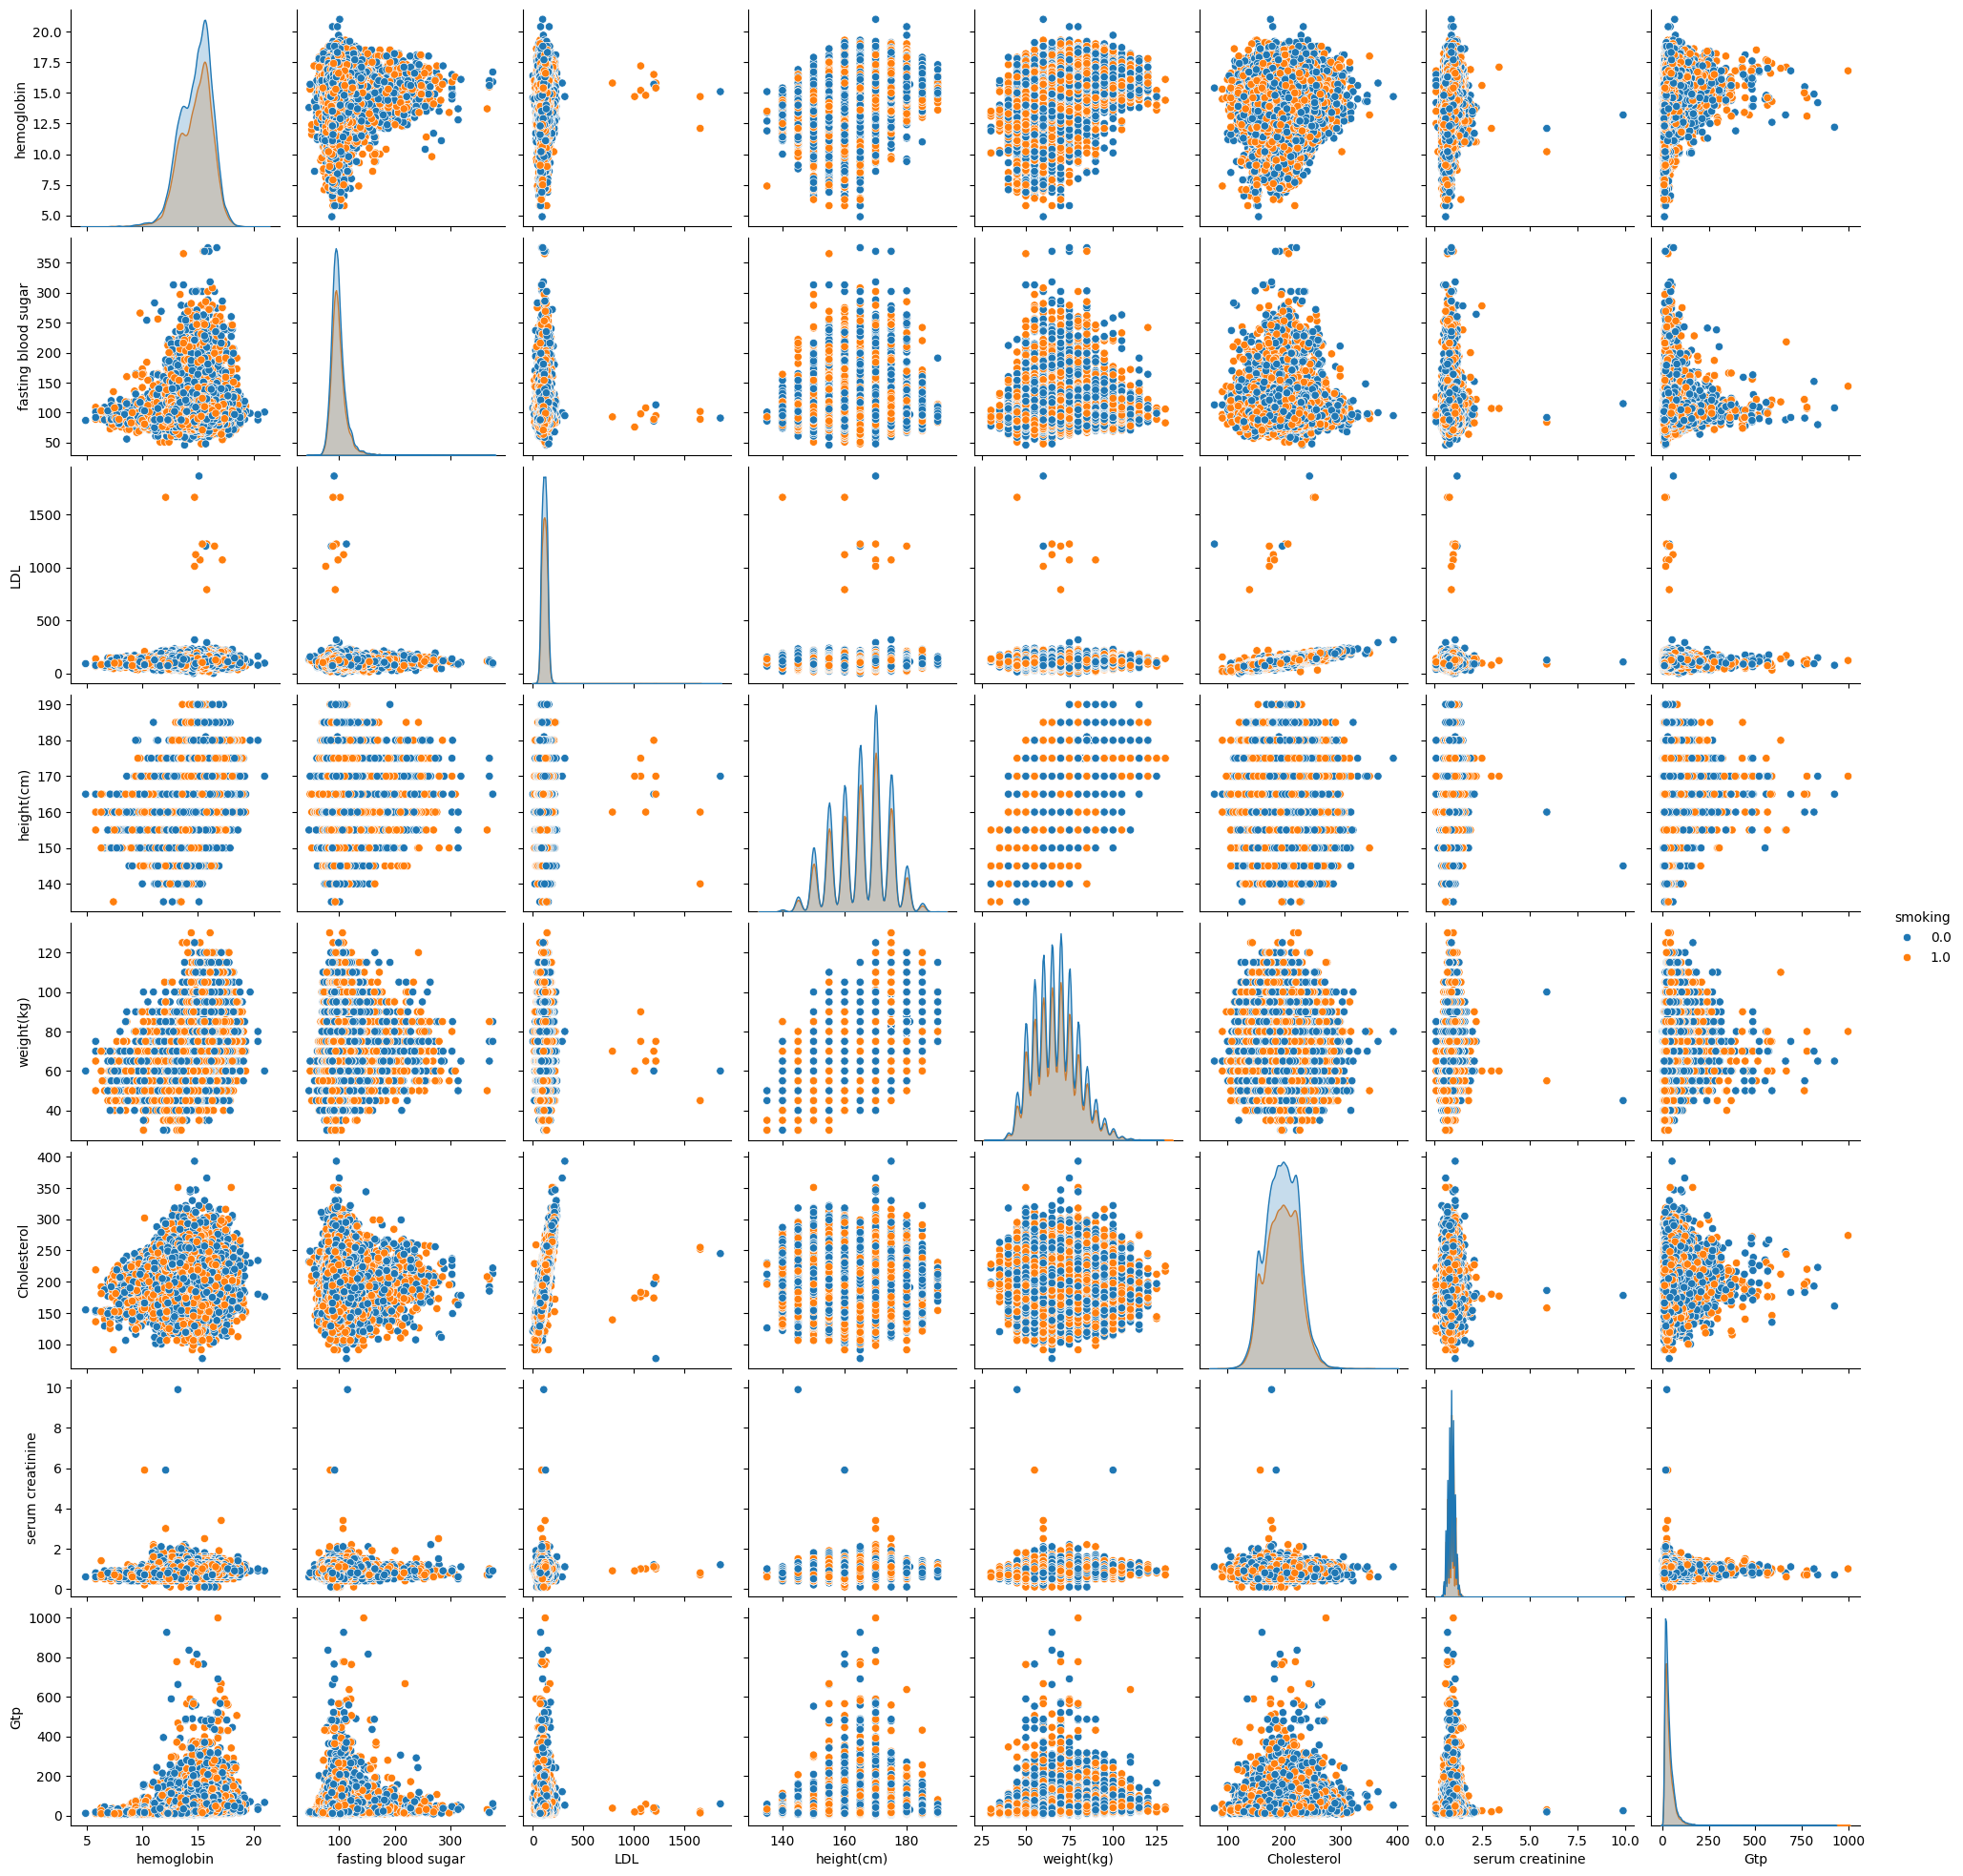

In [59]:
continuous_df = df[continuous_features]
sns.pairplot(pd.concat([continuous_df.reset_index(drop=True), train_df[["smoking"]].reset_index(drop=True)], axis=1), hue='smoking')
plt.show()

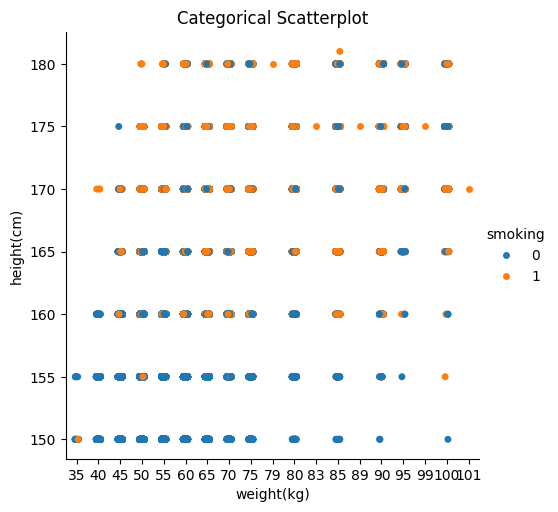

In [60]:
sns.catplot(x='weight(kg)', y='height(cm)', hue='smoking', data=train_df)
plt.title('Categorical Scatterplot')
plt.show()

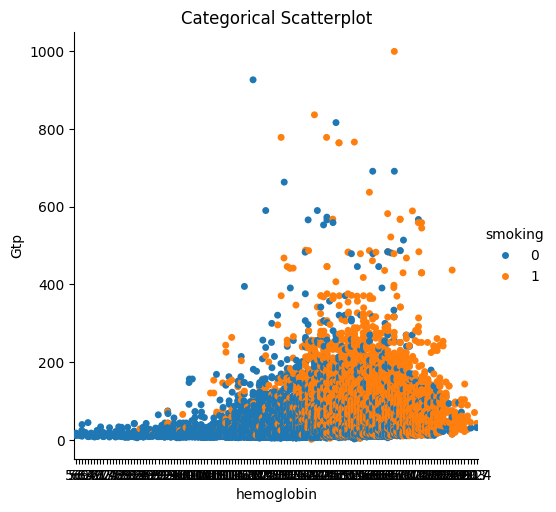

In [61]:
sns.catplot(x='hemoglobin', y='Gtp', hue='smoking', data=train_df)
plt.title('Categorical Scatterplot')
plt.show()

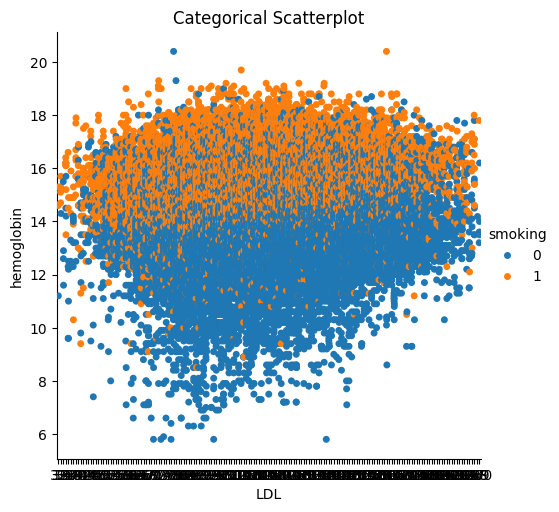

In [62]:
sns.catplot(x='LDL', y='hemoglobin', hue='smoking', data=train_df)
plt.title('Categorical Scatterplot')
plt.show()

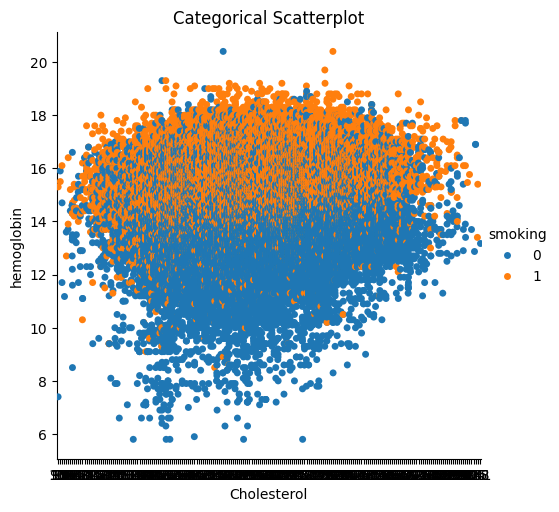

In [63]:
sns.catplot(x='Cholesterol', y='hemoglobin', hue='smoking', data=train_df)
plt.title('Categorical Scatterplot')
plt.show()

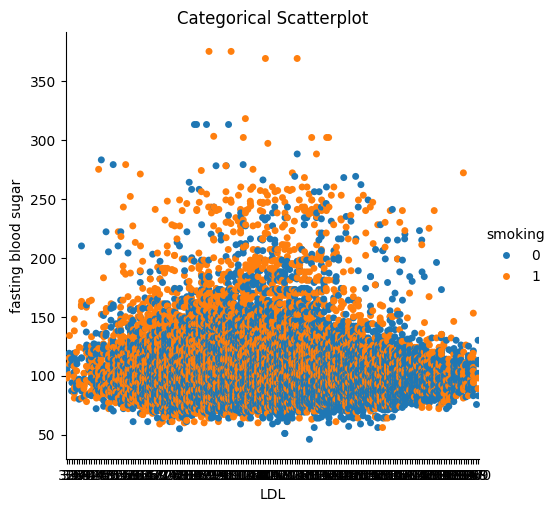

In [64]:
sns.catplot(x='LDL', y='fasting blood sugar', hue='smoking', data=train_df)
plt.title('Categorical Scatterplot')
plt.show()

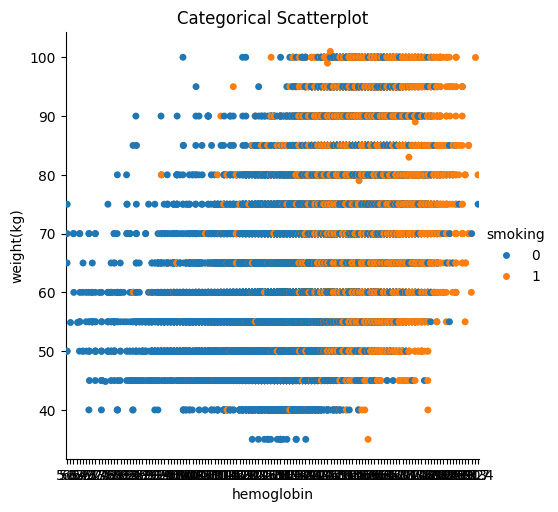

In [65]:
sns.catplot(x='hemoglobin', y='weight(kg)', hue='smoking', data=train_df)
plt.title('Categorical Scatterplot')
plt.show()

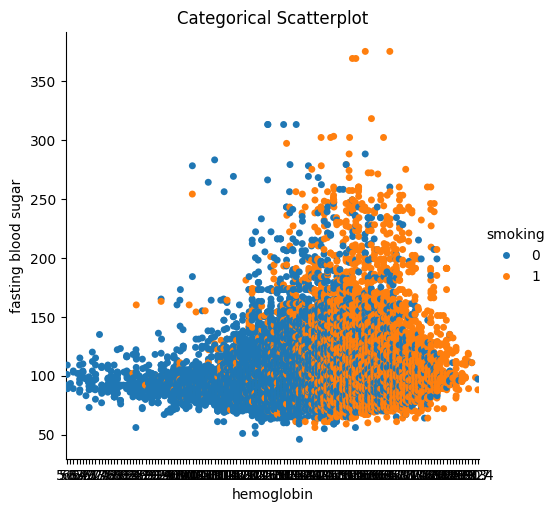

In [66]:
sns.catplot(x='hemoglobin', y='fasting blood sugar', hue='smoking', data=train_df)
plt.title('Categorical Scatterplot')
plt.show()

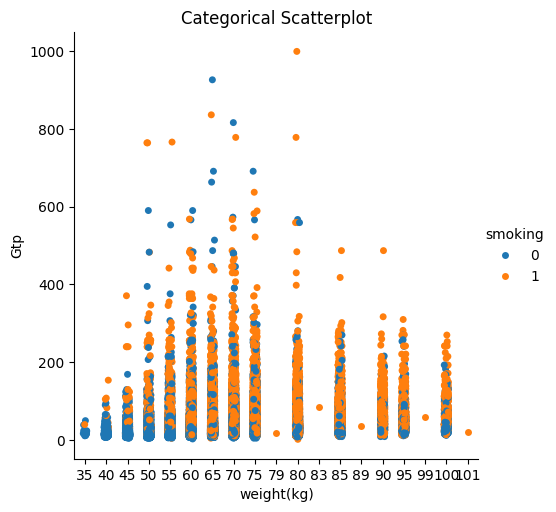

In [67]:
sns.catplot(x='weight(kg)', y='Gtp', hue='smoking', data=train_df)
plt.title('Categorical Scatterplot')
plt.show()

<h3>Logistic Analysis </h3>

<Axes: >

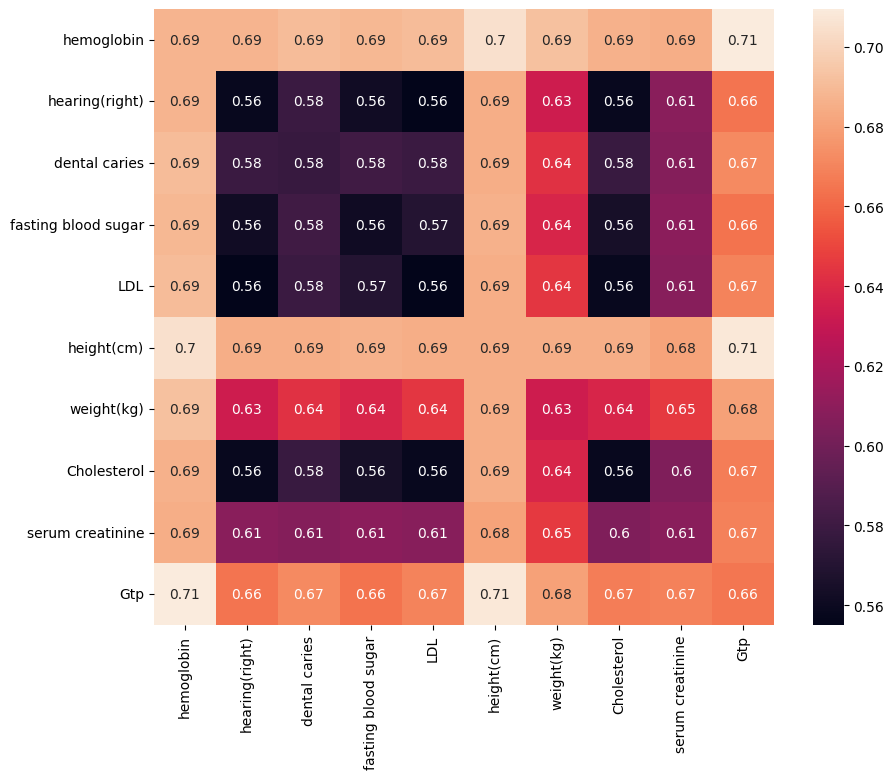

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np


logistic_df = train_df.copy()

#Preprocessing
logistic_df['hemoglobin'] = (logistic_df['hemoglobin'] - logistic_df['hemoglobin'].mean()) / logistic_df['hemoglobin'].std()
logistic_df['hearing(right)'] = logistic_df['hearing(right)'] - 1
logistic_df['fasting blood sugar'] = (logistic_df['fasting blood sugar'] - logistic_df['fasting blood sugar'].mean()) / logistic_df['fasting blood sugar'].std()
logistic_df['LDL'] = (logistic_df['LDL'] - logistic_df['LDL'].mean()) / logistic_df['LDL'].std()
logistic_df['height(cm)'] = (logistic_df['height(cm)'] - logistic_df['height(cm)'].mean()) / logistic_df['height(cm)'].std()
logistic_df['weight(kg)'] = (logistic_df['weight(kg)'] - logistic_df['weight(kg)'].mean()) / logistic_df['weight(kg)'].std()
logistic_df['Cholesterol'] = (logistic_df['Cholesterol'] - logistic_df['Cholesterol'].mean()) / logistic_df['Cholesterol'].std()
logistic_df['serum creatinine'] = (logistic_df['serum creatinine'] - logistic_df['serum creatinine'].mean()) / logistic_df['serum creatinine'].std()
logistic_df['Gtp'] = (logistic_df['Gtp'] - logistic_df['Gtp'].mean()) / logistic_df['Gtp'].std()

 

#Performing Logistic Regression On every pair

features = ['hemoglobin','hearing(right)','dental caries','fasting blood sugar','LDL','height(cm)','weight(kg)','Cholesterol','serum creatinine','Gtp']
matrix = np.zeros((len(features), len(features)))

for i in range(0,len(features)):
    for j in range(0, len(features)):
        if j >= i:
            logreg = LogisticRegression()
            logreg.fit(logistic_df[[features[i], features[j]]], logistic_df["smoking"])
            matrix[i][j] = accuracy_score(logistic_df["smoking"], logreg.predict(logistic_df[[features[i], features[j]]]))
        else:
            matrix[i][j] = matrix[j][i]


plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, xticklabels=features, yticklabels=features)


# **Feature Scaling**

In [69]:
#function for applying all transformations on the features
def transform_features(feature_name):
    feature = train_df[feature_name].to_numpy()
    #print(type(feature))
    #print(feature)

    # original data
    sns.histplot(feature, bins=30, alpha=0.5, color="red")
    plt.xlabel('Original Data')
    plt.ylabel('Frequency')
    plt.axvline(feature.mean(), c='red', ls='-', lw=2)
    plt.legend(labels=['Mean'])
    plt.title('Histogram of Original Data')
    plt.show()

    fig, axes = plt.subplots(2, 2, figsize=(20, 8))
    # square root transformation of the feature
    sqaure_root_transformed_data = np.sqrt(feature)
    #print(sqaure_root_transformed_data)

    sns.histplot(sqaure_root_transformed_data, bins=30, alpha=0.5, color="yellow",ax=axes[0,0])
    axes[0,0].set_xlabel('Transformed Data')
    axes[0,0].set_ylabel('Frequency')
    axes[0,0].axvline(sqaure_root_transformed_data.mean(), c='red', ls='-', lw=2)
    axes[0,0].legend(labels=['Mean'])
    axes[0,0].set_title('Histogram of Square Root Transformed Data')

    # log transformation of the feature  
    trf = FunctionTransformer(np.log1p)
    log_transformed_data = trf.fit_transform(train_df[feature_name].to_numpy())
    #print(log_transformed_data)

    sns.histplot(log_transformed_data, bins=30, alpha=0.5, color="pink",ax=axes[1,0])
    axes[1,0].set_xlabel('Transformed Data')
    axes[1,0].set_ylabel('Frequency')
    axes[1,0].axvline(log_transformed_data.mean(), c='red', ls='-', lw=2)
    axes[1,0].legend(labels=['Mean'])
    axes[1,0].set_title('Histogram of Log Transformed Data')

    # Box-Cox transformation of the feature
    pt = PowerTransformer(method='box-cox')
    box_cox_transformed_data = pt.fit_transform(train_df[feature_name].to_numpy().reshape(-1, 1))
    print(box_cox_transformed_data)

    sns.histplot(box_cox_transformed_data, bins=30, alpha=0.5, color="green",ax=axes[0,1])
    axes[0,1].set_xlabel('Transformed Data')
    axes[0,1].set_ylabel('Frequency')
    axes[0,1].axvline(box_cox_transformed_data.mean(), c='red', ls='-', lw=2)
    axes[0,1].legend(labels=['Mean'])
    axes[0,1].set_title('Histogram of the Box Cox Transformed Data')

    #Yeo-Johnson transformation of the feature
    yt = PowerTransformer(method='yeo-johnson') #variation of box-cox but can handle negative values
    yeo_johnson_transformed_data = yt.fit_transform(train_df[feature_name].to_numpy().reshape(-1, 1))
    #print(yeo_johnson_transformed_data)

    sns.histplot(yeo_johnson_transformed_data, bins=30, alpha=0.5, color="blue", ax=axes[1,1])
    axes[1,1].set_xlabel('Transformed Data')
    axes[1,1].set_ylabel('Frequency')
    axes[1,1].axvline(yeo_johnson_transformed_data.mean(), c='red', ls='-', lw=2)
    axes[1,1].legend(labels=['Mean'])
    axes[1,1].set_title('Histogram of Yeo-Johnson Transformed Data')

    plt.tight_layout()
    plt.show()

    return sqaure_root_transformed_data, log_transformed_data, box_cox_transformed_data, yeo_johnson_transformed_data

    

### feature 1: Hemoglobin

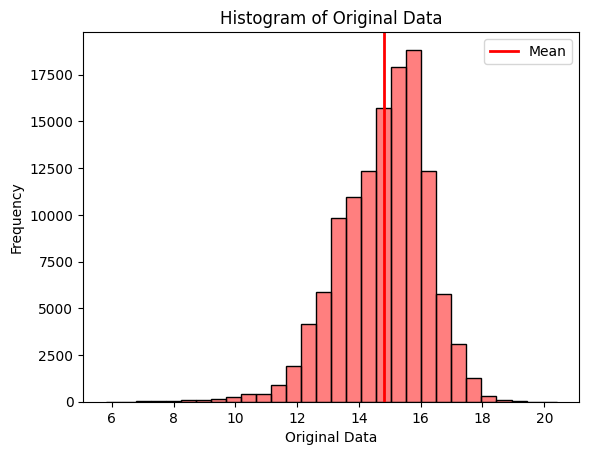

[[-1.88068244]
 [ 1.1029835 ]
 [-1.03054076]
 ...
 [ 0.7589435 ]
 [-0.78379789]
 [ 0.04505536]]


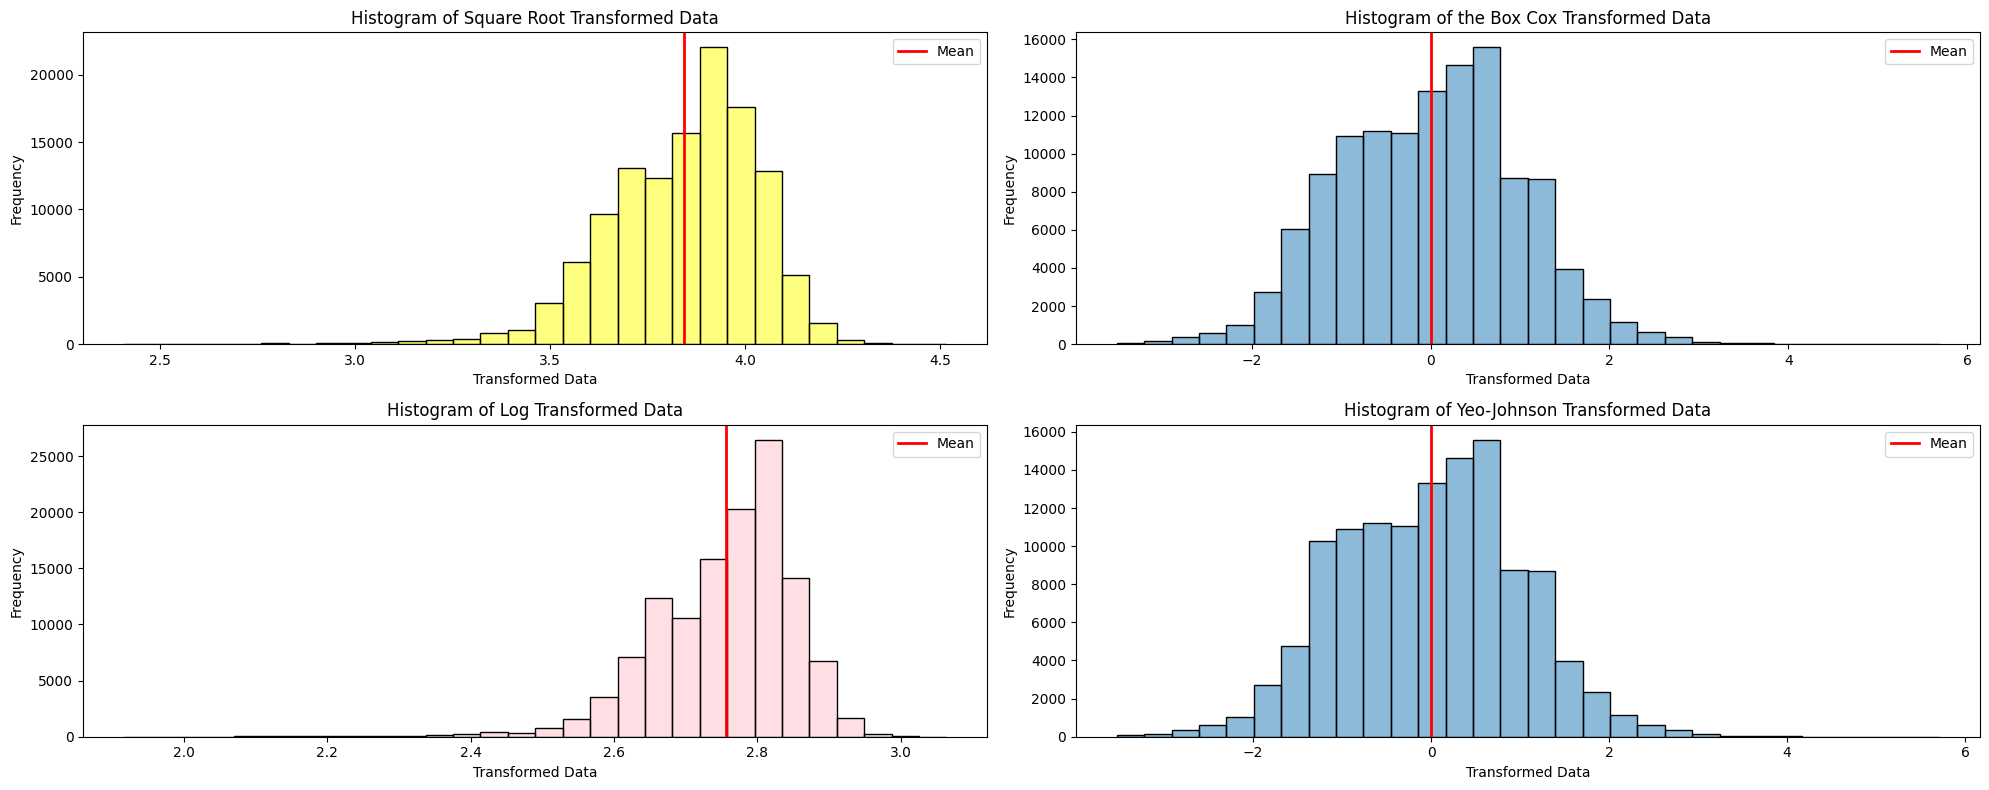

StandardScaler()
[[-1.88068244]
 [ 1.1029835 ]
 [-1.03054076]
 ...
 [ 0.7589435 ]
 [-0.78379789]
 [ 0.04505536]]


In [70]:
#get and visualize the distributions done by different transformations
sqaure_root_transformed_data, log_transformed_data, box_cox_transformed_data, yeo_johnson_transformed_data = transform_features('hemoglobin')

#scaling the data using standard scaler
scaler = StandardScaler()
print(scaler.fit(box_cox_transformed_data))
scaled_hemoglobin = scaler.transform(box_cox_transformed_data)
print(scaled_hemoglobin)



### feature 2: Hearing

In [71]:
#decreasing the feature column by 1 so it is in the range of 0-1
print(train_df['hearing(right)'].unique())
scaled_hearing = train_df['hearing(right)'] - 1
print(scaled_hearing.unique())

[1 2]
[0 1]


### feature 4: Fasting Blood Sugar

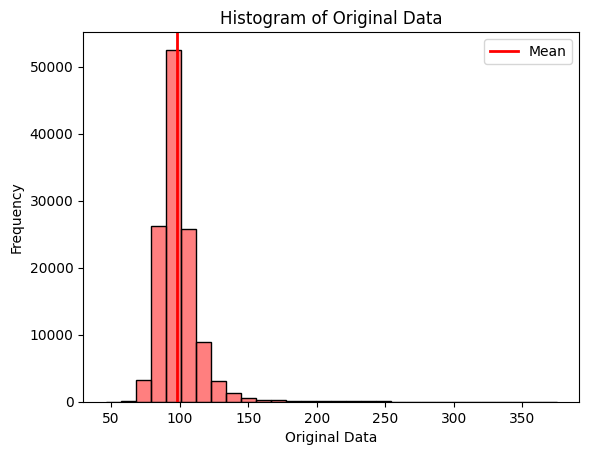

[[ 0.48600922]
 [ 3.66915458]
 [-0.65899872]
 ...
 [ 0.01241165]
 [-0.76754055]
 [-0.87966255]]


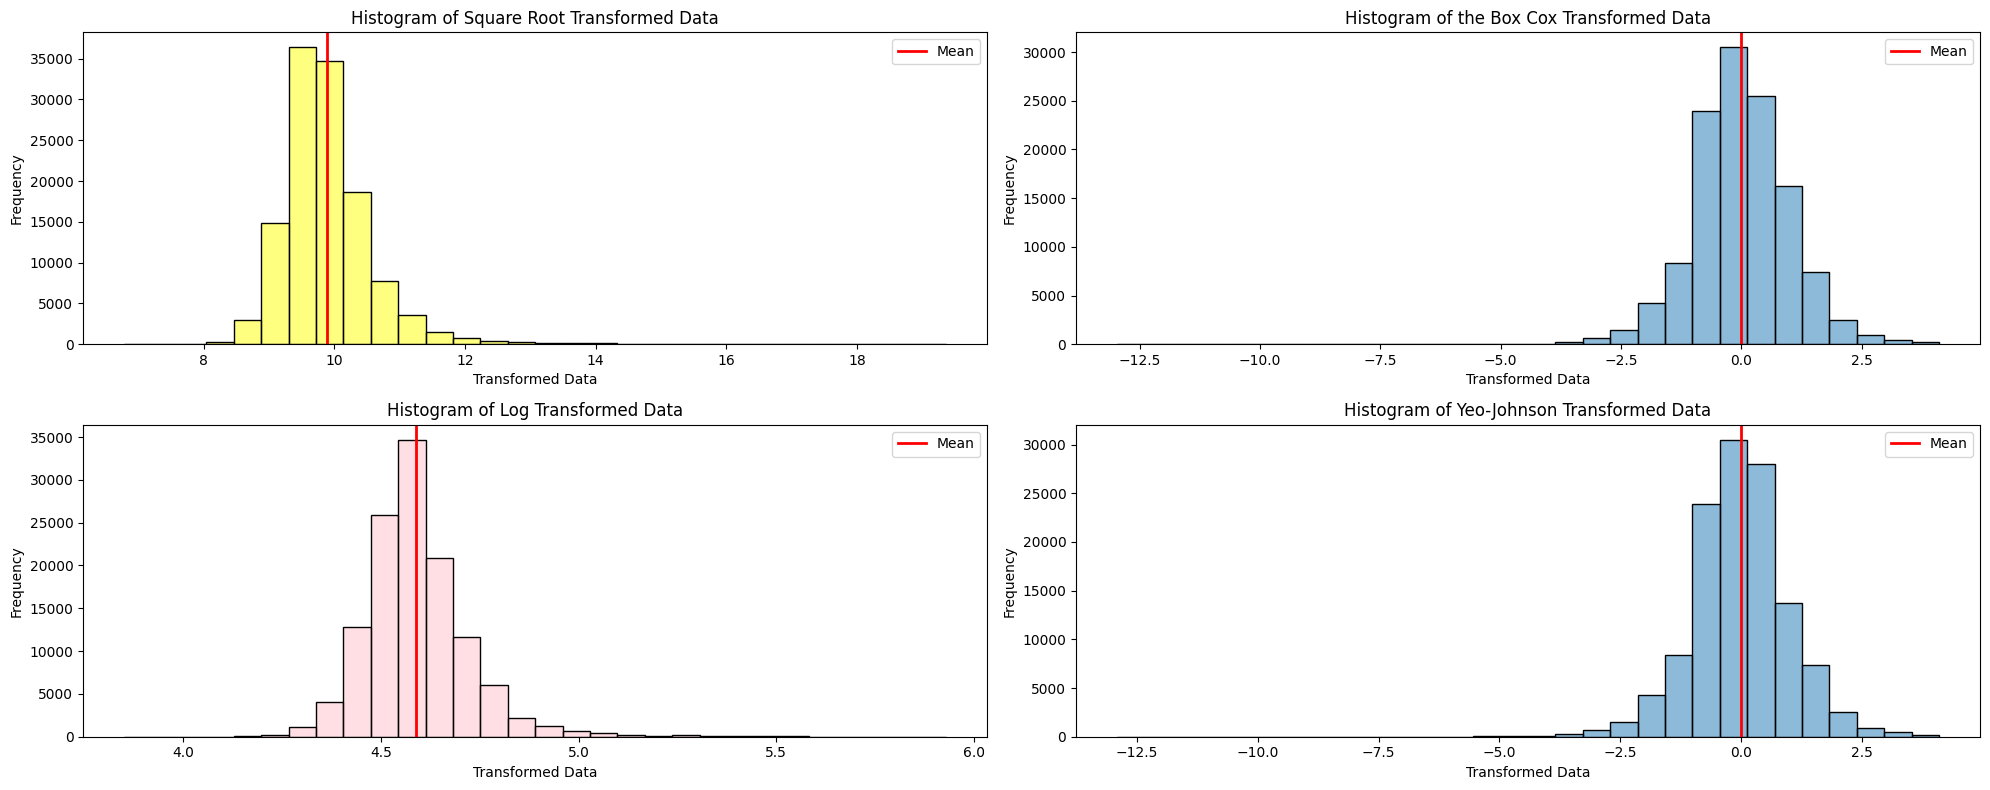

StandardScaler()
[[ 0.48600922]
 [ 3.66915458]
 [-0.65899872]
 ...
 [ 0.01241165]
 [-0.76754055]
 [-0.87966255]]


In [72]:
#get and visualize the distributions done by different transformations
sqaure_root_transformed_data, log_transformed_data, box_cox_transformed_data, yeo_johnson_transformed_data = transform_features('fasting blood sugar')

#scaling the data using standard scaler
scaler = StandardScaler()
print(scaler.fit(box_cox_transformed_data))
scaled_fasting_blood_sugar = scaler.transform(box_cox_transformed_data)
print(scaled_fasting_blood_sugar)



### feature 5: LDL

The original data is a gaussian distribution so no need for transformations to take place

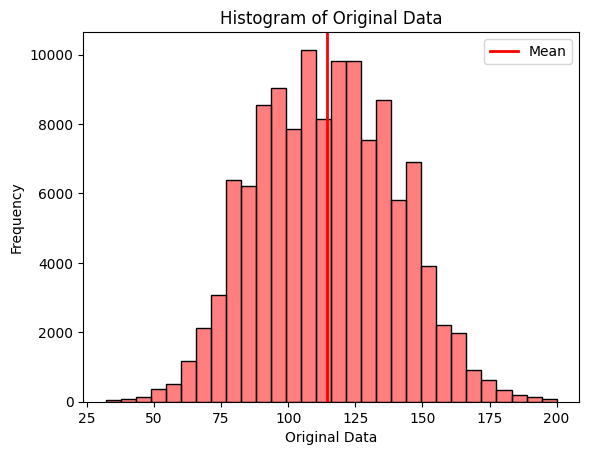

[[-0.18398701]
 [ 0.31900626]
 [-0.70025573]
 ...
 [-0.94360413]
 [-1.61082583]
 [ 0.08838624]]


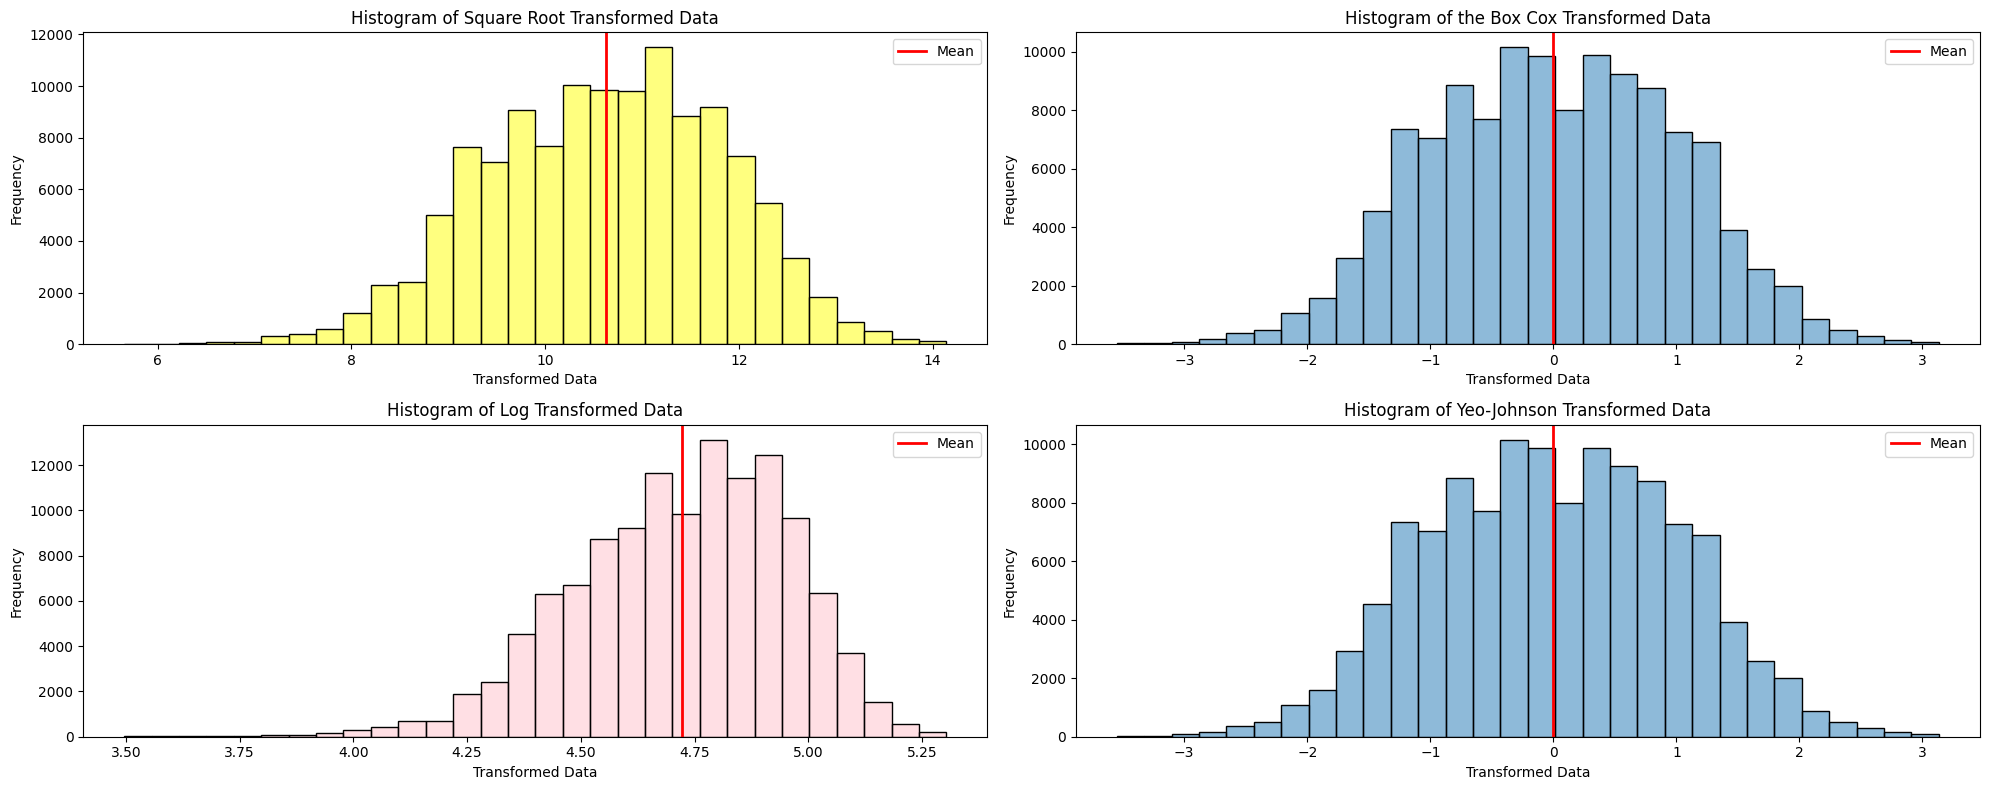

StandardScaler()
[[-0.2086803 ]
 [ 0.29743806]
 [-0.71479866]
 ...
 [-0.94839175]
 [-1.57130665]
 [ 0.06384497]]


In [73]:
#get and visualize the distributions done by different transformations
sqaure_root_transformed_data, log_transformed_data, box_cox_transformed_data, yeo_johnson_transformed_data = transform_features('LDL')

LDL_feature = train_df['LDL'].to_numpy().reshape(-1, 1)
#scaling the data using standard scaler
scaler = StandardScaler()
print(scaler.fit(LDL_feature))
scaled_LDL = scaler.transform(LDL_feature)
print(scaled_LDL)



### feature 6: Height

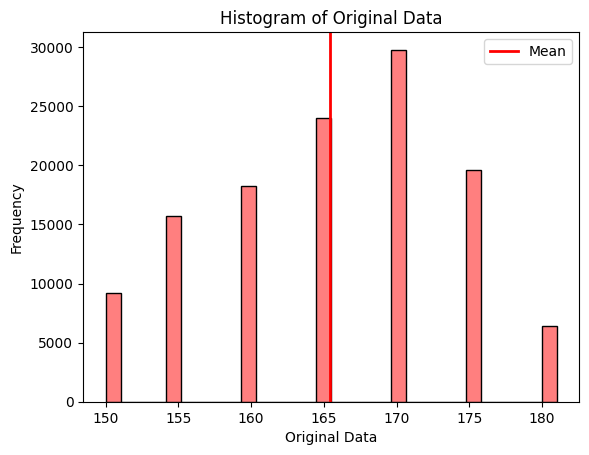

[[-1.77419116]
 [-1.77419116]
 [-1.25619863]
 ...
 [-0.10768937]
 [-0.70115394]
 [ 0.52556886]]


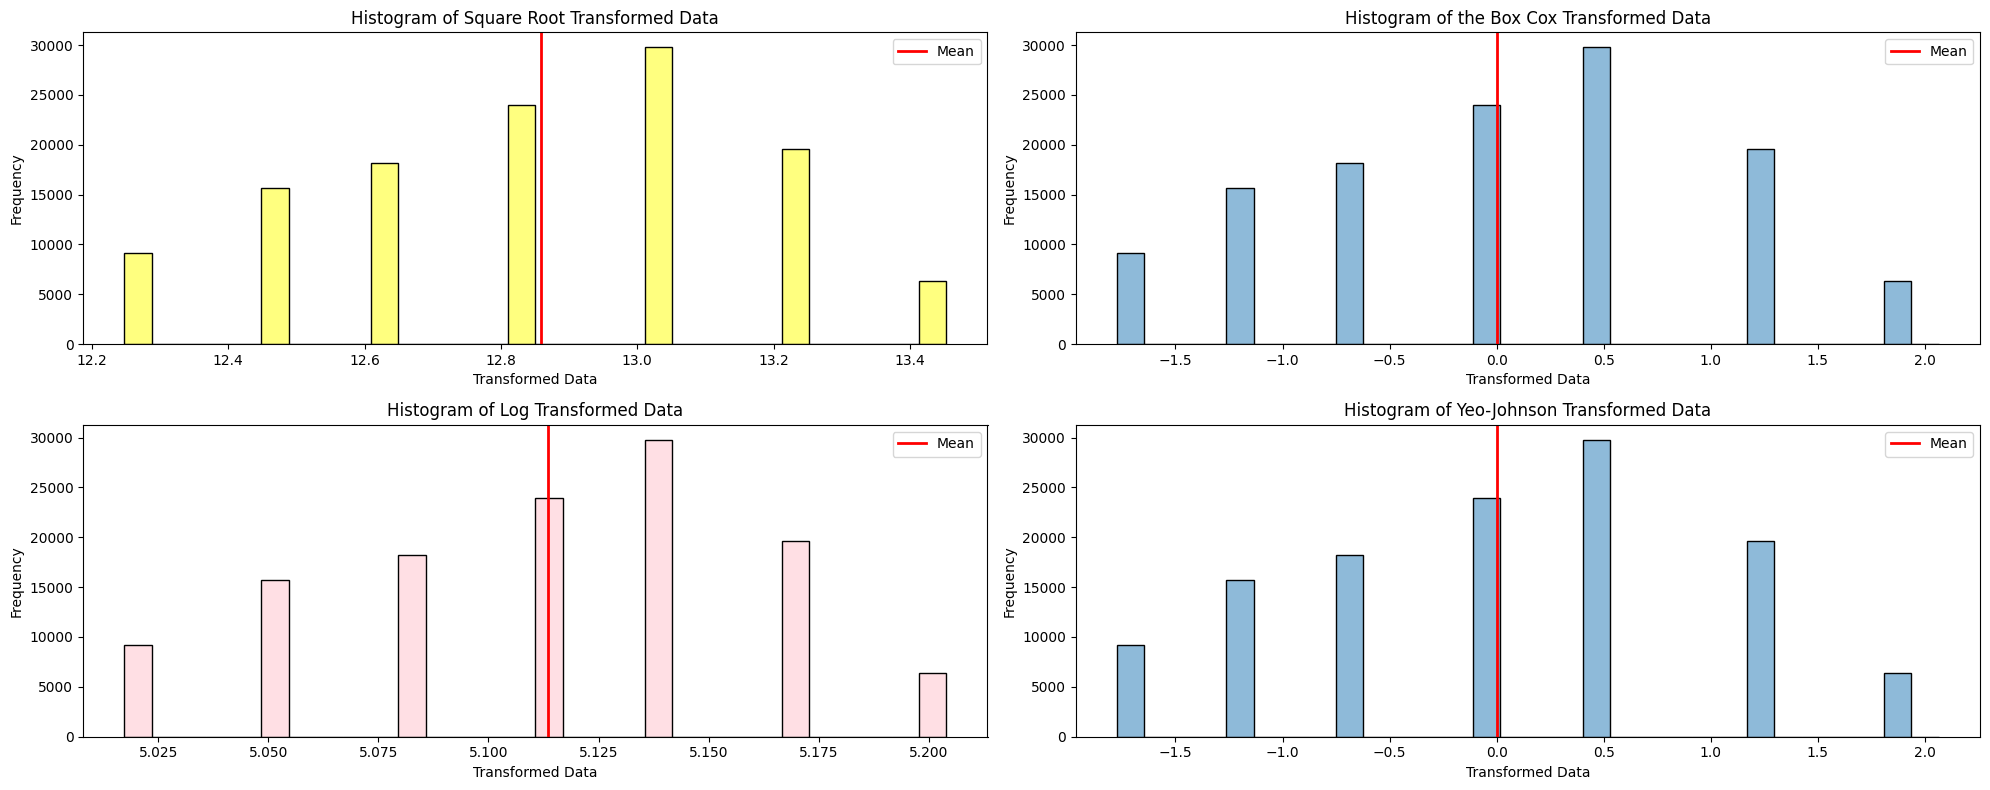

MinMaxScaler()
[[0.        ]
 [0.        ]
 [0.16129032]
 ...
 [0.48387097]
 [0.32258065]
 [0.64516129]]


In [74]:
#get and visualize the distributions done by different transformations
sqaure_root_transformed_data, log_transformed_data, box_cox_transformed_data, yeo_johnson_transformed_data = transform_features('height(cm)')

original_feature = train_df['height(cm)'].to_numpy().reshape(-1, 1)

#scaling the data using standard scaler
scaler = MinMaxScaler()
print(scaler.fit(original_feature))
scaled_height = scaler.transform(original_feature)
print(scaled_height)



### feature 7: Weight

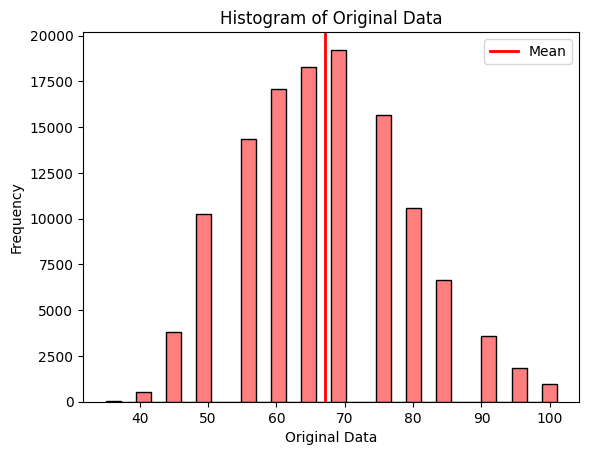

[[-1.49479029]
 [-1.49479029]
 [-1.00731348]
 ...
 [-0.11237586]
 [-0.54775546]
 [ 1.43969613]]


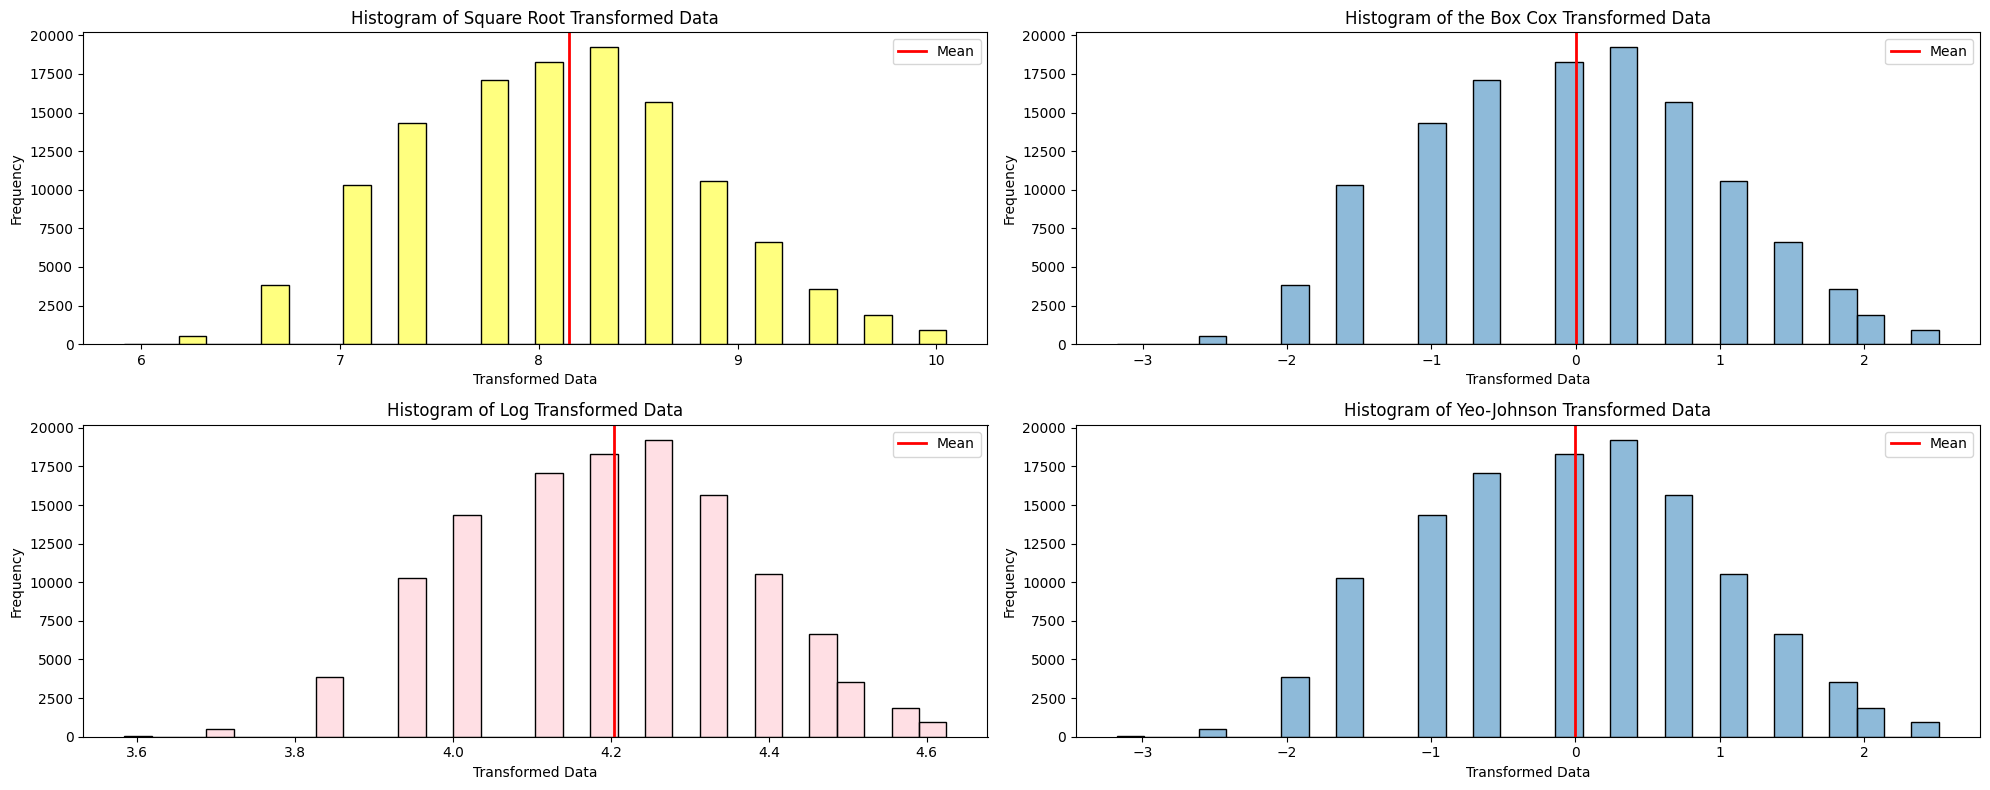

RobustScaler()
[[-1.        ]
 [-1.        ]
 [-0.66666667]
 ...
 [ 0.        ]
 [-0.33333333]
 [ 1.33333333]]


In [75]:
#get and visualize the distributions done by different transformations
sqaure_root_transformed_data, log_transformed_data, box_cox_transformed_data, yeo_johnson_transformed_data = transform_features('weight(kg)')

original_data = train_df['weight(kg)'].to_numpy().reshape(-1, 1)
#scaling the data using robust scaler beacause it is robust to outliers and can handle them
scaler = RobustScaler()
print(scaler.fit(original_data))
scaled_weight = scaler.transform(original_data)
print(scaled_weight)



### feature 8: Cholesterol

The data doesn't need transformations due to its original gaussian-like distribution

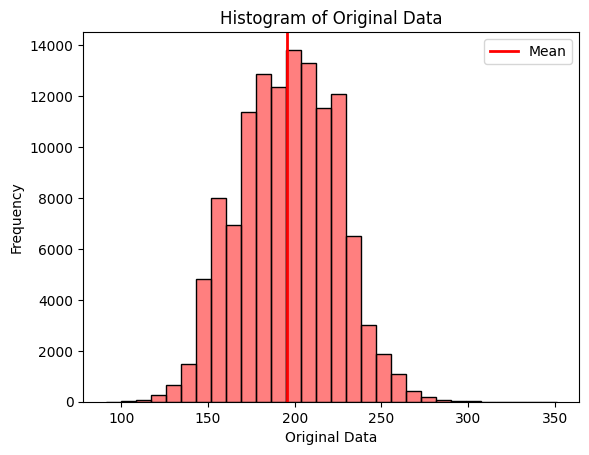

[[-0.58852167]
 [ 0.51231132]
 [-1.48411671]
 ...
 [-0.94585164]
 [-1.05328073]
 [-0.73131465]]


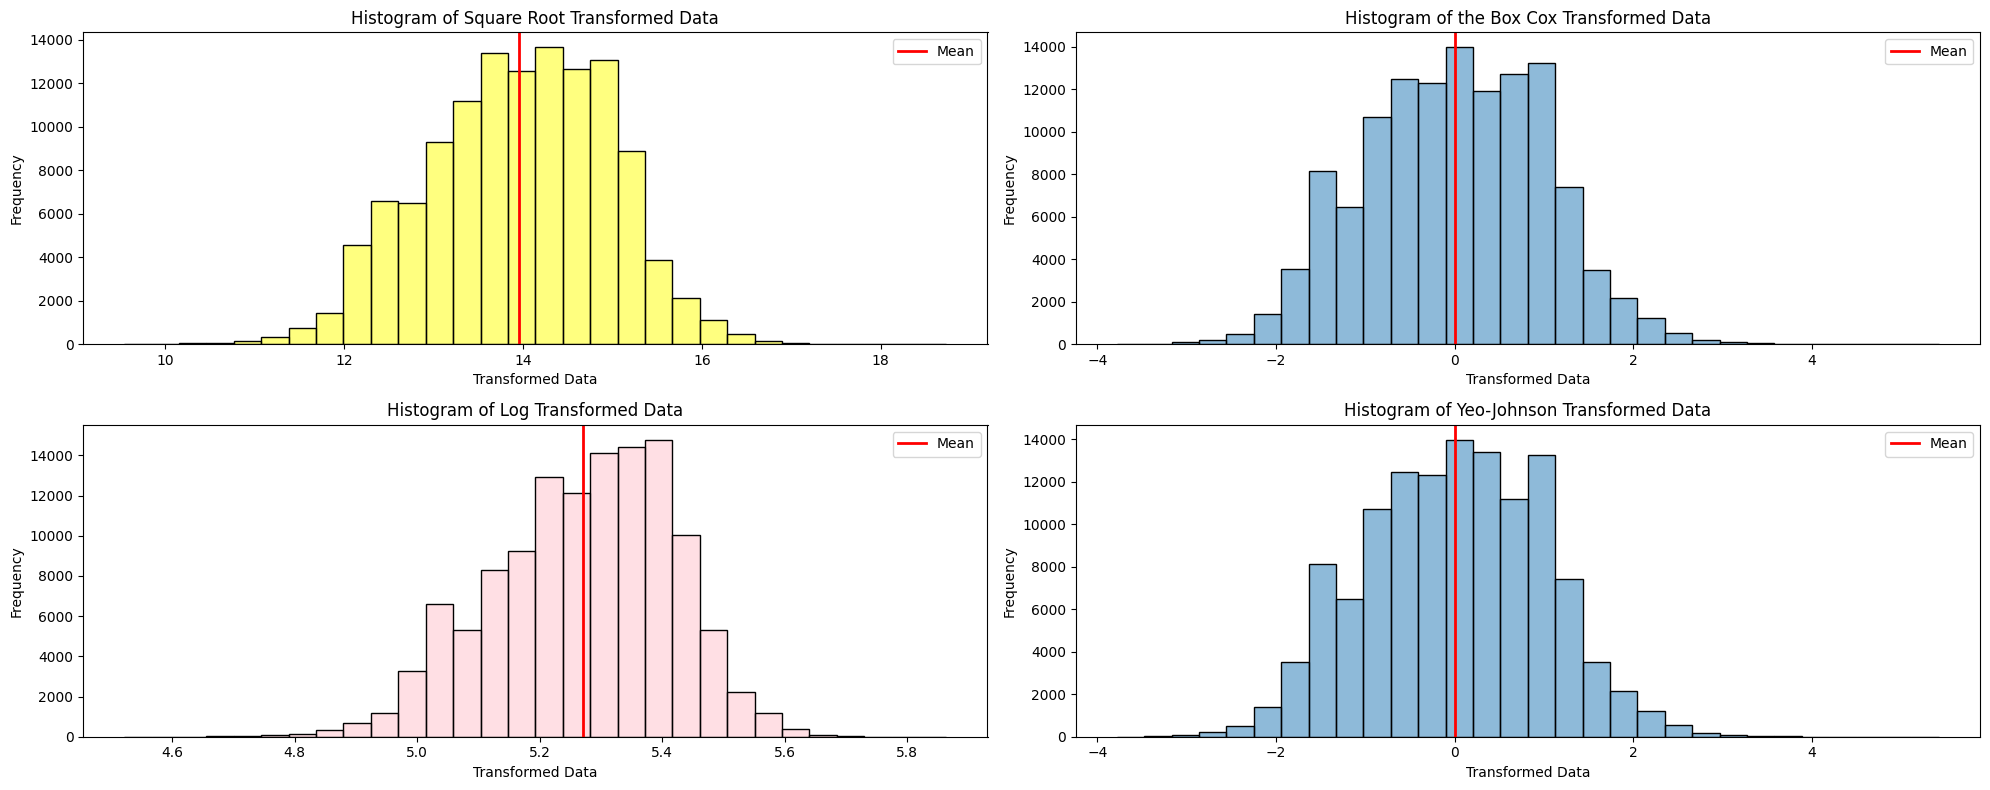

StandardScaler()
[[-0.59149   ]
 [ 0.50951954]
 [-1.47940092]
 ...
 [-0.94665437]
 [-1.05320368]
 [-0.73355575]]


In [76]:
#get and visualize the distributions done by different transformations
sqaure_root_transformed_data, log_transformed_data, box_cox_transformed_data, yeo_johnson_transformed_data = transform_features('Cholesterol')

original_feature = train_df['Cholesterol'].to_numpy().reshape(-1, 1)
#scaling the data using standard scaler
scaler = StandardScaler()
print(scaler.fit(original_feature))
scaled_cholesterol = scaler.transform(original_feature)
print(scaled_cholesterol)



### feature 9: Serum Creatinine

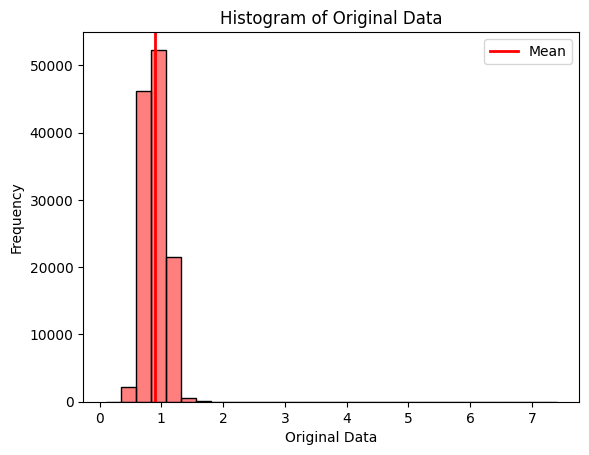

[[-1.7407563 ]
 [-1.7407563 ]
 [-1.7407563 ]
 ...
 [ 0.06486096]
 [-1.7407563 ]
 [ 0.61553746]]


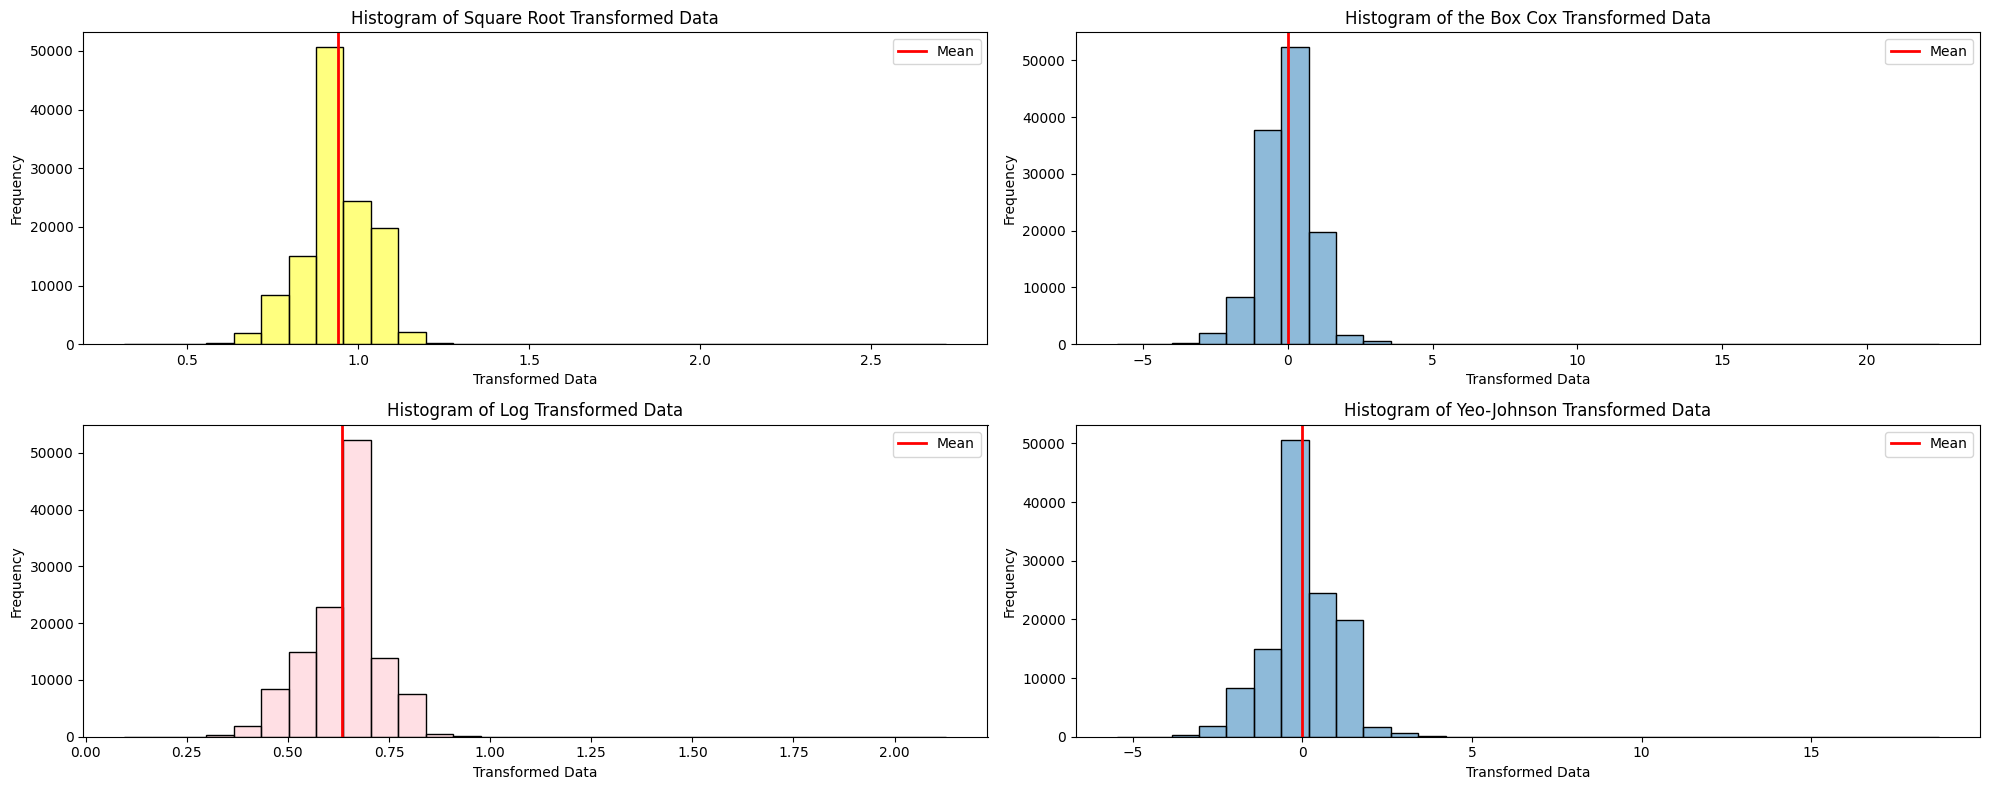

MinMaxScaler()
[[0.1843128 ]
 [0.1843128 ]
 [0.1843128 ]
 ...
 [0.26884644]
 [0.1843128 ]
 [0.29407776]]


In [77]:
#get and visualize the distributions done by different transformations
sqaure_root_transformed_data, log_transformed_data, box_cox_transformed_data, yeo_johnson_transformed_data = transform_features('serum creatinine')

log_transformed_data = log_transformed_data.reshape(-1, 1)
#scaling the data using min-max scaler
scaler = MinMaxScaler()
print(scaler.fit(log_transformed_data))
scaled_serum_creatinine = scaler.transform(log_transformed_data)
print(scaled_serum_creatinine)



### feature 10: Gtp

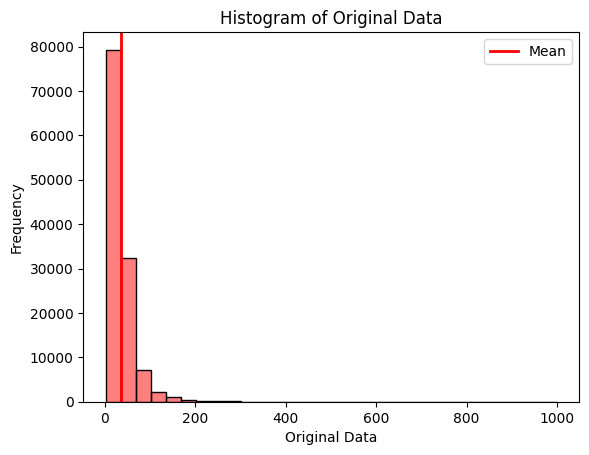

[[-2.2471681 ]
 [-0.15999744]
 [-0.98899465]
 ...
 [ 0.99532361]
 [-1.26080574]
 [ 0.59465165]]


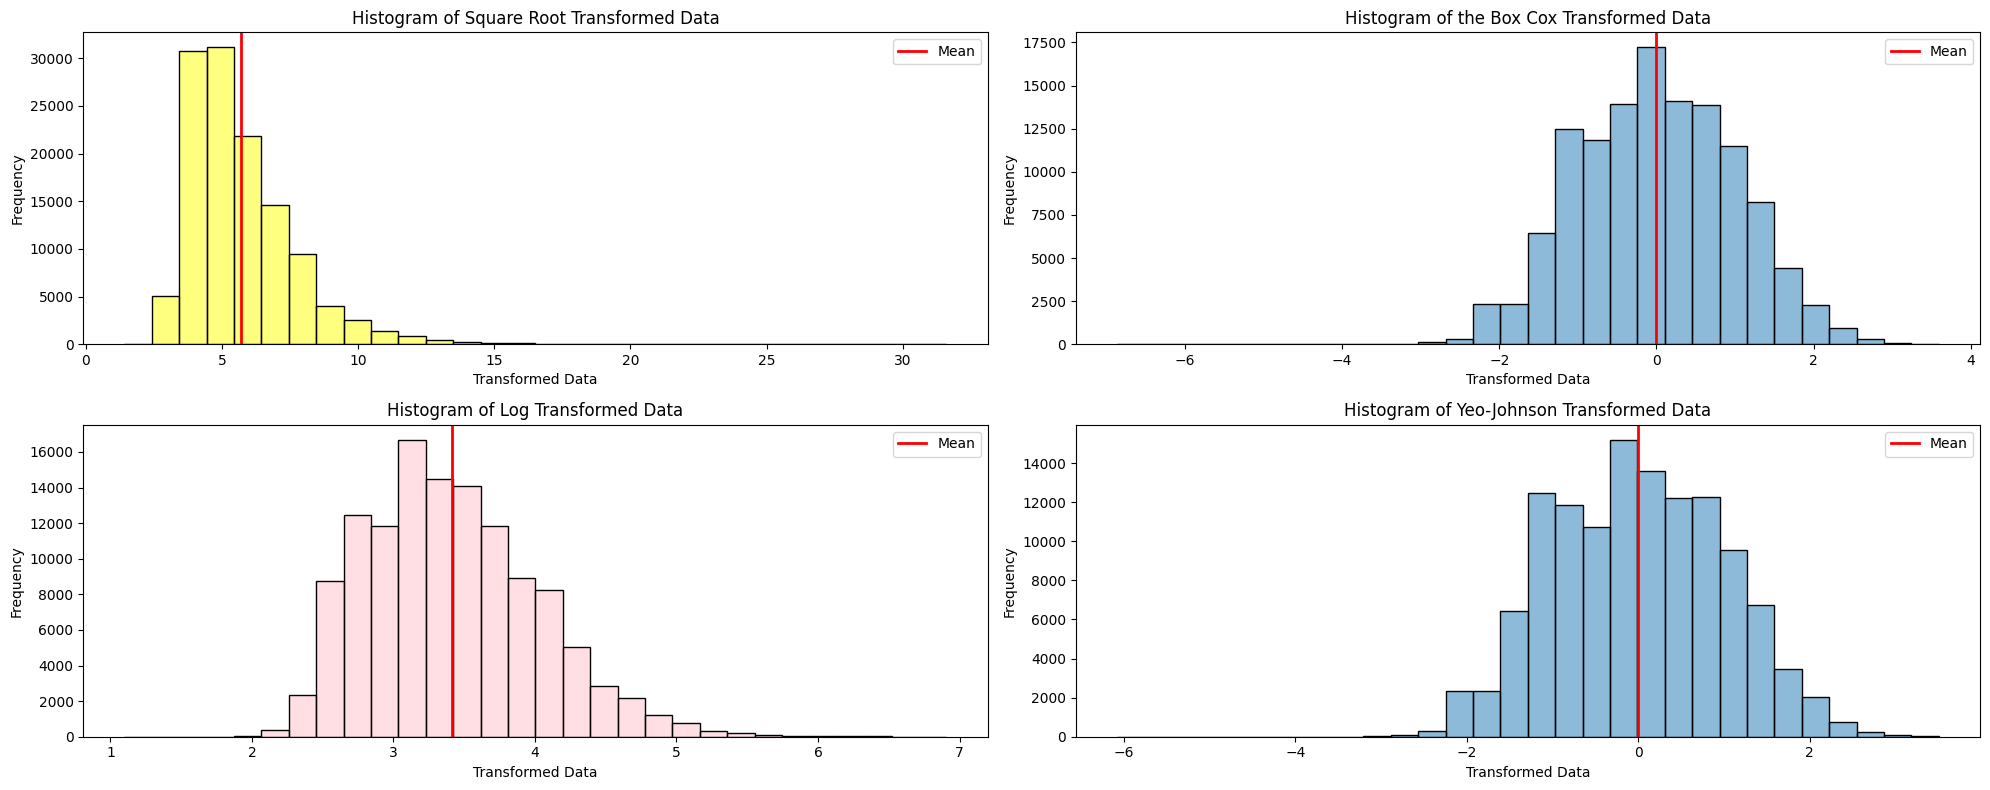

StandardScaler()
[[-2.2471681 ]
 [-0.15999744]
 [-0.98899465]
 ...
 [ 0.99532361]
 [-1.26080574]
 [ 0.59465165]]


In [78]:
#get and visualize the distributions done by different transformations
sqaure_root_transformed_data, log_transformed_data, box_cox_transformed_data, yeo_johnson_transformed_data = transform_features('Gtp')

#scaling the data using standard scaler
scaler = StandardScaler()
print(scaler.fit(box_cox_transformed_data))
scaled_Gtp = scaler.transform(box_cox_transformed_data)
print(scaled_Gtp)

In [79]:
# train data shape
print("Train data shape:", train_df.shape)

Train data shape: (122825, 12)


In [80]:
# train data shape
print("Train data shape:", train_df.shape)

# write train data to csv file
train_df.to_csv('train_data.csv', index=False)

# write test data to csv file
test_df.to_csv('test_data.csv', index=False)




Train data shape: (122825, 12)


In [87]:
# write validation data to csv file
val_df.to_csv('val_data.csv', index=False)

# **Multivariate Data Analysis**

<h3>Multivariate Logistic Analysis </h3>

Logistic Regression Accuracy: 72.86%


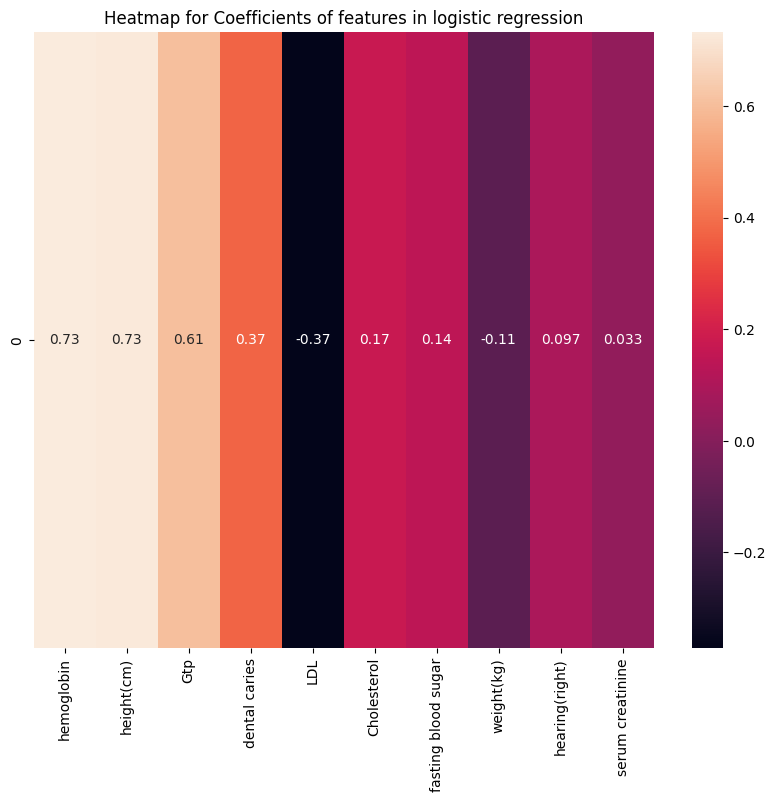

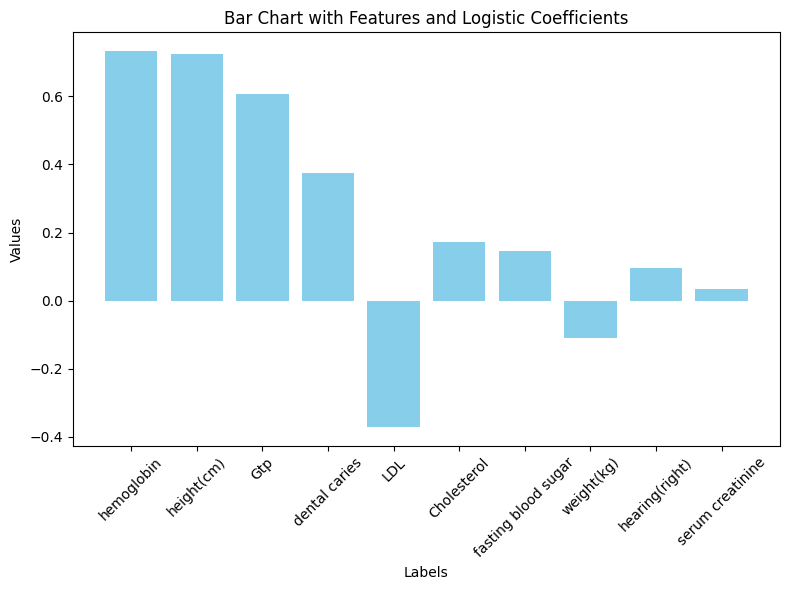

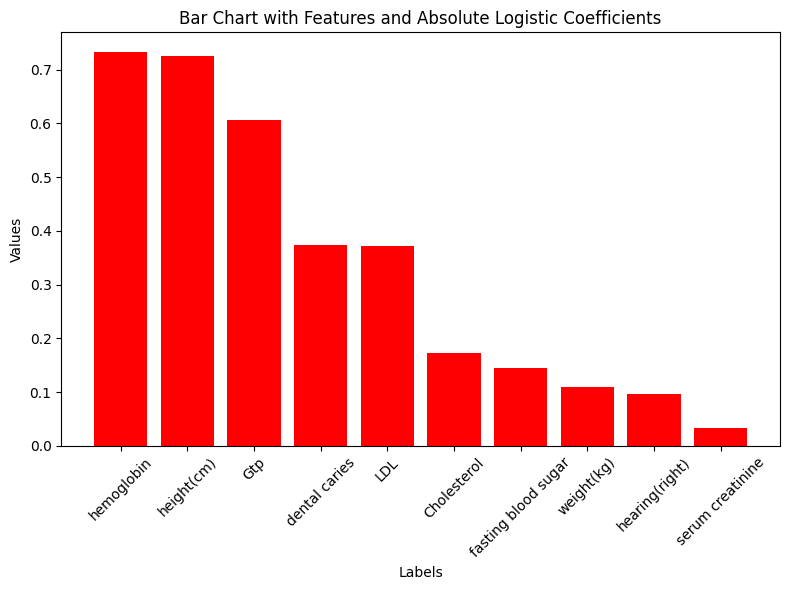

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

normalized_df = train_df.copy()

features = ['hemoglobin','hearing(right)','dental caries','fasting blood sugar','LDL','height(cm)','weight(kg)','Cholesterol','serum creatinine','Gtp']

#Preprocessing
normalized_df['hemoglobin']          = zscore_norm(normalized_df, 'hemoglobin')
normalized_df['hearing(right)']      = normalized_df['hearing(right)'] - 1
normalized_df['fasting blood sugar'] = zscore_norm(normalized_df, 'fasting blood sugar')
normalized_df['LDL']                 = zscore_norm(normalized_df, 'LDL')
normalized_df['height(cm)']          = zscore_norm(normalized_df, 'height(cm)')
normalized_df['weight(kg)']          = zscore_norm(normalized_df, 'weight(kg)')
normalized_df['Cholesterol']         = zscore_norm(normalized_df, 'Cholesterol')
normalized_df['serum creatinine']    = zscore_norm(normalized_df, 'serum creatinine')
normalized_df['Gtp']                 = zscore_norm(normalized_df, 'Gtp')

logreg = LogisticRegression()
logreg.fit(normalized_df.drop(columns=["smoking","Unnamed: 0"]), normalized_df["smoking"])
accuracy = accuracy_score(normalized_df["smoking"], logreg.predict(normalized_df.drop(columns=["smoking","Unnamed: 0"])))

print(f"Logistic Regression Accuracy: {round(accuracy*100,2)}%")


feature_coeff = list(zip(features,logreg.coef_.tolist()[0]))
feature_coeff = sorted(feature_coeff, key=lambda x: -abs(x[1]))

sorted_features = list(zip(*feature_coeff))[0]
sorted_coeff = list(zip(*feature_coeff))[1]


plt.figure(figsize=(10, 8))
plt.title("Heatmap for Coefficients of features in logistic regression")
sns.heatmap([sorted_coeff], annot=True, xticklabels=sorted_features)


plt.figure(figsize=(8, 6))
plt.bar(sorted_features, sorted_coeff, color='skyblue')
plt.xlabel('Labels')
plt.ylabel('Values')
plt.title('Bar Chart with Features and Logistic Coefficients')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()




plt.figure(figsize=(8, 6))
plt.bar(sorted_features, [abs(i) for i in sorted_coeff], color='red')
plt.xlabel('Labels')
plt.ylabel('Values')
plt.title('Bar Chart with Features and Absolute Logistic Coefficients')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

<h3><h3>PCA Dimensionality Reduction</h3></h3>

In [82]:
from sklearn.decomposition import PCA


pca = PCA()

data_dim_reduction = normalized_df.drop(columns=['Unnamed: 0', 'smoking']).to_numpy()

pca.fit(data_dim_reduction)


variance_ratios = pca.explained_variance_ratio_
total_variance = 0
for i, variance_ratio in enumerate(variance_ratios):
    total_variance += variance_ratio
    print(f"Variance explained by PC{i + 1}: {variance_ratio:.4f}. Total variance upt to PC{i + 1}: {total_variance:.4f}")

Variance explained by PC1: 0.3319. Total variance upt to PC1: 0.3319
Variance explained by PC2: 0.2326. Total variance upt to PC2: 0.5645
Variance explained by PC3: 0.1273. Total variance upt to PC3: 0.6918
Variance explained by PC4: 0.0989. Total variance upt to PC4: 0.7908
Variance explained by PC5: 0.0792. Total variance upt to PC5: 0.8700
Variance explained by PC6: 0.0579. Total variance upt to PC6: 0.9279
Variance explained by PC7: 0.0359. Total variance upt to PC7: 0.9638
Variance explained by PC8: 0.0192. Total variance upt to PC8: 0.9829
Variance explained by PC9: 0.0145. Total variance upt to PC9: 0.9974
Variance explained by PC10: 0.0026. Total variance upt to PC10: 1.0000


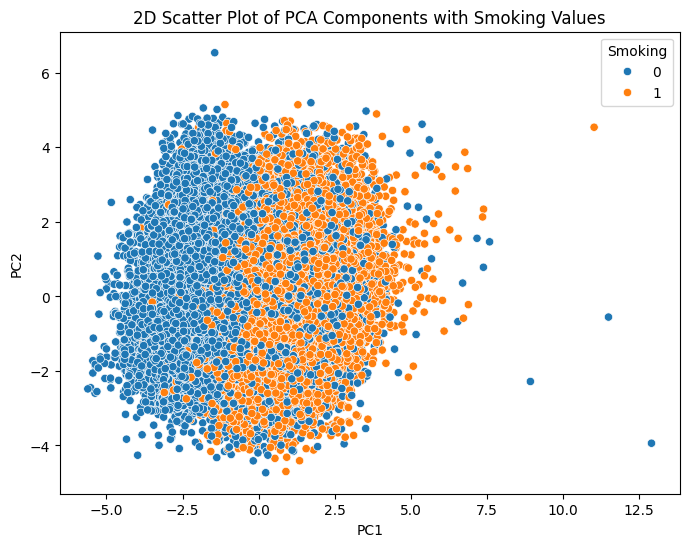

In [83]:
pca = PCA(2)
pca.fit(data_dim_reduction)
transformed_data = pca.transform(data_dim_reduction)
transformed_df = pd.DataFrame(data=transformed_data, columns=['PC1', 'PC2'])
transformed_df = pd.concat([transformed_df.reset_index(drop=True), normalized_df['smoking'].reset_index(drop=True)], axis=1, ignore_index=True)
transformed_df.columns = ['PC1', 'PC2', 'smoking']

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='smoking', data=transformed_df)
plt.title('2D Scatter Plot of PCA Components with Smoking Values')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Smoking')
plt.show()



    

Text(0.5, 0.92, '3D Scatter Plot of Principal Components with Smoking Labels')

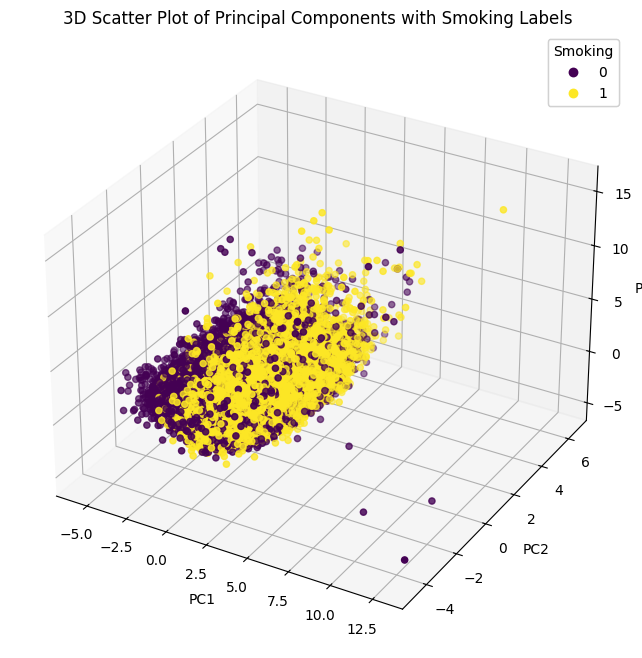

In [84]:
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(3)
pca.fit(data_dim_reduction)
transformed_data = pca.transform(data_dim_reduction)
transformed_df = pd.DataFrame(data=transformed_data, columns=['PC1', 'PC2', 'PC3'])
transformed_df = pd.concat([transformed_df.reset_index(drop=True), normalized_df['smoking'].reset_index(drop=True)], axis=1, ignore_index=True)
transformed_df.columns = ['PC1', 'PC2', 'PC3', 'smoking']



# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color representing 'smoking' labels
scatter = ax.scatter(transformed_df['PC1'], transformed_df['PC2'], transformed_df['PC3'], c=transformed_df['smoking'], cmap='viridis')

# Legend for 'smoking' labels
legend = ax.legend(*scatter.legend_elements(), title='Smoking')
ax.add_artist(legend)

# Set labels and title
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D Scatter Plot of Principal Components with Smoking Labels')




<h3>TSNE Dimensionality Reduction</h3>

[[-97.6825   -21.695257]
 [-37.2152    27.116364]
 [-72.43861  -63.227825]
 ...
 [ 10.528163 -78.99904 ]
 [-55.466755 -60.960754]
 [ 32.315292  32.096622]]


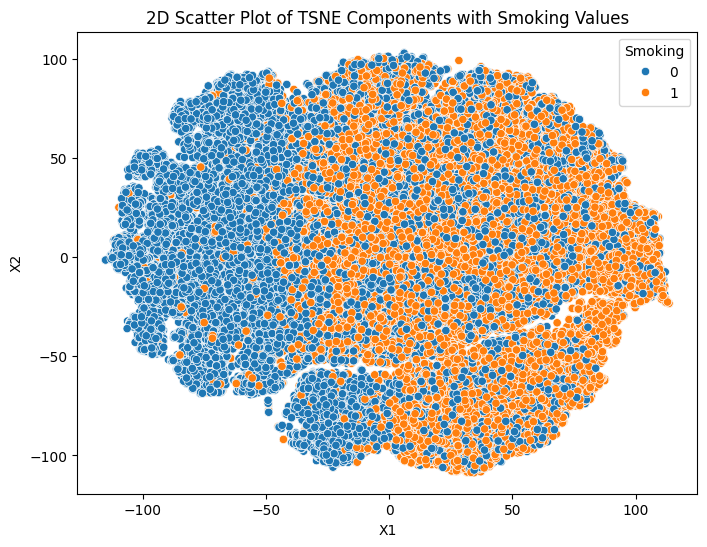

In [85]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)

data_2d = tsne.fit_transform(data_dim_reduction)
print(data_2d)


tsne_df = pd.concat([pd.DataFrame(data=data_2d).reset_index(drop=True), normalized_df['smoking'].reset_index(drop=True)], axis=1, ignore_index=True)
tsne_df.columns = ['X1', 'X2', 'smoking']

plt.figure(figsize=(8, 6))
sns.scatterplot(x='X1', y='X2', hue='smoking', data=tsne_df)
plt.title('2D Scatter Plot of TSNE Components with Smoking Values')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(title='Smoking')
plt.show()


[[-97.6825   -21.695257]
 [-37.2152    27.116364]
 [-72.43861  -63.227825]
 ...
 [ 10.528163 -78.99904 ]
 [-55.466755 -60.960754]
 [ 32.315292  32.096622]]


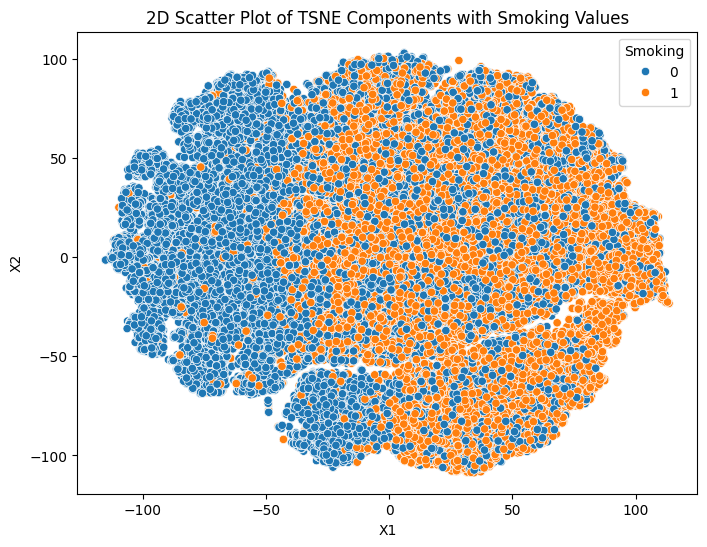

In [86]:
tsne = TSNE(n_components=2)

data_2d = tsne.fit_transform(data_dim_reduction)
print(data_2d)


tsne_df = pd.concat([pd.DataFrame(data=data_2d).reset_index(drop=True), normalized_df['smoking'].reset_index(drop=True)], axis=1, ignore_index=True)
tsne_df.columns = ['X1', 'X2', 'smoking']

plt.figure(figsize=(8, 6))
sns.scatterplot(x='X1', y='X2', hue='smoking', data=tsne_df)
plt.title('2D Scatter Plot of TSNE Components with Smoking Values')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(title='Smoking')
plt.show()